## Описание работы

"СберАвтоподписка" - это сервис долгосрочной аренды для физлиц.

Цель работы - изучить представленный датасет, ответить на вопросы из общей части и выполнить проверку гипотез. 

Задачи:
1) Проверка следующих гипотез:
- Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события;
- Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события;
- Трафик из городов присутствия (Москва и область, Санкт - Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

2) Ответить на следующие вопросы:
- Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объема трафика, и с точки зрения CR)?
- Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
- Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?



## 0. Импорт сторонних библиотек

In [1]:
import pandas as pd
import pickle
import missingno as msno
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedFormatter
from scipy import stats

## 1. Загрузка данных

1. Загрузка данных из файла `ga_hits` и `ga_sessions`.

In [2]:
ga_hits = pd.read_csv('ga_hits.csv')
ga_sessions = pd.read_csv('ga_sessions.csv', low_memory = False)

2. Вывод размерности и первых 5 строчек данных.

In [3]:
print(f'Размерность датасета ga_hits: {ga_hits.shape}')
ga_hits.head()

Размерность датасета ga_hits: (15726470, 11)


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
print(f'Размерность датасета ga_sessions: {ga_sessions.shape}')
ga_sessions.head()

Размерность датасета ga_sessions: (1860042, 18)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


3. Вывод описательной статистики и общей информации для обоих датасетов

In [5]:
ga_hits.describe(include = 'all').round(2)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6566148.00,15726470.00,15726470,9451666,15726470,15726470,15726470,11966286,0.0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,NaN
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,209104.99,23.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,403210.97,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,24120.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,89941.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,219535.25,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ga_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [7]:
ga_sessions.describe(include = 'all').round(2)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1860042,1860042,1860042,1860042.00,1859945,1860042,1640439,1524427,777981,1860042,789904,1492864,16338,1860042,1860042,1860042,1860042
unique,1860042,1391719,226,85318,NaN,293,56,412,286,1219,3,13,205,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,462,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,11.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ga_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


## 2. Data Preparation

Перед объединением датасетов проведем подготовку данных и их последующую обработку. 

### 2.1 Исследование данных на дубликаты, пропуски и их обработка

1. Выявление дубликатов в данных `ga_hits` и `ga_sessions`

In [9]:
print('Выявленные дубликаты в датасете ga_hits')
ga_hits[ga_hits.duplicated()]

Выявленные дубликаты в датасете ga_hits


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value


Дубликатов не выявлено.

In [10]:
print('Выявленные дубликаты в датасете ga_sessions')
ga_sessions[ga_sessions.duplicated()]

Выявленные дубликаты в датасете ga_sessions


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


Дубликатов не выявлено.

2. Вывод матрицы пропусков для `ga_hits` и `ga_sessions`

Матрица пропусков для ga_hits


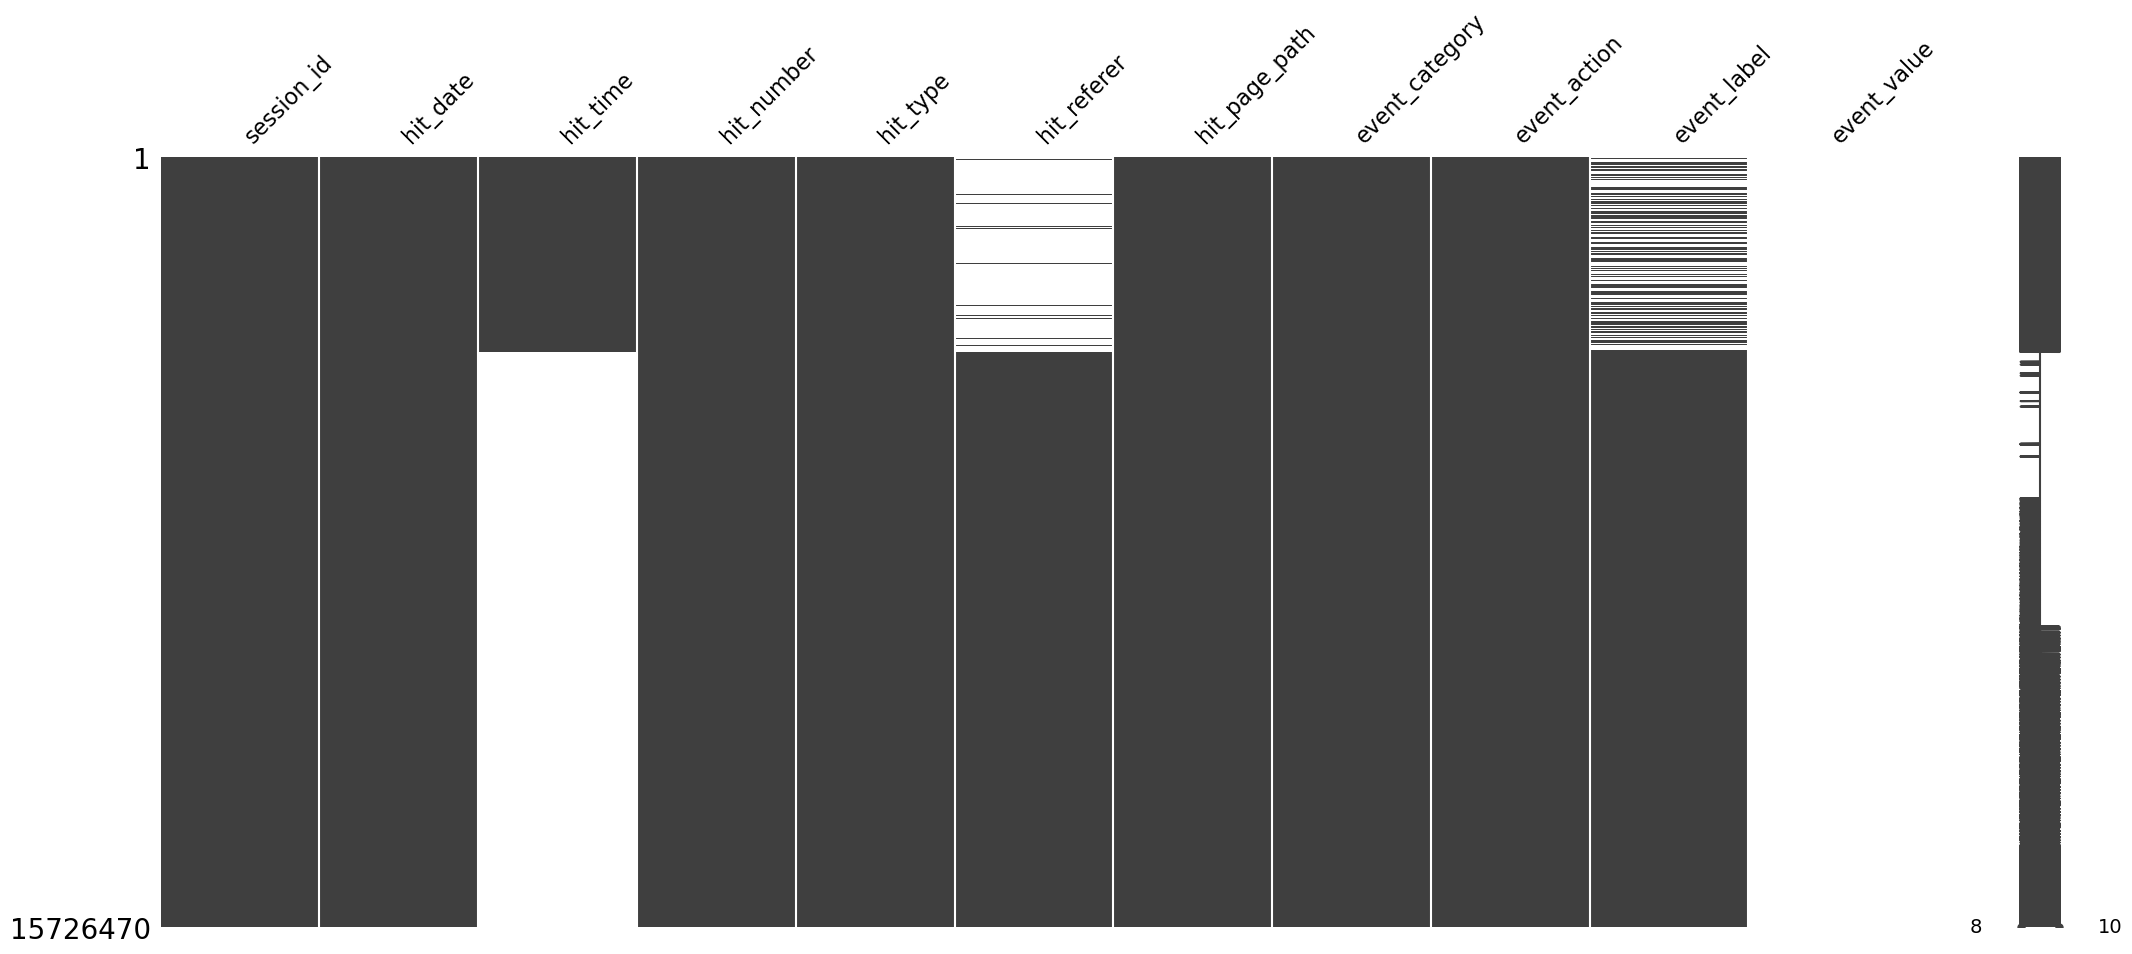

In [11]:
print('Матрица пропусков для ga_hits')
msno.matrix(ga_hits);

Матрица пропусков для ga_sessions


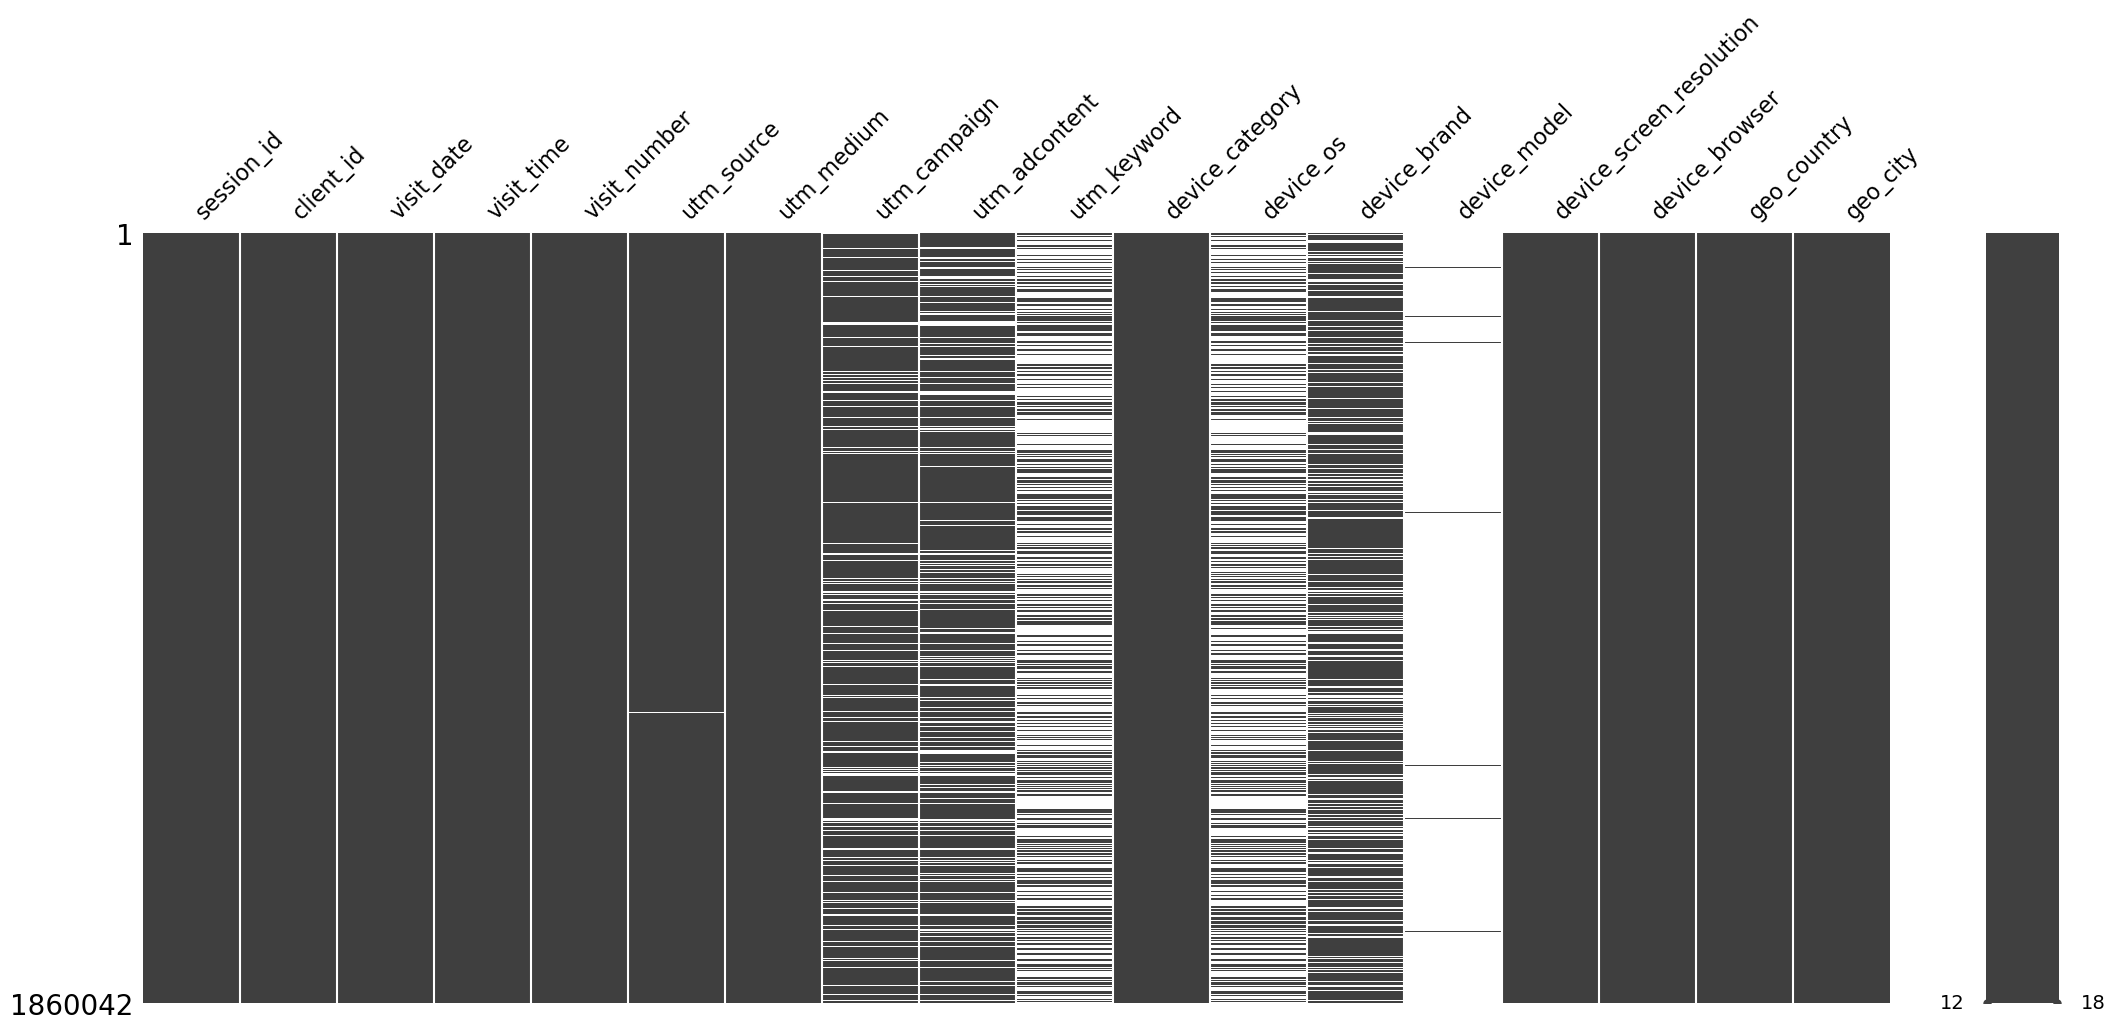

In [12]:
print('Матрица пропусков для ga_sessions')
msno.matrix(ga_sessions);

3. Вывод количества полностью заполненных объектов и их процент из всей выборки.

In [13]:
def print_useful_info(data, data_name):
    print(f'Количество полностью заполненных объектов для датасета {data_name}: {len(data.dropna())}')
    print(f'Процент полностью заполненных объектов в выборке датасета {data_name}: {round((len(data.dropna()) / len(data)) * 100 , 2)} %')

In [14]:
print_useful_info(ga_hits,'ga_hits')

Количество полностью заполненных объектов для датасета ga_hits: 0
Процент полностью заполненных объектов в выборке датасета ga_hits: 0.0 %


In [15]:
print_useful_info(ga_sessions,'ga_sessions')

Количество полностью заполненных объектов для датасета ga_sessions: 14940
Процент полностью заполненных объектов в выборке датасета ga_sessions: 0.8 %


4. Вывод процента пропущенных значений для каждого признака с сортировкой по убыванию процента

In [16]:
def missing_percent(data):
    missing_percent = round((data.isna().sum() / len(data) * 100), 2).sort_values(ascending = False)

    return missing_percent

In [17]:
print('Процент пропущенных значений для каждого признака в датасете ga_hits')
missing_percent(ga_hits)

Процент пропущенных значений для каждого признака в датасете ga_hits


event_value       100.00
hit_time           58.25
hit_referer        39.90
event_label        23.91
session_id          0.00
hit_date            0.00
hit_number          0.00
hit_type            0.00
hit_page_path       0.00
event_category      0.00
event_action        0.00
dtype: float64

In [18]:
print('Процент пропущенных значений для каждого признака в датасете ga_sessions')
missing_percent(ga_sessions)

Процент пропущенных значений для каждого признака в датасете ga_sessions


device_model                99.12
utm_keyword                 58.17
device_os                   57.53
device_brand                19.74
utm_adcontent               18.04
utm_campaign                11.81
utm_source                   0.01
geo_country                  0.00
device_browser               0.00
device_screen_resolution     0.00
session_id                   0.00
device_category              0.00
client_id                    0.00
utm_medium                   0.00
visit_number                 0.00
visit_time                   0.00
visit_date                   0.00
geo_city                     0.00
dtype: float64

5. Выявлены следующие неинформативные признаки (процент пропущенных значений > 20%):
- для датасета `ga_hits`: `event_value`, `hit_time`, `hit_referer`, `event_label`;
- для датасета `ga_sessions`: `device_model`, `utm_keyword`, `device_os`, `device_brand`

Сделаем копию датасетов и обработаем неинформативные признаки. 

In [19]:
ga_hits_clean = ga_hits.copy()

In [20]:
ga_hits_clean = ga_hits_clean.drop(columns = [
    'event_value', 
    'hit_time',  
    'hit_referer',  
    'event_label'
])

In [21]:
ga_sessions_clean = ga_sessions.copy()

In [22]:
ga_sessions_clean = ga_sessions_clean.drop(columns = [
    'device_model', 
    'utm_keyword',  
    'device_os',  
    'device_brand'
])

6. Вывод количества полностью заполненных объектов и их процент для нового датасета. Также выведем процент пропущенных значений для каждого признака с сортировкой по убыванию.

In [23]:
print_useful_info(ga_hits_clean,'ga_hits_clean')

Количество полностью заполненных объектов для датасета ga_hits_clean: 15726470
Процент полностью заполненных объектов в выборке датасета ga_hits_clean: 100.0 %


In [24]:
print('Процент пропущенных значений для каждого признака в датасете ga_hits_clean')
missing_percent(ga_hits_clean)

Процент пропущенных значений для каждого признака в датасете ga_hits_clean


session_id        0.0
hit_date          0.0
hit_number        0.0
hit_type          0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
dtype: float64

In [25]:
print_useful_info(ga_sessions_clean,'ga_sessions_clean')

Количество полностью заполненных объектов для датасета ga_sessions_clean: 1507241
Процент полностью заполненных объектов в выборке датасета ga_sessions_clean: 81.03 %


In [26]:
print('Процент пропущенных значений для каждого признака в датасете ga_sessions_clean')
missing_percent(ga_sessions_clean)

Процент пропущенных значений для каждого признака в датасете ga_sessions_clean


utm_adcontent               18.04
utm_campaign                11.81
utm_source                   0.01
session_id                   0.00
client_id                    0.00
visit_date                   0.00
visit_time                   0.00
visit_number                 0.00
utm_medium                   0.00
device_category              0.00
device_screen_resolution     0.00
device_browser               0.00
geo_country                  0.00
geo_city                     0.00
dtype: float64

7. Вывод списка всех признаков, в которых имеются пропущенные значения, для последующей обработки

In [27]:
def missing_columns(data, data_name):
    percent = missing_percent(data)
    missing_columns = percent[percent.values > 0].index.tolist()
    print(f'Cписок всех признаков для датасета {data_name}, в которых имеются пропущенные значения: {missing_columns}')

In [28]:
missing_columns(ga_sessions_clean,'ga_sessions_clean')

Cписок всех признаков для датасета ga_sessions_clean, в которых имеются пропущенные значения: ['utm_adcontent', 'utm_campaign', 'utm_source']


#### 2.1.1 Обработка пропусков для датасета `ga_sessions_clean` в колонках  `utm_adcontent`, `utm_campaign` и `utm_source`

1. Вывод количества значений для указанных колонок, включая пропущенные значения.

In [29]:
print('\t Для utm_adcontent:')
print(ga_sessions_clean.utm_adcontent.value_counts(dropna = False))
print(f'Количество пропущенных значений в utm_adcontent: {ga_sessions_clean.utm_adcontent.isna().sum()}')

print('\t')

print('\t Для utm_campaign:')
print(ga_sessions_clean.utm_campaign.value_counts(dropna = False))
print(f'Количество пропущенных значений в utm_campaign: {ga_sessions_clean.utm_campaign.isna().sum()}')

print('\t')

print('\t Для utm_source:')
print(ga_sessions_clean.utm_source.value_counts(dropna = False))
print(f'Количество пропущенных значений в utm_source: {ga_sessions_clean.utm_source.isna().sum()}')

	 Для utm_adcontent:
JNHcPlZPxEMWDnRiyoBf    1006599
NaN                      335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: utm_adcontent, Length: 287, dtype: int64
Количество пропущенных значений в utm_adcontent: 335615
	
	 Для utm_campaign:
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 413, dtype: int64
Количество пропущенных значений в utm_campaign: 219603
	
	 Для utm_source:
ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmy

2. Обработка пропусков самым популярным значением

In [30]:
ga_sessions_clean.utm_adcontent = ga_sessions_clean.utm_adcontent.fillna(str(ga_sessions_clean.utm_adcontent.mode()[0]))
ga_sessions_clean.utm_campaign = ga_sessions_clean.utm_campaign.fillna(str(ga_sessions_clean.utm_campaign.mode()[0]))
ga_sessions_clean.utm_source = ga_sessions_clean.utm_source.fillna(str(ga_sessions_clean.utm_source.mode()[0]))

3. Контроль количества пропусков

In [31]:
print(f'Количество пропущенных значений в utm_adcontent: {ga_sessions_clean.utm_adcontent.isna().sum()}')
print(f'Количество пропущенных значений в utm_campaign: {ga_sessions_clean.utm_campaign.isna().sum()}')
print(f'Количество пропущенных значений в utm_source: {ga_sessions_clean.utm_source.isna().sum()}')

Количество пропущенных значений в utm_adcontent: 0
Количество пропущенных значений в utm_campaign: 0
Количество пропущенных значений в utm_source: 0


4. Вывод итогового количества полностью заполненных объектов и их процент из всей выборки для обоих датасетов.

In [32]:
print_useful_info(ga_sessions_clean,'ga_sessions_clean')

Количество полностью заполненных объектов для датасета ga_sessions_clean: 1860042
Процент полностью заполненных объектов в выборке датасета ga_sessions_clean: 100.0 %


In [33]:
print_useful_info(ga_hits_clean,'ga_hits_clean')

Количество полностью заполненных объектов для датасета ga_hits_clean: 15726470
Процент полностью заполненных объектов в выборке датасета ga_hits_clean: 100.0 %


### 2.2 Преобразование типов данных

1. Вывод общей информации о датасетах для анализа типа данных

In [34]:
ga_sessions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 14 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   device_category           object
 10  device_screen_resolution  object
 11  device_browser            object
 12  geo_country               object
 13  geo_city                  object
dtypes: int64(1), object(13)
memory usage: 198.7+ MB


In [35]:
ga_hits_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   hit_date        object
 2   hit_number      int64 
 3   hit_type        object
 4   hit_page_path   object
 5   event_category  object
 6   event_action    object
dtypes: int64(1), object(6)
memory usage: 839.9+ MB


2. Изменение типа данных для дат на Datetime-формат

In [36]:
ga_sessions_clean['visit_date'] = pd.to_datetime(ga_sessions_clean['visit_date'] + ' ' + ga_sessions_clean['visit_time'], infer_datetime_format=True, utc=True)
ga_hits_clean['hit_date'] = pd.to_datetime(ga_hits_clean['hit_date'], infer_datetime_format=True, utc=True)

3. Проверка итогового типа

In [37]:
print(f' Тип данных для visit_date: {ga_sessions_clean.visit_date.dtype}')
print(f' Тип данных для hit_date: {ga_hits_clean.hit_date.dtype}')

 Тип данных для visit_date: datetime64[ns, UTC]
 Тип данных для hit_date: datetime64[ns, UTC]


### 2.3 Исследование на выбросы и аномалии

1. Вывод описательной статистики для данных в обоих датасетах

In [38]:
ga_sessions_clean.describe().round(2)

,visit_number
count,1860042.00
mean,2.71
std,11.83
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,564.00


In [39]:
ga_hits_clean.describe().round(2)

,hit_number
count,15726470.00
mean,23.57
std,28.88
min,1.00
25%,7.00
50%,15.00
75%,29.00
max,500.00


Ввиду того, что указанные атрибуты являются качественными переменными, исследование на выбросы и аномалии не производим.

## 3. Feature Engineering

### 3.1 Преобразование категориальных переменных

1. Для категориальных переменных рассчитаем количество уникальных значений.

In [40]:
ga_sessions_categories = [
    'utm_source', 
    'utm_medium', 
    'utm_campaign', 
    'utm_adcontent', 
    'device_category', 
    'device_screen_resolution', 
    'device_browser', 
    'geo_country', 
    'geo_city' 
]

for title in ga_sessions_categories:
    print('Наименование категории:', title)
    print('Кол-во уникальных значений:', ga_sessions_clean[title].nunique())
    print('\t')

Наименование категории: utm_source
Кол-во уникальных значений: 293
	
Наименование категории: utm_medium
Кол-во уникальных значений: 56
	
Наименование категории: utm_campaign
Кол-во уникальных значений: 412
	
Наименование категории: utm_adcontent
Кол-во уникальных значений: 286
	
Наименование категории: device_category
Кол-во уникальных значений: 3
	
Наименование категории: device_screen_resolution
Кол-во уникальных значений: 5039
	
Наименование категории: device_browser
Кол-во уникальных значений: 57
	
Наименование категории: geo_country
Кол-во уникальных значений: 166
	
Наименование категории: geo_city
Кол-во уникальных значений: 2548
	


In [41]:
ga_hits_categories = [ 
    'hit_type', 
    'hit_page_path', 
    'event_category', 
    'event_action' 
]

for title in ga_hits_categories:
    print('Наименование категории:', title)
    print('Кол-во уникальных значений:', ga_hits_clean[title].nunique())
    print('\t')

Наименование категории: hit_type
Кол-во уникальных значений: 1
	
Наименование категории: hit_page_path
Кол-во уникальных значений: 342715
	
Наименование категории: event_category
Кол-во уникальных значений: 52
	
Наименование категории: event_action
Кол-во уникальных значений: 230
	


2. Уменьшим количество уникальных значений в `utm_source`, разделив все визиты на рекламу в социальных сетях и все остальное.

In [42]:
social_media_advertising = [
    'QxAxdyPLuQMEcrdZWdWb',
    'MvfHsxITijuriZxsqZqt',
    'ISrKoXQCxqqYvAZICvjs',
    'IZEXUFLARCUMynmHNBGo',
    'PlbkrSYoHuZBWfYjYnfw',
    'gVRrcxiDQubJiljoTbGm'
]

ga_sessions_clean['utm_source_short'] = ga_sessions_clean.apply(lambda x: 'social_media' if x.utm_source in social_media_advertising else 'other', axis = 1)

3. Уменьшим количество уникальных значений в `utm_medium`, разделив трафик на органический и платный.

In [43]:
 organic_traffic = [
    'organic',
    'referral',
    '(none)'
]

ga_sessions_clean['utm_medium_short'] = ga_sessions_clean.apply(lambda x: 'organic_traffic' if x.utm_medium in organic_traffic else 'paid_traffic', axis = 1)

4. Уменьшим количество уникальных значений в `event_action`, разделив события на целевые и нецелевые действия.

In [44]:
 target_action = [
    'sub_car_claim_click',
    'sub_car_claim_submit_click',
    'sub_open_dialog_click',
    'sub_custom_question_submit_click',
    'sub_call_number_click',
    'sub_callback_submit_click',
    'sub_submit_success',
    'sub_car_request_submit_click'     
]

ga_hits_clean['event_action_short'] = ga_hits_clean.apply(lambda x: 'target' if x.event_action in target_action else 'non_target', axis = 1)

5. Обработаем уникальные значения в `hit_page_path`, выделив марку и модель автомобиля.

In [45]:
ga_hits_clean['manufacturer'] = ga_hits_clean.apply(lambda x: x.hit_page_path.split('/')[3] if x.hit_page_path.find('sberauto.com/cars/all/') != -1 else 'N/A', axis = 1)
ga_hits_clean['model'] = ga_hits_clean.apply(lambda x: x.hit_page_path.split('/')[4] if x.hit_page_path.find('sberauto.com/cars/all/') != -1 else 'N/A', axis = 1)

6. Уменьшим количество уникальных значений в `geo_city`, выделив города присутствия и иные регионы.

In [46]:
presence_city = [
    'Aprelevka',
    'Balashikha',
    'Beloozyorskiy',
    'Bronnitsy',
    'Vereya',
    'Vidnoe',
    'Volokolamsk',
    'Voskresensk',
    'Vysokovsk',
    'Golitsyno',
    'Dedovsk',
    'Dzerzhinsky',
    'Dmitrov',
    'Dolgoprudny',
    'Domodedovo',
    'Dresh',
    'Dubna',
    'Yegoryevsk',
    'Zhukovskiy',
    'Zaraysk',
    'Zvenigorod',
    'Ivanteyevka',
    'Istra',
    'Kashira',
    'Klin',
    'Kolomna',
    'Korolyov',
    'Kotelniki',
    'Krasnoarmeysk',
    'Krasnogorsk',
    'Krasnozavodsk',
    'Krasnoznamensk',
    'Kubinka',
    'Kurovskoye',
    'Dulyovo',
    'Lobnya',
    'Losino-Petrovsky',
    'Lukhovitsy',
    'Lytkarino',
    'Lyubertsy',
    'Mozhaysk',
    'Mytishchi',
    'Naro-Fominsk',
    'Noginsk',
    'Odintsovo',
    'Orekhovo-Zuyevo',
    'Pavlovsky Posad',
    'Podolsk',
    'Protvino',
    'Pushkino',
    'Pushchino',
    'Ramenskoye',
    'Reutov',
    'Ruza',
    'Sergiyev Posad',
    'Serpukhov',
    'Solnechnogorsk',
    'Staraya Kupavna',
    'Stupino',
    'Fryazino',
    'Khimki',
    'Khotkovo',
    'Chernogolovka',
    'Chekhov',
    'Shatura',
    'Shchyolkovo',
    'Elektrogorsk',
    'Elektrougli',
    'Jahroma',
    'Moscow',
    'Saint Petersburg',
    'Vlasikha',
    'Kalininets',
    'Kraskovo',
    'Kratovo',
    'Lesnoy Gorodok',
    'Malakhovka',
    'Monino',
    'Nakhabino',
    'Povarovo',
    'Rodniki',
    'Selyatino',
    'Tomilino',
    'Tuchkovo',
    'Shakhovskaya'
]

ga_sessions_clean['geo_city_short'] = ga_sessions_clean.apply(lambda x: 'presence_city' if x.geo_city in presence_city else 'other', axis = 1)

7. Уменьшим количество уникальных значений в `device_category`, разделив устройства на мобильные и десктопные.

In [47]:
mobile_category = [
    'mobile',
    'tablet'
]

ga_sessions_clean['device_category_short'] = ga_sessions_clean.apply(lambda x: 'mobile' if x.device_category in mobile_category else 'desktop', axis = 1)

### 3.2 Создание новых признаков на основе информации в датасетов

1. Создадим признаки `month` и `day_of_year` на основании даты визита на сайт

In [48]:
ga_sessions_clean['month'] = ga_sessions_clean.visit_date.dt.month
ga_sessions_clean['day_of_year'] = ga_sessions_clean.visit_date.dt.dayofyear

2. Выделим отдельный атрибут `CR` (Conversion Rate) - показатель конверсии из визита (уникальный session_id) в любое целевое действие в рамках одного визита.

In [49]:
ga_hits_clean['CR'] = ga_hits_clean.apply(lambda x: 1 if x.event_action_short == 'target' else 0, axis = 1)

### 3.3 Объединение итоговых датасетов

Выполним объединение датасетов по общему атрибуту `session_id` и выведем итоговую размерность получившегося датасета, а также первые пять строчек.  

In [50]:
df_clean = pd.merge(left = ga_sessions_clean, right = ga_hits_clean, on = 'session_id', how = 'inner')
print(f'Размерность объединённого датасета: {df_clean.shape}')
df_clean.head()

Размерность объединённого датасета: (15685219, 30)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,event_action_short,manufacturer,model,CR
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 14:36:32+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,2021-11-24 00:00:00+00:00,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,non_target,N/A,N/A,0
1,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24 14:36:32+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,2021-11-24 00:00:00+00:00,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,non_target,N/A,N/A,0
2,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14 08:21:30+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,2021-11-14 00:00:00+00:00,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing,non_target,N/A,N/A,0
3,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 02:42:06+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,2021-12-28 00:00:00+00:00,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,non_target,N/A,N/A,0
4,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28 02:42:06+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,2021-12-28 00:00:00+00:00,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,non_target,N/A,N/A,0


## 4. Modeling

### 4.1 Проверка гипотезы "Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события"

1. Сформируем группу данных для проверки гипотезы.

In [51]:
stats_1 = df_clean.groupby([
    'month',
    'day_of_year',
    'session_id',
    'utm_medium_short',
], as_index = False).agg({'CR' : 'max'})

stats_1

,month,day_of_year,session_id,utm_medium_short,CR
0,5,139,1004760235621272443.1621412730.1621412730,organic_traffic,0
1,5,139,1004760235621272443.1621415798.1621415798,organic_traffic,0
2,5,139,1034410142917290246.1621453035.1621453035,organic_traffic,0
3,5,139,107779366941171287.1621433942.1621433942,organic_traffic,0
4,5,139,1086882617365939108.1621410775.1621410775,organic_traffic,0
...,...,...,...,...,...
1732261,12,365,995521876951260235.1640979566.1640979566,paid_traffic,0
1732262,12,365,995673832894191865.1640978684.1640978684,paid_traffic,0
1732263,12,365,997086314493818413.1640951473.1640951473,paid_traffic,0
1732264,12,365,99873156802459656.1640937482.1640937482,paid_traffic,0


2. Визуализируем полученную группу.

In [52]:
def data_for_month_stat(stat, cat1, cat2):
    month = stat['month'].unique().tolist()
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    
    for i in month:
        list1.append(len(stat[(stat['month'] == i) & (stat.iloc[ : , 3] == cat1)].iloc[ : , 3]))
        
        list2.append(len(stat[(stat['month'] == i) & (stat.iloc[ : , 3] == cat2)].iloc[ : , 3]))
        
        list3.append((
            len(stat[(stat['month'] == i) & (stat.iloc[ : , 3] == cat1) & (stat['CR'] == 1)]) /
            len(stat[(stat['month'] == i) & (stat.iloc[ : , 3] == cat1)])) * 100)
            
        list4.append((
            len(stat[(stat['month'] == i) & (stat.iloc[ : , 3] == cat2) & (stat['CR'] == 1)]) /
            len(stat[(stat['month'] == i) & (stat.iloc[ : , 3] == cat2)])) * 100)
        
    series = {
         'month' : pd.Series(month),
         cat1 : pd.Series(list1),
         cat2: pd.Series(list2),
         'CR_' + cat1 : pd.Series(list3),
         'CR_' + cat2 : pd.Series(list4)
         }
    
    data = pd.DataFrame(series)
    
    return data

In [53]:
def plot_for_2_cat_and_CR(stat, cat1, cat2, title1, title2, xlabel, ylabel1, ylabel2, legend):
    
    data = data_for_month_stat(stat, cat1, cat2)

    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10), sharex = True)
    
    colors = {
        cat1 : 'C0',
        cat2 : 'C1',
        'CR_' + cat1 : 'C0',
        'CR_' + cat2 : 'C1'
    }

    ax1.plot(data.month, data[cat1], color = 'C0', linewidth = 2, marker = '1', markersize = 10)
    ax1.plot(data.month, data[cat2], color = 'C1', linewidth = 2, marker = '2', markersize = 10)
    ax1.set_title(title1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1)
    ax1.legend(colors, title = legend)

    ax2.plot(data.month, data.iloc[ : , 3], color = 'C0', marker = '1', markersize = 10)
    ax2.plot(data.month, data.iloc[ : , 4], color = 'C1', marker = '2', markersize = 10)
    ax2.set_title(title2)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel2)
    ax2.legend(colors, title = legend)
    
    fig.suptitle('Графики распределения');

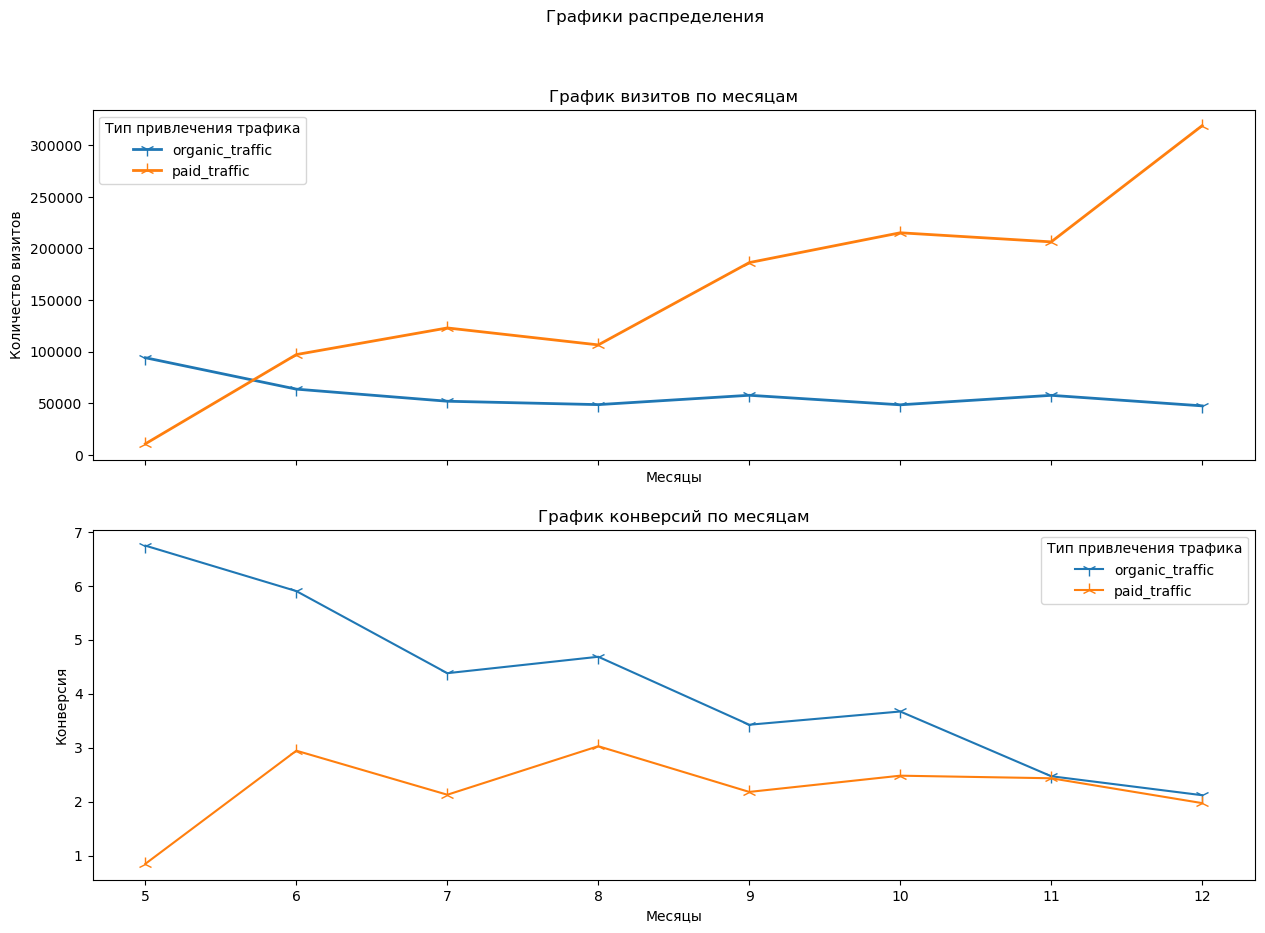

In [54]:
plot_for_2_cat_and_CR(
    stat = stats_1,
    cat1 = 'organic_traffic',
    cat2 = 'paid_traffic',
    title1 = 'График визитов по месяцам',
    title2 = 'График конверсий по месяцам',       
    xlabel = 'Месяцы',
    ylabel1 = 'Количество визитов',
    ylabel2 = 'Конверсия',       
    legend = 'Тип привлечения трафика'
)

In [55]:
def hist_for_2_cat(stat, cat1, cat2, title, xlabel, ylabel, legend):
    fig, ax = plt.subplots(figsize = (12, 8))

    colors = {
        cat1 : 'greenyellow',
        cat2 : 'seagreen'
    }

    ax.hist((stat[stat.iloc[ : , 3] == cat1].iloc[ : , 4],
             stat[stat.iloc[ : , 3] == cat2].iloc[ : , 4]),
            bins = 3, 
            linewidth = 0.5, 
            color = colors.values()
           )

    ax.legend(colors, title = legend)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_locator(FixedLocator([0, 1]))
    ax.xaxis.set_major_formatter(FixedFormatter(['non-target' , 'target']))

    plt.show()

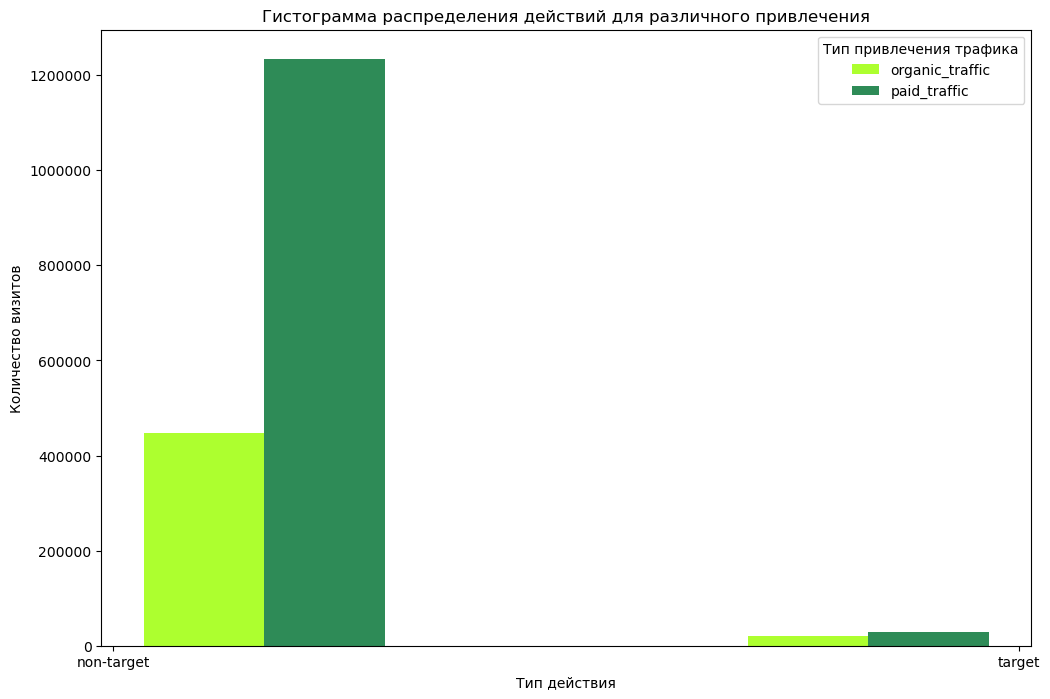

In [56]:
hist_for_2_cat(
    stat = stats_1,
    cat1 = 'organic_traffic',
    cat2 = 'paid_traffic',
    title = 'Гистограмма распределения действий для различного привлечения',
    xlabel = 'Тип действия',
    ylabel = 'Количество визитов',
    legend = 'Тип привлечения трафика'
)

In [57]:
def pie_for_2_cat(stat, cat1, cat2, title, legend):

    colors = {
        cat1 : 'coral',
        cat2 : 'darkviolet'
    }
    
    fig, ax = plt.subplots(figsize = (12, 8))

    ax.pie((
        len(stat[stat.iloc[ : , 3] == cat1].iloc[ : , 3]),
        len(stat[stat.iloc[ : , 3] == cat2].iloc[ : , 3])),
        autopct = '%1.0f%%',
        colors = colors.values()
    )

    ax.legend(colors, title = legend)
    ax.set_title(title)
    
    plt.show()

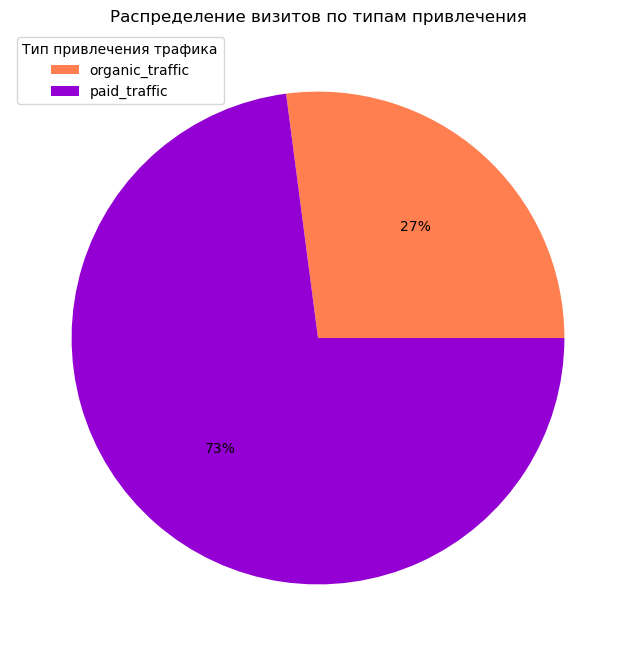

In [58]:
pie_for_2_cat(
    stat = stats_1,
    cat1 = 'organic_traffic',
    cat2 = 'paid_traffic',
    title = 'Распределение визитов по типам привлечения',
    legend = 'Тип привлечения трафика'
)

3. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: Органический трафик не отличается от платного с точки зрения CR

Альтернативная гипотеза: Органический трафик отличается от платного с точки зрения CR

4. Сформируем выборку для проверки гипотезы.

In [59]:
def data_for_modeling(stat, cat1, cat2):
    day_of_year = stat['day_of_year'].unique().tolist()
    list1 = []
    list2 = []
    
    for day in day_of_year:
        list1.append((
            len(stat[(stat['day_of_year'] == day) & (stat.iloc[ : , 3] == cat1) & (stat['CR'] == 1)]) /
            len(stat[(stat['day_of_year'] == day) & (stat.iloc[ : , 3] == cat1)])) * 100)
            
        
        list2.append((
            len(stat[(stat['day_of_year'] == day) & (stat.iloc[ : , 3] == cat2) & (stat['CR'] == 1)]) /
            len(stat[(stat['day_of_year'] == day) & (stat.iloc[ : , 3] == cat2)])) * 100)
        
    series = {
        cat1 : pd.Series(list1),
        cat2 : pd.Series(list2)
    }
    
    data = pd.DataFrame(series)
    
    return data

In [60]:
CR_1 = data_for_modeling(stats_1, 'organic_traffic', 'paid_traffic')
CR_1

,organic_traffic,paid_traffic
0,7.173601,0.000000
1,0.000000,0.000000
2,1.443001,1.470588
3,4.581901,2.542373
4,6.499459,3.030303
...,...,...
221,1.617710,2.214148
222,1.223865,2.191194
223,1.843003,1.762924
224,1.626016,1.358234


5. Определим статистические критерии и подберём корректный тест для проверки гипотезы. 

Принимая во внимание, что сформированные выборки независимы друг от друга, определим, распределены ли выборки нормально. Для этого используем тест Шапиро - Уилка, где установим нулевую гипотезу о нормальности распределений с уровнем значимости p-value 5%.

In [61]:
print(stats.shapiro(CR_1.organic_traffic))
print(stats.shapiro(CR_1.paid_traffic))

ShapiroResult(statistic=0.9760782718658447, pvalue=0.0007058011251501739)
ShapiroResult(statistic=0.9524452090263367, pvalue=8.639231623419619e-07)


По результатам теста Шапиро - Уилка для обоих выборок значение p-value составило <5%, из чего следует, что нулевая гипотеза о нормальности распределений не подтверждена. 

6. Учитывая, что выборки независимы и нормальность распределений не подтверждена, для проверки основной нулевой гипотезы применяется критерий Манна - Уитни с уровнем значимости 5%. Альтернативной гипотезой определим, что среднее значение первой выборки больше среднего значения второй выборки.

In [62]:
print(stats.mannwhitneyu(CR_1.organic_traffic, CR_1.paid_traffic, alternative = 'greater' ))

MannwhitneyuResult(statistic=39636.5, pvalue=1.6080785071268209e-24)


7. **Вывод:** По итогам проведённых тестов нулевая гипотеза о том, что органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события, не подтверждена. Принята альтернативная гипотеза, что органический трафик отличается от платного в большую сторону с точки зрения CR (Conversion Rate) в целевые события. 

### 4.2 Проверка гипотезы "Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события"

1. Сформируем группу данных для проверки гипотезы.

In [63]:
stats_2 = df_clean.groupby([
    'month',
    'day_of_year',
    'session_id',
    'device_category_short'
], as_index = False).agg({'CR' : 'max'})

stats_2

,month,day_of_year,session_id,device_category_short,CR
0,5,139,1004760235621272443.1621412730.1621412730,desktop,0
1,5,139,1004760235621272443.1621415798.1621415798,desktop,0
2,5,139,1034410142917290246.1621453035.1621453035,mobile,0
3,5,139,107779366941171287.1621433942.1621433942,desktop,0
4,5,139,1086882617365939108.1621410775.1621410775,mobile,0
...,...,...,...,...,...
1732261,12,365,995521876951260235.1640979566.1640979566,desktop,0
1732262,12,365,995673832894191865.1640978684.1640978684,desktop,0
1732263,12,365,997086314493818413.1640951473.1640951473,mobile,0
1732264,12,365,99873156802459656.1640937482.1640937482,mobile,0


2. Визуализируем полученную группу.

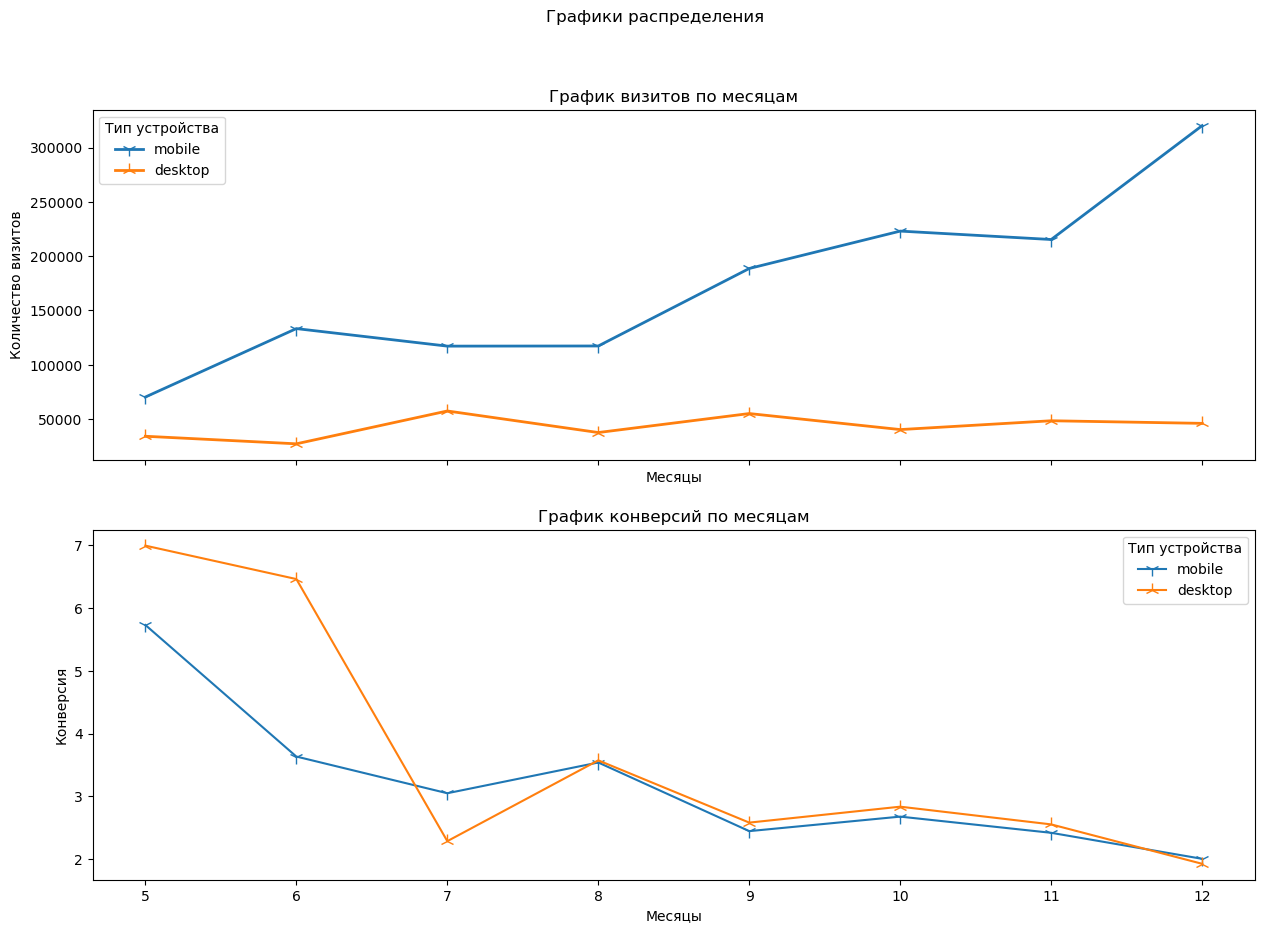

In [64]:
plot_for_2_cat_and_CR(
    stat = stats_2,
    cat1 = 'mobile',
    cat2 = 'desktop',
    title1 = 'График визитов по месяцам',
    title2 = 'График конверсий по месяцам',   
    xlabel = 'Месяцы',
    ylabel1 = 'Количество визитов',
    ylabel2 = 'Конверсия',
    legend = 'Тип устройства'
)

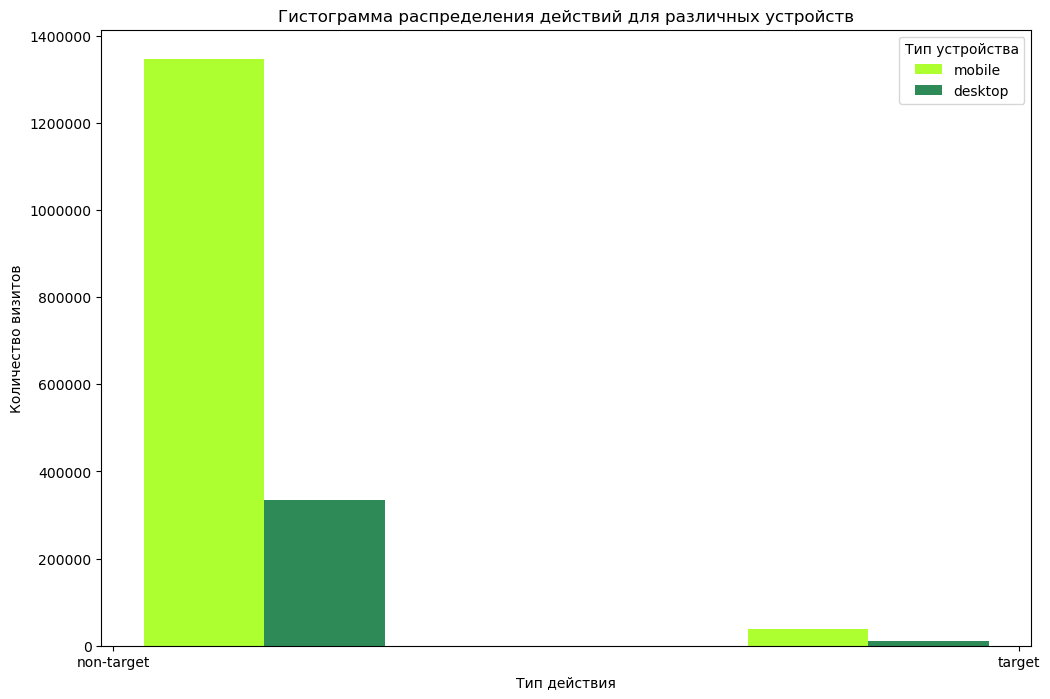

In [65]:
hist_for_2_cat(
    stat = stats_2,
    cat1 = 'mobile',
    cat2 = 'desktop',
    title = 'Гистограмма распределения действий для различных устройств',
    xlabel = 'Тип действия',
    ylabel = 'Количество визитов',
    legend = 'Тип устройства'
)

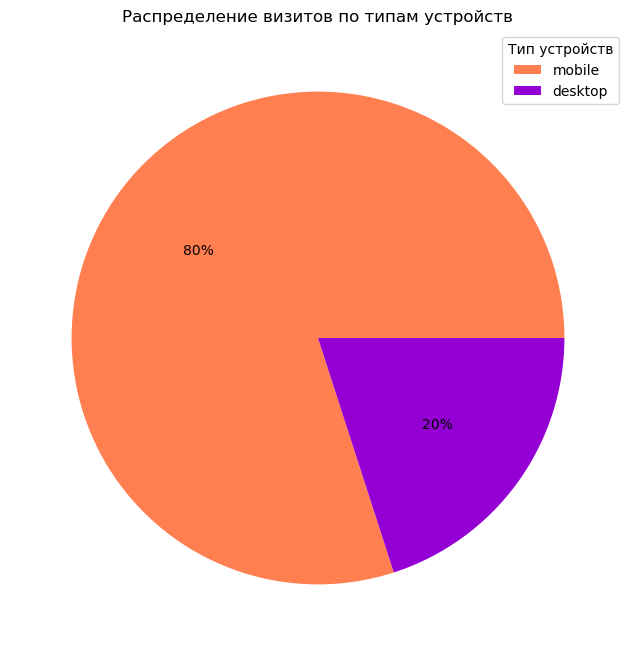

In [66]:
pie_for_2_cat(
    stat = stats_2,
    cat1 = 'mobile',
    cat2 = 'desktop',
    title = 'Распределение визитов по типам устройств',
    legend = 'Тип устройств'
)

3. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR

Альтернативная гипотеза: Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR

4. Сформируем выборку для проверки гипотезы.

In [67]:
CR_2 = data_for_modeling(stats_2, 'mobile', 'desktop')
CR_2

,mobile,desktop
0,6.918239,7.272727
1,0.000000,0.000000
2,1.369863,1.600000
3,4.139715,4.166667
4,6.441731,6.499578
...,...,...
221,2.032141,2.448709
222,2.134679,1.295160
223,1.889954,0.990712
224,1.590281,0.413983


5. Определим статистические критерии и подберём корректный тест для проверки гипотезы. 

Принимая во внимание, что сформированные выборки независимы друг от друга, определим, распределены ли выборки нормально. Для этого используем тест Шапиро - Уилка, где установим нулевую гипотезу о нормальности распределений с уровнем значимости p-value 5%.

In [68]:
print(stats.shapiro(CR_2.mobile))
print(stats.shapiro(CR_2.desktop))

ShapiroResult(statistic=0.9097546935081482, pvalue=1.8520850131320543e-10)
ShapiroResult(statistic=0.8776525259017944, pvalue=1.5785796064413105e-12)


По результатам теста Шапиро - Уилка для обоих выборок значение p-value составило <5%, из чего следует, что нулевая гипотеза о нормальности распределений не подтверждена. 

6. Учитывая, что выборки независимы и нормальность распределений не подтверждена, для проверки основной нулевой гипотезы применяется критерий Манна - Уитни с уровнем значимости 5%. Альтернативной гипотезой определим, что среднее значение первой выборки больше среднего значения второй выборки.

In [69]:
print(stats.mannwhitneyu(CR_2.mobile, CR_2.desktop, alternative = 'greater' ))

MannwhitneyuResult(statistic=24622.0, pvalue=0.7453836536677368)


7. **Вывод:** По итогам проведённых тестов нулевая гипотеза о том, что трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события, подтверждена.

### 4.3 Проверка гипотезы "Трафик из городов присутствия (Москва и область, Санкт - Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события"

1. Сформируем группу данных для проверки гипотезы.

In [70]:
stats_3 = df_clean.groupby([
    'month',
    'day_of_year',
    'session_id',
    'geo_city_short'
], as_index = False).agg({'CR' : 'max'})

stats_3

,month,day_of_year,session_id,geo_city_short,CR
0,5,139,1004760235621272443.1621412730.1621412730,other,0
1,5,139,1004760235621272443.1621415798.1621415798,other,0
2,5,139,1034410142917290246.1621453035.1621453035,other,0
3,5,139,107779366941171287.1621433942.1621433942,other,0
4,5,139,1086882617365939108.1621410775.1621410775,other,0
...,...,...,...,...,...
1732261,12,365,995521876951260235.1640979566.1640979566,presence_city,0
1732262,12,365,995673832894191865.1640978684.1640978684,presence_city,0
1732263,12,365,997086314493818413.1640951473.1640951473,other,0
1732264,12,365,99873156802459656.1640937482.1640937482,other,0


2. Визуализируем полученную группу.

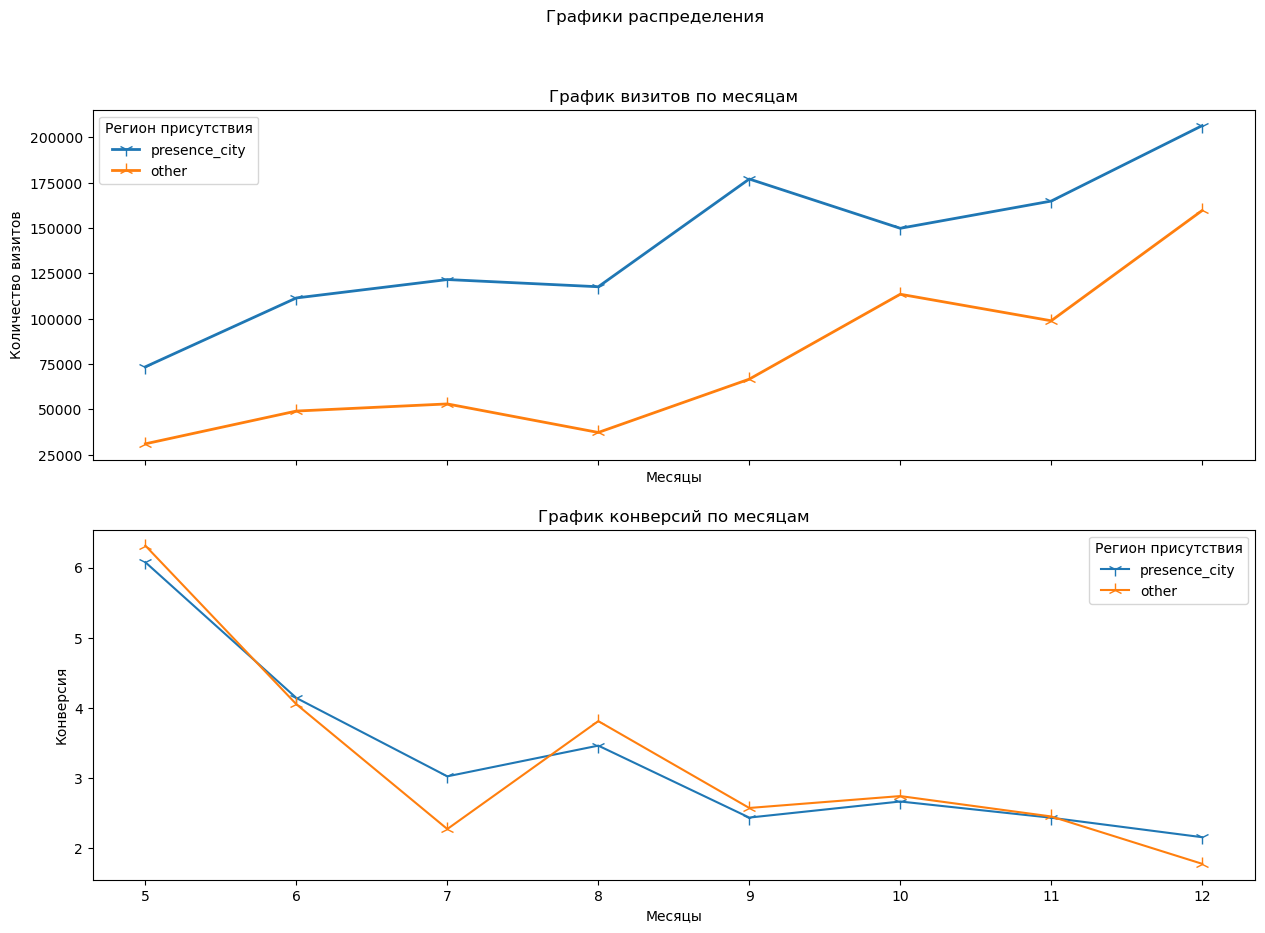

In [71]:
plot_for_2_cat_and_CR(
    stat = stats_3,
    cat1 = 'presence_city',
    cat2 = 'other',
    title1 = 'График визитов по месяцам',
    title2 = 'График конверсий по месяцам',
    xlabel = 'Месяцы',
    ylabel1 = 'Количество визитов',
    ylabel2 = 'Конверсия',
    legend = 'Регион присутствия'
)

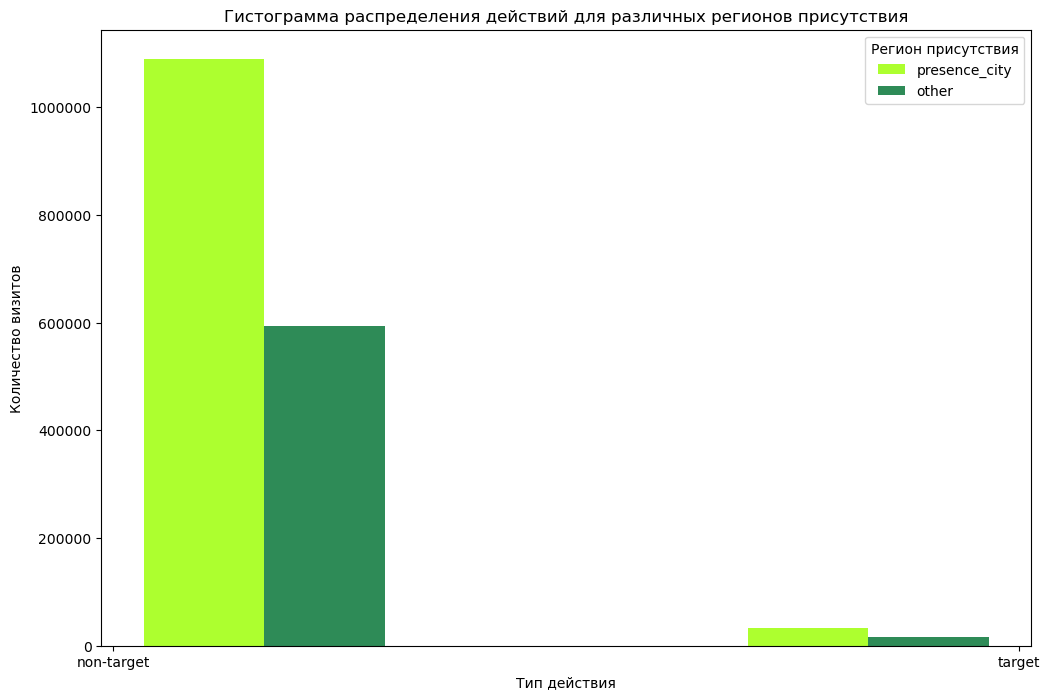

In [72]:
hist_for_2_cat(
    stat = stats_3,
    cat1 = 'presence_city',
    cat2 = 'other',
    title = 'Гистограмма распределения действий для различных регионов присутствия',
    xlabel = 'Тип действия',
    ylabel = 'Количество визитов',
    legend = 'Регион присутствия'
)

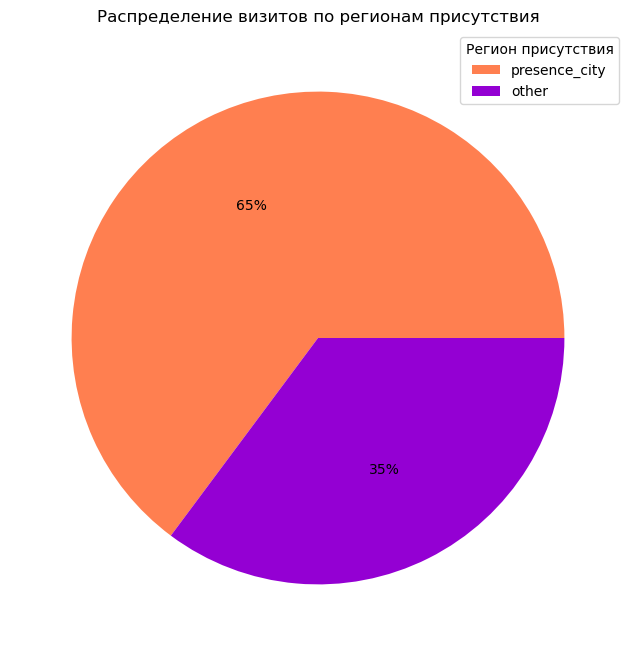

In [73]:
pie_for_2_cat(
    stat = stats_3,
    cat1 = 'presence_city',
    cat2 = 'other',
    title = 'Распределение визитов по регионам присутствия',
    legend = 'Регион присутствия'
)

3. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: Трафик из городов присутствия не отличается от трафика из иных регионов с точки зрения CR

Альтернативная гипотеза: Трафик из городов присутствия не отличается от трафика из иных регионов с точки зрения CR

4. Сформируем выборку для проверки гипотезы.

In [74]:
CR_3 = data_for_modeling(stats_3, 'presence_city', 'other')
CR_3

,presence_city,other
0,11.990408,0.000000
1,0.000000,0.000000
2,1.757812,0.803213
3,5.307263,2.035623
4,6.454983,6.484834
...,...,...
221,1.958384,2.225492
222,1.980514,2.086357
223,1.733940,1.823308
224,1.157937,1.724492


5. Определим статистические критерии и подберём корректный тест для проверки гипотезы. 

Принимая во внимание, что сформированные выборки независимы друг от друга, определим, распределены ли выборки нормально. Для этого используем тест Шапиро - Уилка, где установим нулевую гипотезу о нормальности распределений с уровнем значимости p-value 5%.

In [75]:
print(stats.shapiro(CR_3.presence_city))
print(stats.shapiro(CR_3.other))

ShapiroResult(statistic=0.83828204870224, pvalue=1.3041726478325941e-14)
ShapiroResult(statistic=0.9061017036437988, pvalue=1.0228549257584874e-10)


По результатам теста Шапиро - Уилка для обоих выборок значение p-value составило <5%, из чего следует, что нулевая гипотеза о нормальности распределений не подтверждена. 

6. Учитывая, что выборки независимы и нормальность распределений не подтверждена, для проверки основной нулевой гипотезы применяется критерий Манна - Уитни с уровнем значимости 5%. Альтернативной гипотезой определим, что среднее значение первой выборки больше среднего значения второй выборки.

In [76]:
print(stats.mannwhitneyu(CR_3.presence_city, CR_3.other, alternative = 'greater' ))

MannwhitneyuResult(statistic=27458.5, pvalue=0.08337528758281737)


7. **Вывод:** По итогам проведённых тестов нулевая гипотеза о том, что трафик из городов присутствия не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события, подтверждена.

 ### 4.4 Вопрос продуктовой команды "Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объема трафика, и с точки зрения CR)?"

1. Сформируем группу данных.

In [77]:
stats_4 = df_clean.groupby([
    'month',
    'day_of_year',
    'session_id',
    'utm_campaign',
    'utm_source',
    'utm_source_short',
    'device_category',
    'device_category_short',
    'geo_city',
    'geo_city_short'
], as_index = False).agg({'CR' : 'max'})

stats_4

,month,day_of_year,session_id,utm_campaign,utm_source,utm_source_short,device_category,device_category_short,geo_city,geo_city_short,CR
0,5,139,1004760235621272443.1621412730.1621412730,LTuZkdKfxRGVceoWkVyg,kjsLglQLzykiRbcDiGcD,other,desktop,desktop,Bishkek,other,0
1,5,139,1004760235621272443.1621415798.1621415798,LTuZkdKfxRGVceoWkVyg,kjsLglQLzykiRbcDiGcD,other,desktop,desktop,Bishkek,other,0
2,5,139,1034410142917290246.1621453035.1621453035,LTuZkdKfxRGVceoWkVyg,fDLlAcSmythWSCVMvqvL,other,mobile,mobile,Kazan,other,0
3,5,139,107779366941171287.1621433942.1621433942,LTuZkdKfxRGVceoWkVyg,fDLlAcSmythWSCVMvqvL,other,desktop,desktop,Nizhnevartovsk,other,0
4,5,139,1086882617365939108.1621410775.1621410775,LTuZkdKfxRGVceoWkVyg,fDLlAcSmythWSCVMvqvL,other,mobile,mobile,Izhevsk,other,0
...,...,...,...,...,...,...,...,...,...,...,...
1732261,12,365,995521876951260235.1640979566.1640979566,FTjNLDyTrXaWYgZymFkV,fgymSoTvjKPEgaIJqsiH,other,desktop,desktop,Moscow,presence_city,0
1732262,12,365,995673832894191865.1640978684.1640978684,FTjNLDyTrXaWYgZymFkV,fgymSoTvjKPEgaIJqsiH,other,desktop,desktop,Moscow,presence_city,0
1732263,12,365,997086314493818413.1640951473.1640951473,LEoPHuyFvzoNfnzGgfcd,ZpYIoDJMcFzVoPFsHGJL,other,mobile,mobile,Vorkuta,other,0
1732264,12,365,99873156802459656.1640937482.1640937482,LEoPHuyFvzoNfnzGgfcd,ZpYIoDJMcFzVoPFsHGJL,other,mobile,mobile,Kazan,other,0


2. Визуализируем полученную группу.

In [78]:
def data_for_scatter(stat, main_cat):
    x = stat[main_cat].unique().tolist()
    list1 = []
    list2 = []
    
    for i in x:
        list1.append(len(stat[(stat[main_cat] == i) & (stat['CR'] == 1)]))
        
        list2.append((
            len(stat[(stat[main_cat] == i) & (stat['CR'] == 1)]) /
            len(stat[stat[main_cat] == i])) * 100)
            
    series = {
         'x' : pd.Series(x),
         main_cat : pd.Series(list1),
         'CR' : pd.Series(list2),
         }
    
    data = pd.DataFrame(series)
    
    return data

In [79]:
def pie_and_scatter(stat, main_cat, main_cat_short, cat1, cat2, color1, color2, pie_legend, title1, title2, title3):
    plt.figure(figsize = (10, 10))
    
    bar_x = ['total', cat1, cat2]
    bar_colors = ["C8", color1, color2]  
    bar_counts = [len(stat),
                  len(stat[(stat[main_cat_short] == cat1) & (stat['CR'] == 1)][main_cat_short]),
                  len(stat[(stat[main_cat_short] == cat2) & (stat['CR'] == 1)][main_cat_short])
    ]
    
    plt.bar(bar_x, bar_counts, color = bar_colors)
    for i in range(len(bar_counts)):
        plt.annotate(bar_counts[i], (bar_x[i], bar_counts[i]))
    plt.ylabel('Количество визитов')
    plt.title('Отношение целевого трафика к общему количеству визитов')

    
    
    plt.figure(figsize = (10, 15))
    
    colors = {
        cat1 : color1,
        cat2 : color2
    }
    plt.pie((
        len(stat[(stat[main_cat_short] == cat1) & (stat['CR'] == 1)][main_cat_short]),
        len(stat[(stat[main_cat_short] == cat2) & (stat['CR'] == 1)][main_cat_short])),
        autopct = '%1.0f%%',
        colors = colors.values()
    )
    plt.legend(colors, title = pie_legend)
    plt.title(title1)

    
    stat_for_scatter = data_for_scatter(stat, main_cat)
     
        
    fig1, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
    
    stat1 = stat_for_scatter.sort_values(by = [main_cat], ascending = False)
    ax1.scatter(stat1.x.head(), stat1.iloc[ : , 1].head(), marker = '+', linewidths = 2)
    ax1.set_title('Кол-во визитов')
    ax2.scatter(stat1.x.head(), stat1.iloc[ : , 2].head(), marker = '+', linewidths = 2)
    ax2.set_title('Конверсия')
    
    if len(stat_for_scatter) >= 5:
        for i in range(5):
            ax1.annotate(stat1.head().iloc[i , 1], (stat1.head().iloc[i , 0], stat1.head().iloc[i , 1]))
            ax2.annotate(stat1.head().iloc[i , 2].round(2), (stat1.head().iloc[i , 0], stat1.head().iloc[i , 2]))
    else:
        for i in range(len(stat_for_scatter)):
            ax1.annotate(stat1.head().iloc[i , 1], (stat1.head().iloc[i , 0], stat1.head().iloc[i , 1]))
            ax2.annotate(stat1.head().iloc[i , 2].round(2), (stat1.head().iloc[i , 0], stat1.head().iloc[i , 2]))
            
    fig1.suptitle(title2)
    
    
    fig2, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
    
    stat2 = stat_for_scatter.sort_values(by = ['CR'], ascending = False)
    ax1.scatter(stat2.x.head(), stat2.iloc[ : , 1].head(), marker = '+', linewidths = 2)
    ax1.set_title('Кол-во визитов')
    ax2.scatter(stat2.x.head(), stat2.iloc[ : , 2].head(), marker = '+', linewidths = 2)
    ax2.set_title('Конверсия')
    
    if len(stat_for_scatter) >= 5:
        for i in range(5):
            ax1.annotate(stat2.head().iloc[i , 1], (stat2.head().iloc[i , 0], stat2.head().iloc[i , 1]))
            ax2.annotate(stat2.head().iloc[i , 2].round(2), (stat2.head().iloc[i , 0], stat2.head().iloc[i , 2]))
    else:
        for i in range(len(stat_for_scatter)):   
            ax1.annotate(stat2.head().iloc[i , 1], (stat2.head().iloc[i , 0], stat2.head().iloc[i , 1]))
            ax2.annotate(stat2.head().iloc[i , 2].round(2), (stat2.head().iloc[i , 0], stat2.head().iloc[i , 2]))
    
    fig2.suptitle(title3)

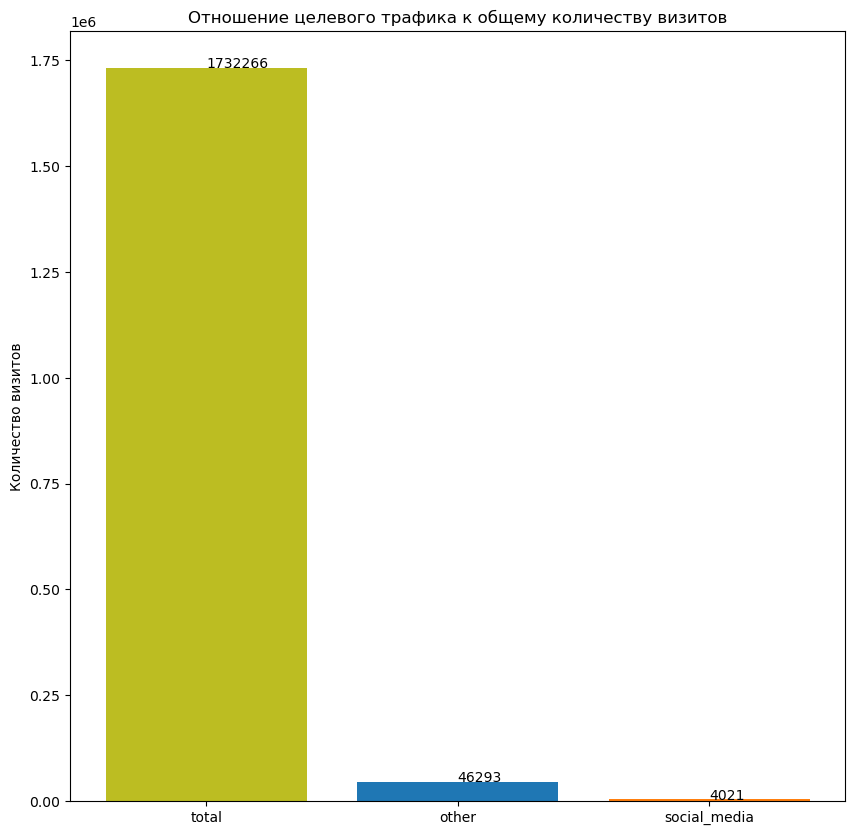

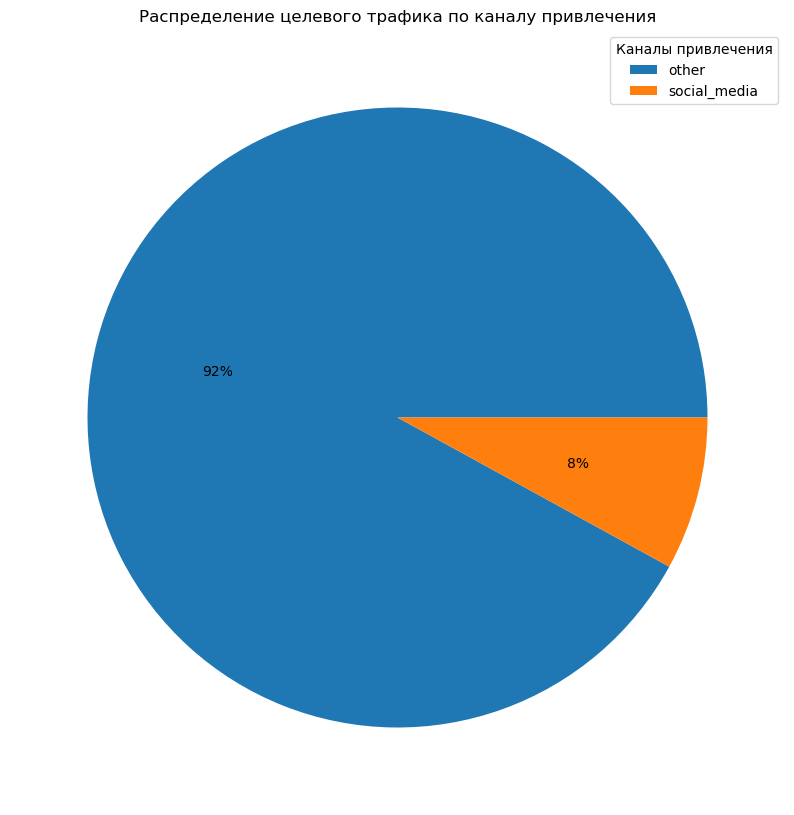

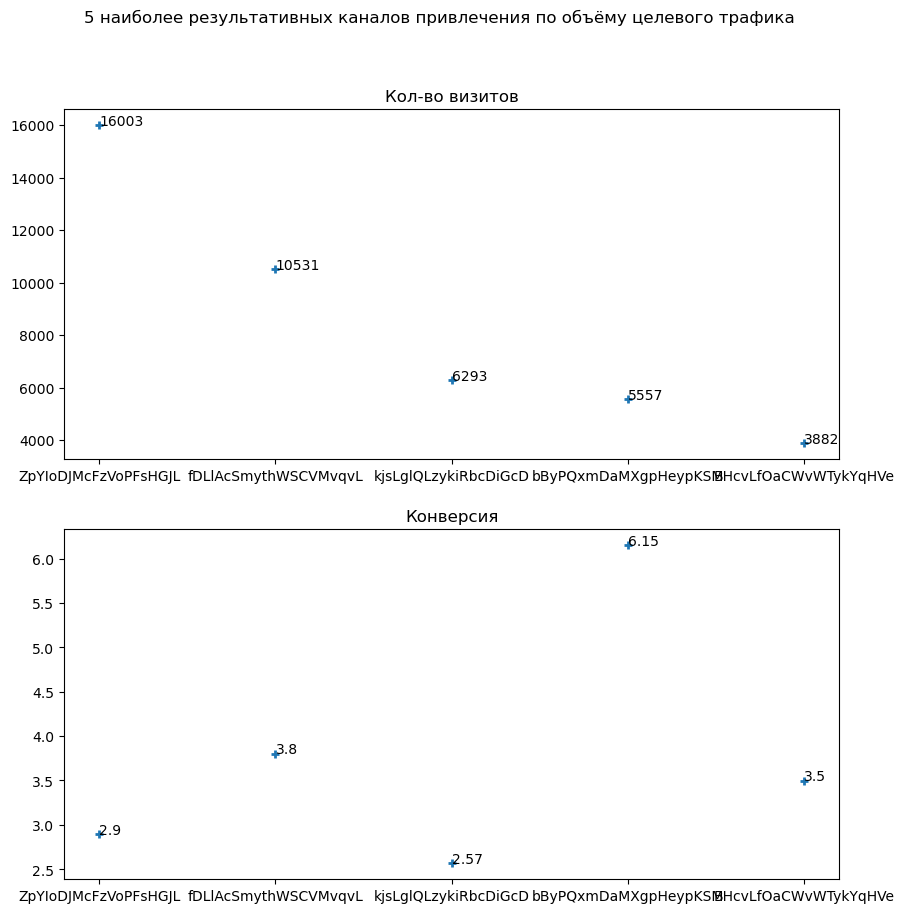

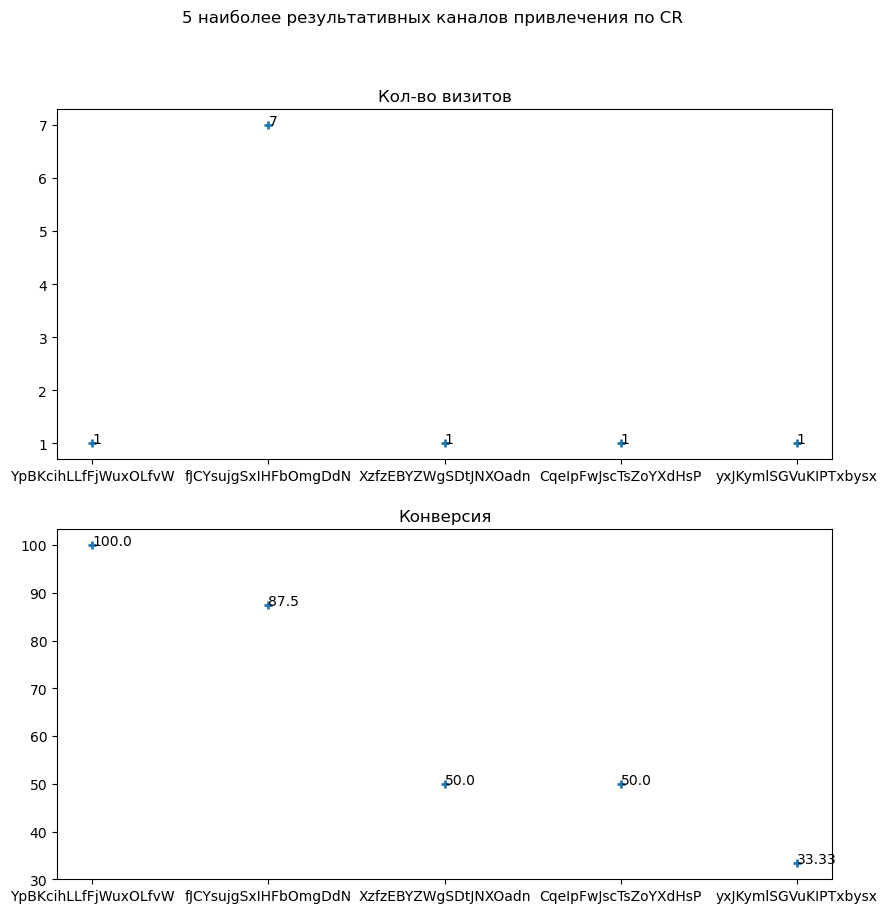

In [80]:
pie_and_scatter(
    stat = stats_4,
    main_cat = 'utm_source',
    main_cat_short = 'utm_source_short',
    cat1 = 'other',
    cat2 = 'social_media',
    color1 = 'C0',
    color2 = 'C1',
    pie_legend = 'Каналы привлечения',
    title1 = 'Распределение целевого трафика по каналу привлечения',
    title2 = '5 наиболее результативных каналов привлечения по объёму целевого трафика',
    title3 = '5 наиболее результативных каналов привлечения по CR'
)

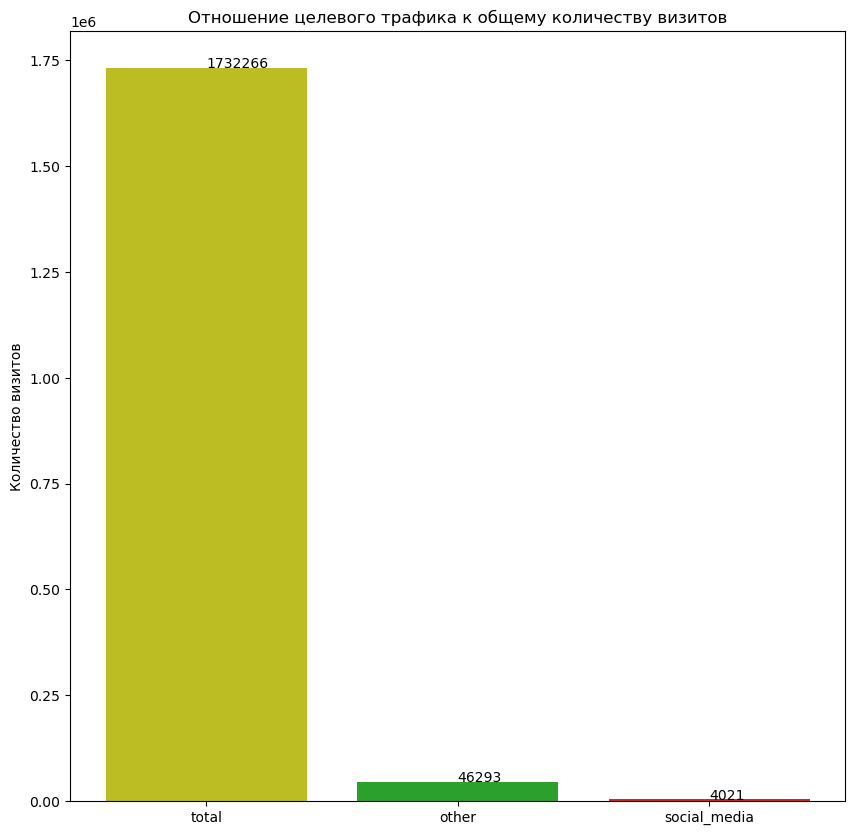

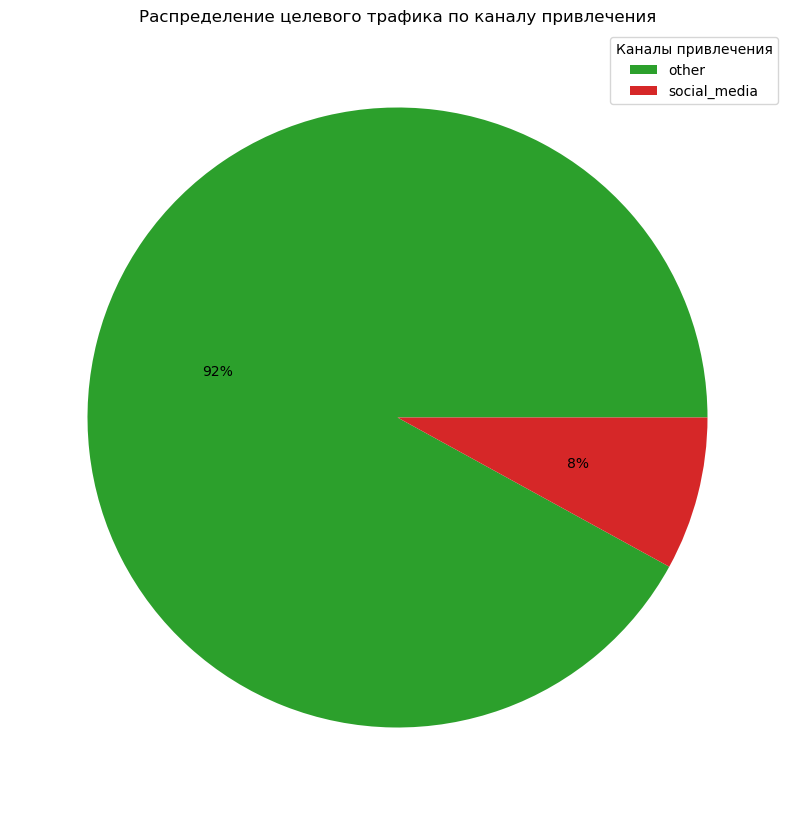

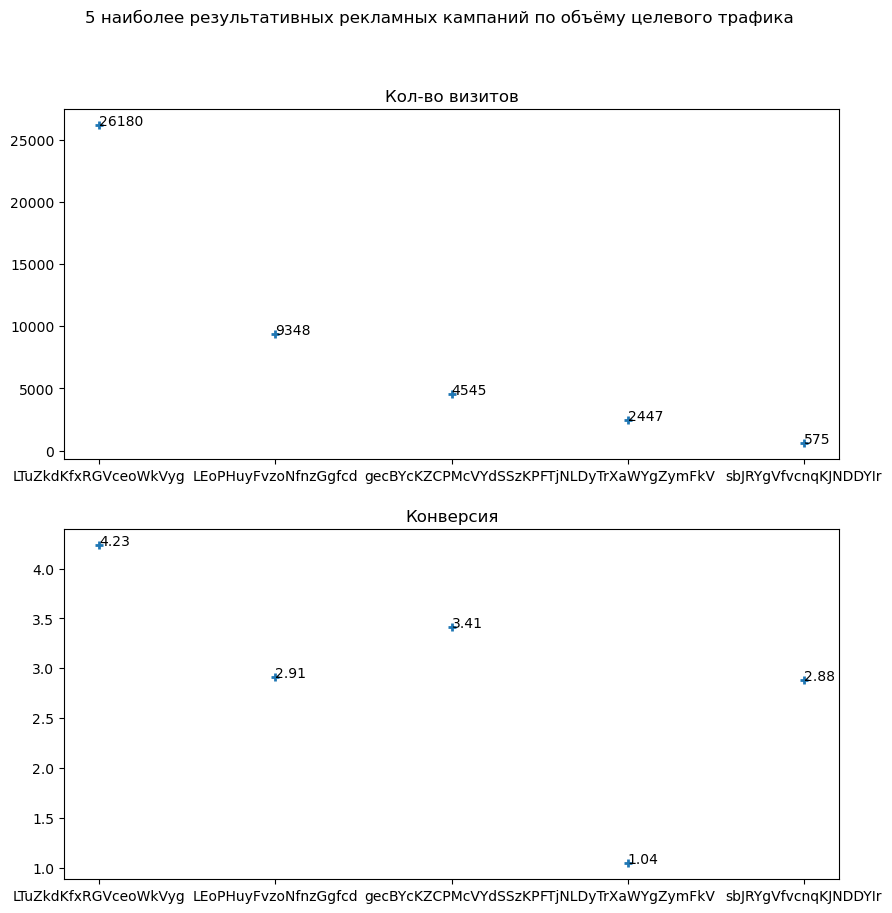

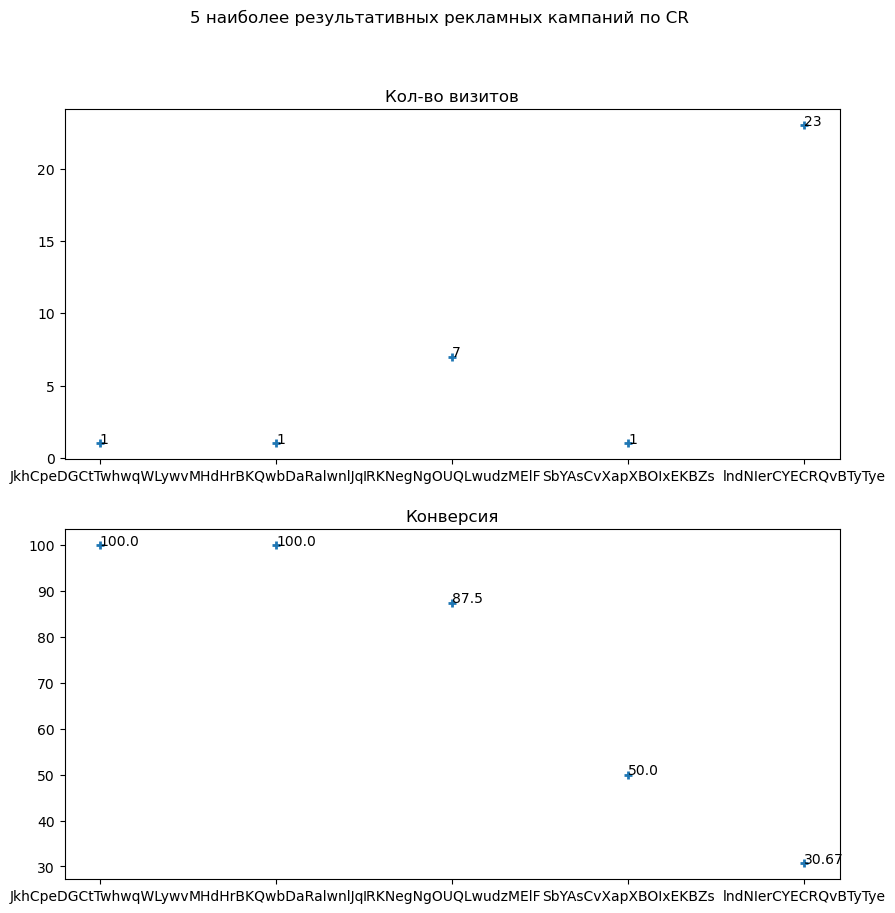

In [81]:
pie_and_scatter(
    stat = stats_4,
    main_cat = 'utm_campaign',
    main_cat_short = 'utm_source_short',
    cat1 = 'other',
    cat2 = 'social_media',
    color1 = 'C2',
    color2 = 'C3',
    pie_legend = 'Каналы привлечения',
    title1 = 'Распределение целевого трафика по каналу привлечения',
    title2 = '5 наиболее результативных рекламных кампаний по объёму целевого трафика',
    title3 = '5 наиболее результативных рекламных кампаний по CR'
)

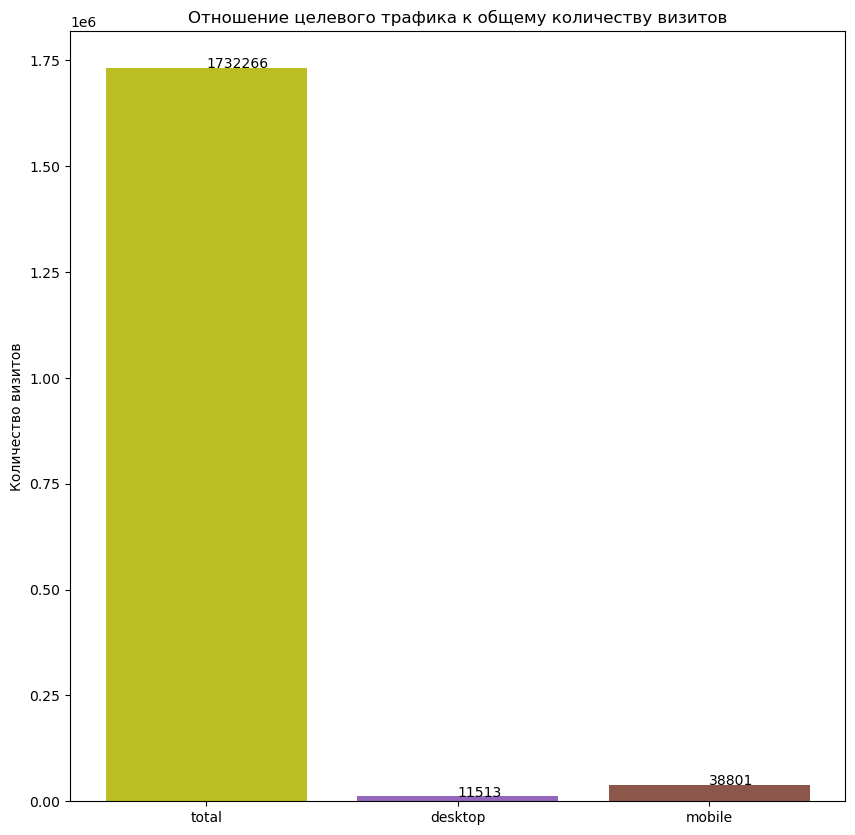

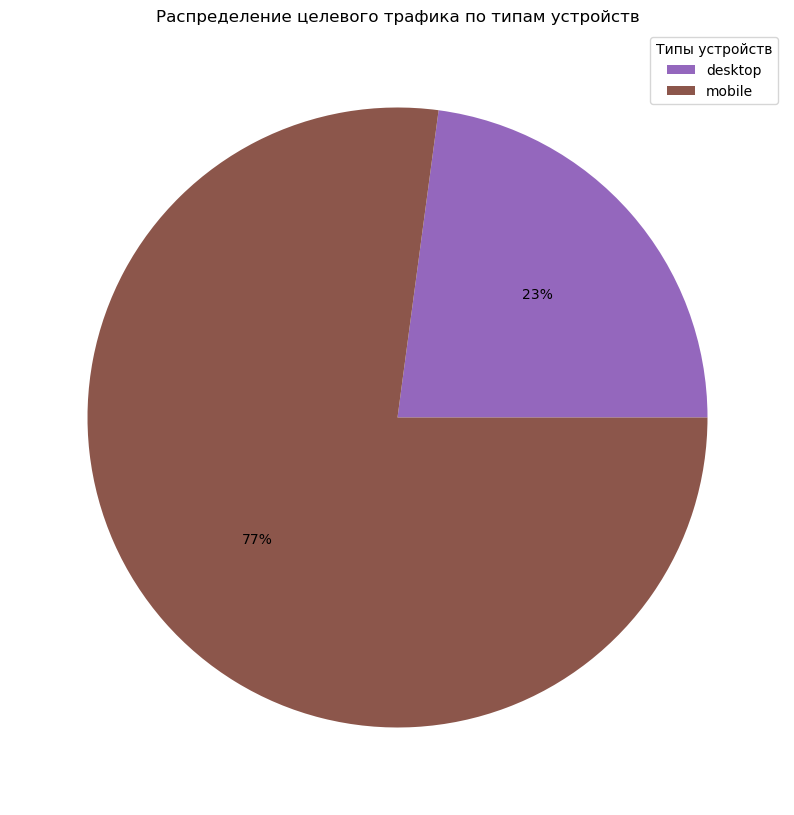

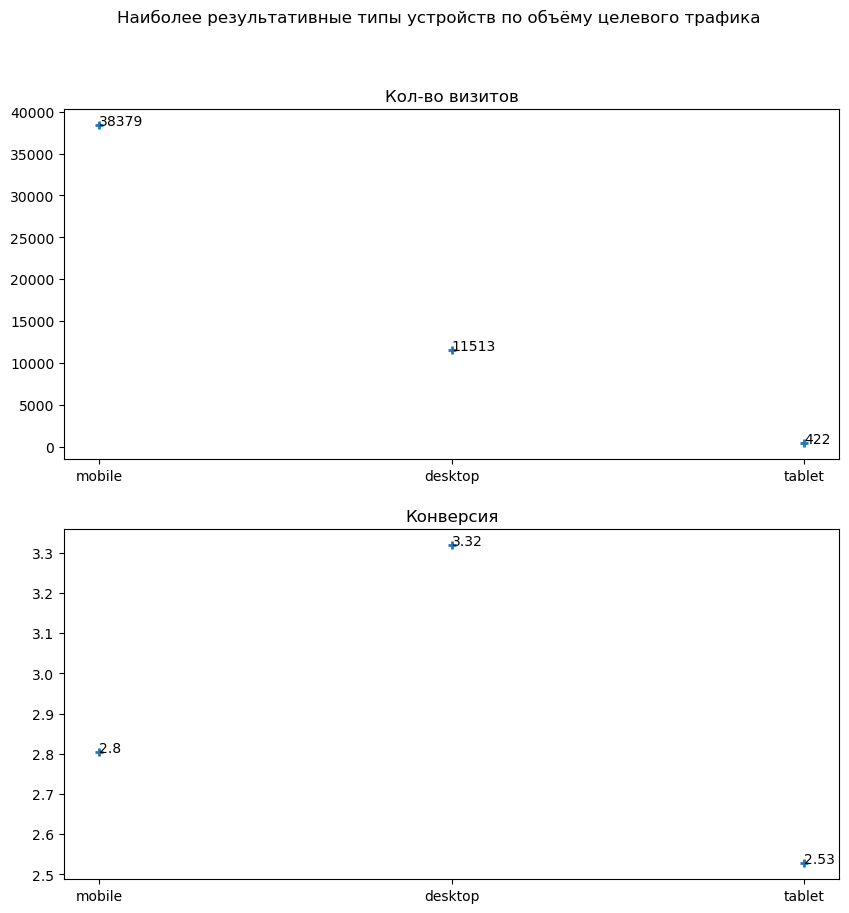

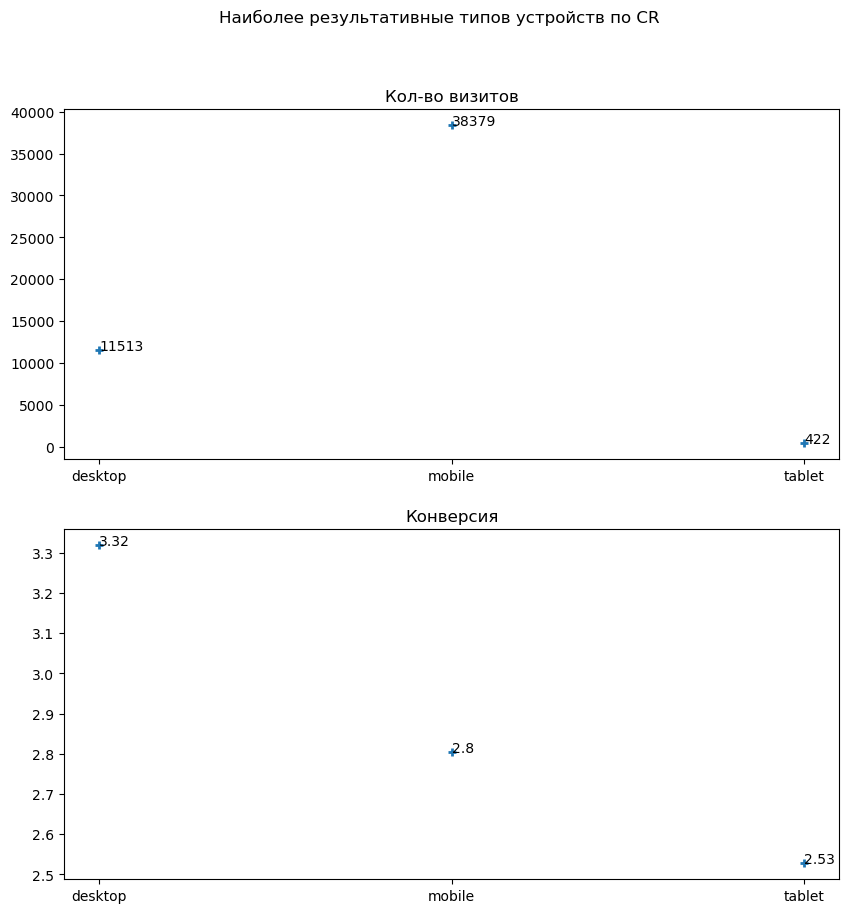

In [82]:
pie_and_scatter(
    stat = stats_4,
    main_cat = 'device_category',
    main_cat_short = 'device_category_short',
    cat1 = 'desktop',
    cat2 = 'mobile',
    color1 = 'C4',
    color2 = 'C5',
    pie_legend = 'Типы устройств',
    title1 = 'Распределение целевого трафика по типам устройств',
    title2 = 'Наиболее результативные типы устройств по объёму целевого трафика',
    title3 = 'Наиболее результативные типов устройств по CR'
)

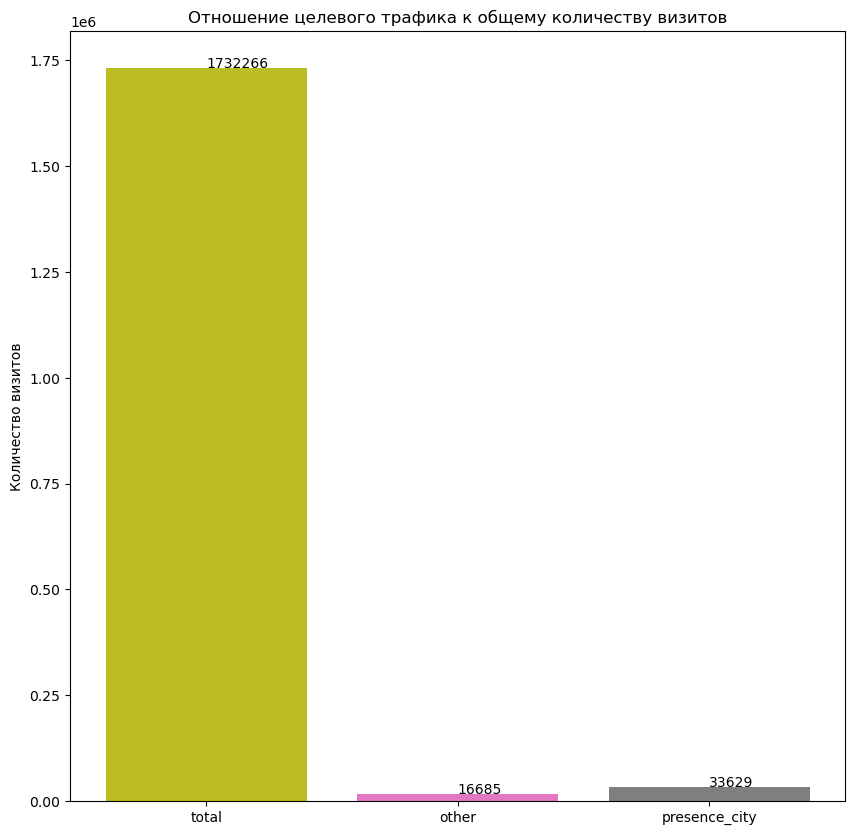

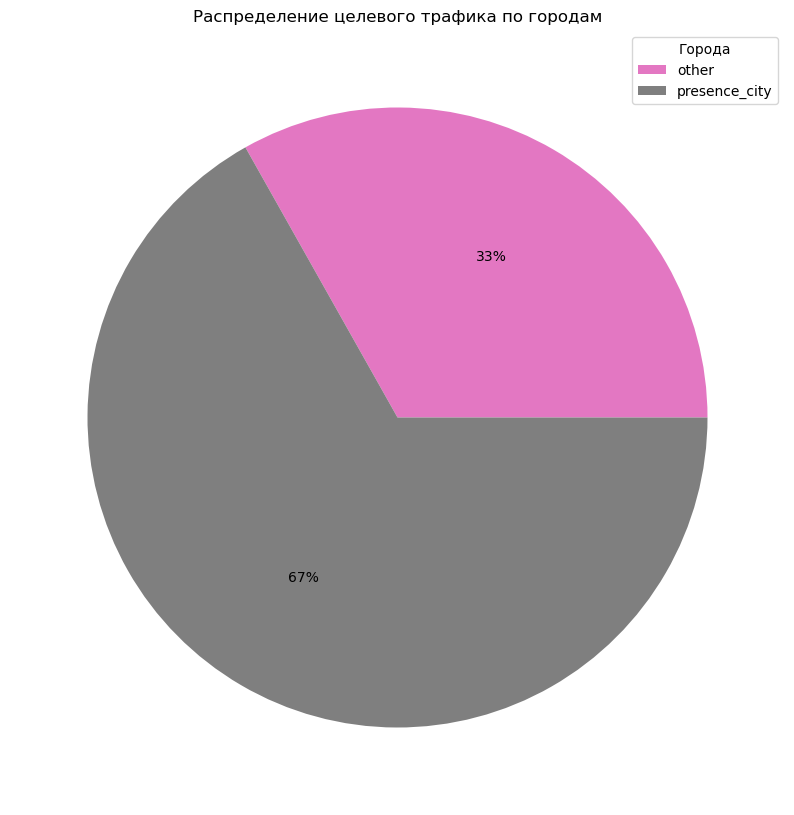

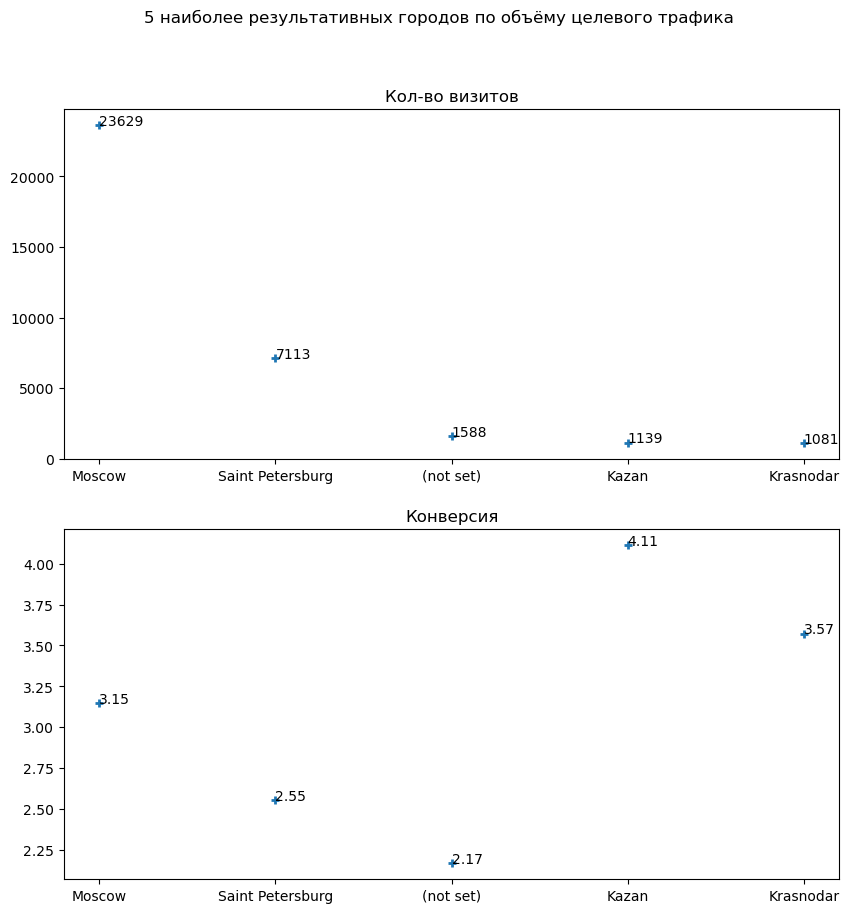

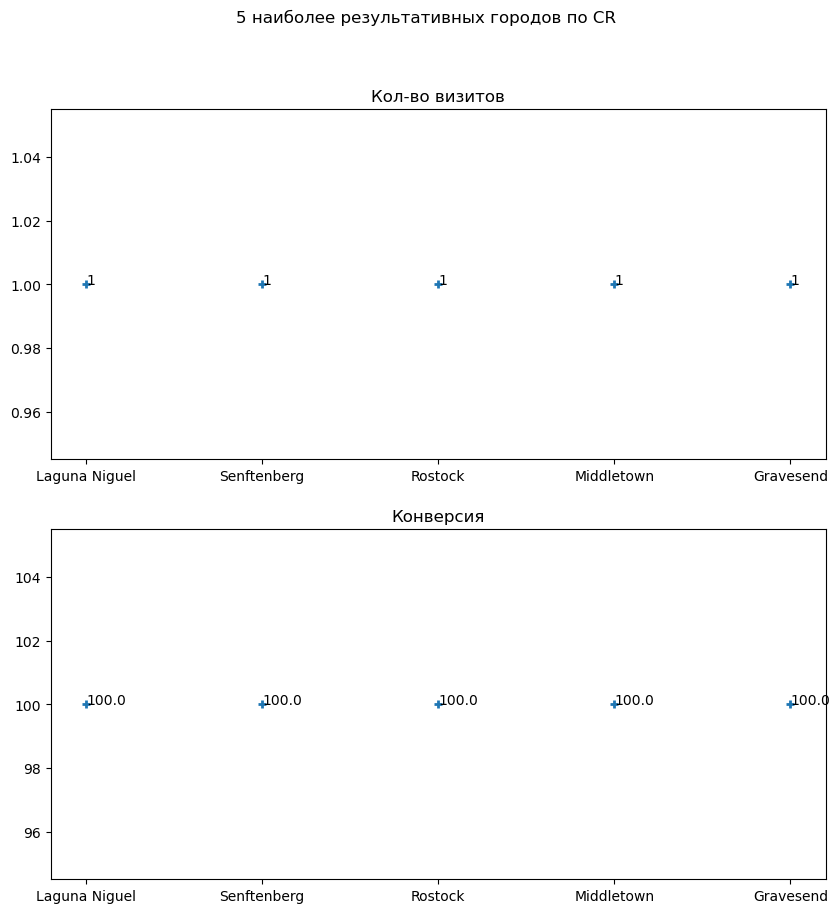

In [83]:
pie_and_scatter(
    stat = stats_4,
    main_cat = 'geo_city',
    main_cat_short = 'geo_city_short',
    cat1 = 'other',
    cat2 = 'presence_city',
    color1 = 'C6',
    color2 = 'C7',
    pie_legend = 'Города',
    title1 = 'Распределение целевого трафика по городам',
    title2 = '5 наиболее результативных городов по объёму целевого трафика',
    title3 = '5 наиболее результативных городов по CR'
)

3. **Вывод:** Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объема трафика, и с точки зрения CR)?

Согласно представленным графикам распределения можно сделать следующие выводы:

1) Наибольшее количество целевого трафика по каналу привлечения приходится на `other` - 92% или 46 293 в количественном выражении. 

Анализируя 5 наиболее результативных каналов привлечения по объёму целевого трафика, наибольшее количество целевых визитов пришлось на канал `ZpYIoDJMcFzVoPFsHGJL`: 16 003 с конверсией 2,9%. Общее количество визитов по данному каналу привлечения ~551 800. Из этого следует, что большее кол-во целевых визитов обусловлено большим охватом пользователей. 

Анализируя 5 наиболее результативных каналов привлечения по CR, самая высокая конверсия приходится на канал `YpBKcihLLfFjWuxOLfvW` - 100% с количеством целевых визитов 1. Высокая конверсия обусловлена единственным целевым визитом. 

Наиболее результативным с точки зрения привлечения целевого трафика (и с точки зрения объема трафика, и с точки зрения CR) является канал привлечения `fDLlAcSmythWSCVMvqvL` c количеством целевых визитов 10 531 и CR 3.8%. Это обуславливается тем, что меньшее количество целевых визитов в сравнении с каналом `ZpYIoDJMcFzVoPFsHGJL` покрывается более высокой конверсией (на 31%). Также, принимая во внимание тот факт, что канал привлечения `fDLlAcSmythWSCVMvqvL` относится к органическому трафику, а `ZpYIoDJMcFzVoPFsHGJL` - к платному трафику, и по итогам проведённых тестов была принята альтернативная гипотеза, что органический трафик отличается от платного в большую сторону с точки зрения CR (Conversion Rate) в целевые события, канал привлечения `fDLlAcSmythWSCVMvqvL` является более эффективным.

Дополнительно следует отметить, что для привлечения одинакового количества целевых визитов по каналу `ZpYIoDJMcFzVoPFsHGJL` потребуется охватить на 31% больше пользователей в сравнении с каналом `fDLlAcSmythWSCVMvqvL`, что может отразиться на экономике привлечения. 

2) Наибольшее количество целевого трафика по рекламных кампаниям относится к каналу привлечения `other`. 

Рассматривая 5 наиболее результативных рекламных кампаний по объему целевого трафика, наибольшее количество целевых визитов приходится на кампанию `LTuZkdKfxRGVceoWkVyg`: 26 180 целевых визитов с конверсией 4,23%. Общее количество визитов по данной кампании составило ~ 618 900.

Исходя из распределения рекламных кампания с точки зрения CR, наиболее результативными оказались кампании `JkhCpeDGCtTwhwqWLywv` и `MHdHrBKQwbDaRalwnl` со значением конверсии 100%. Высокая конверсия обусловлена единственным целевым визитом. 

Наиболее результативной с точки зрения привлечения целевого трафика (и с точки зрения объема трафика, и с точки зрения CR) является рекламная кампания `LTuZkdKfxRGVceoWkVyg` c количеством целевых визитов 26 180и CR 4,23%. Данная рекламная кампания привлекла наибольшее количество целевых визитов и на 180% больше визитов в сравнении со второй по результативности кампанией. Также данная рекламная кампания имеет высокий показатель конверсии 4,23%, что положительно влияет на эффективность и экономику рекламных кампаний, т.к. для привлечения одинакового количества целевых визитов по первой кампании потребуется охватить на  45% меньше пользователей, чем по второй. 

3) Наибольшее количество целевого трафика по типу устройств приходится на `mobile` - 77% или 38 801 в количественном выражении. 

Анализируя наиболее результативные типы устройств по объёму целевого трафика, наибольшее количество целевых визитов пришлось на устройства типа `mobile`:38 379 с конверсией 2,8%. Общее количество визитов по данному типу ~1 370 600.

Анализируя наиболее результативные типы устройств по CR, самая высокая конверсия приходится на устройства типа `desktop` - 3.32% с количеством целевых визитов 11 513. Общее количество визитов по данному типу ~346 680.

Наиболее результативным с точки зрения привлечения целевого трафика (и с точки зрения объема трафика, и с точки зрения CR) является тип устройства `mobile` c количеством целевых визитов 38 379 и CR 2.8%. Это обуславливается тем, что меньшая (на 19%) конверсия в сравнении с типом устройств `desktop` покрывается большим количеством целевых визитов  (на 233%). 

Учитывая, что гипотеза о равенстве конверсий по типу устройств `mobile` и `desktop`  подтверждена, а также принимая во внимание тот факт, что на начало 2023 года количество пользователей мобильных устройств составляло 68% от общей численности населения всего мира, следует что основной целевой трафик идёт через мобильные устройства.

4) Наибольшее количество целевого трафика по городам приходится на `presence_city` - 67% или 33 629 в количественном выражении. 

Анализируя 5 наиболее результативных городов по объёму целевого трафика, наибольшее количество целевых визитов пришлось на `Moscow` - 23 629 с конверсией 3.15%. Общее количество визитов по данному типу ~750 000.

Анализируя 5 наиболее результативных городов по CR, самая высокая конверсия приходится на несколько городов, таких как: `Laguna Niguel`, `Senftenberg`, `Rostock`, `Middletown` и `Gravesend`, - 100% с количеством целевых визитов 1. Высокая конверсия обусловлена единственным целевым визитом на каждый из городов. 

Наиболее результативным с точки зрения привлечения целевого трафика (и с точки зрения объема трафика, и с точки зрения CR) является город `Moscow` c количеством целевых визитов 23 629 и CR 3.15%. Москва привлекла наибольшее количество целевых визитов и на 232% больше визитов в сравнении со вторым по результативности городом Санкт-Петербургом. Также по Москва имеет высокий показатель конверсии 3,15%, что положительно влияет на эффективность, т.к. для привлечения одинакового количества целевых визитов потребуется охватить на 19% меньше пользователей в сравнении с Санкт- Петербургом. 

Учитывая, что гипотеза о равенстве конверсий из городов присутствия и из иных регионов подтверждена, а также принимая во внимание тот факт, что Москва относится к одному из регионов с наибольшей долей активных интернет-пользователей (~88% от населения региона),  основной целевой трафик идёт через данный регион. 

 ### 4.5 Вопрос продуктовой команды "Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?"

1. Сформируем группу данных.

In [84]:
stats_5 = df_clean.groupby([
    'month',
    'session_id',
    'manufacturer',
    'model'
], as_index = False).agg({'CR' : 'max'})

stats_5

,month,session_id,manufacturer,model,CR
0,5,1000027718532820202.1622240490.1622240490,N/A,N/A,0
1,5,1000027718532820202.1622291029.1622291029,N/A,N/A,0
2,5,1000102382243923716.1621870341.1621870341,N/A,N/A,0
3,5,1000175697336036175.1622240079.1622240079,N/A,N/A,0
4,5,1000233456055834618.1621841915.1621841915,N/A,N/A,0
...,...,...,...,...,...
2108816,12,999899805834287423.1639717182.1639717182,N/A,N/A,0
2108817,12,999899805834287423.1639717182.1639717182,renault,duster,0
2108818,12,999926164048975376.1640109588.1640109588,N/A,N/A,0
2108819,12,999926164048975376.1640109588.1640109588,skoda,kodiaq,0


2. Очистим группу данных от значений с пропущенными `manufacturer` и `model`

In [85]:
stats_5_clean = stats_5[stats_5['manufacturer'] != 'N/A']

In [86]:
stats_5_clean

,month,session_id,manufacturer,model,CR
838729,10,1000013386240115915.1635402956.1635402956,lada-vaz,vesta,0
838733,10,1000203696240264773.1634666053.1634666380,kia,seltos,0
838734,10,1000203696240264773.1634666053.1634666380,nissan,qashqai,0
838735,10,1000203696240264773.1634666053.1634666380,volkswagen,tiguan,0
838736,10,1000250618757714365.1634406840.1634406887,volkswagen,polo,0
...,...,...,...,...,...
2108803,12,999586127193887360.1640813186.1640813186,skoda,rapid,0
2108811,12,99980372068699052.1638566827.1638566827,kia,rio,0
2108814,12,999869672343970659.1639949158.1639949158,renault,logan,1
2108817,12,999899805834287423.1639717182.1639717182,renault,duster,0


3. Визуализируем полученную группу.

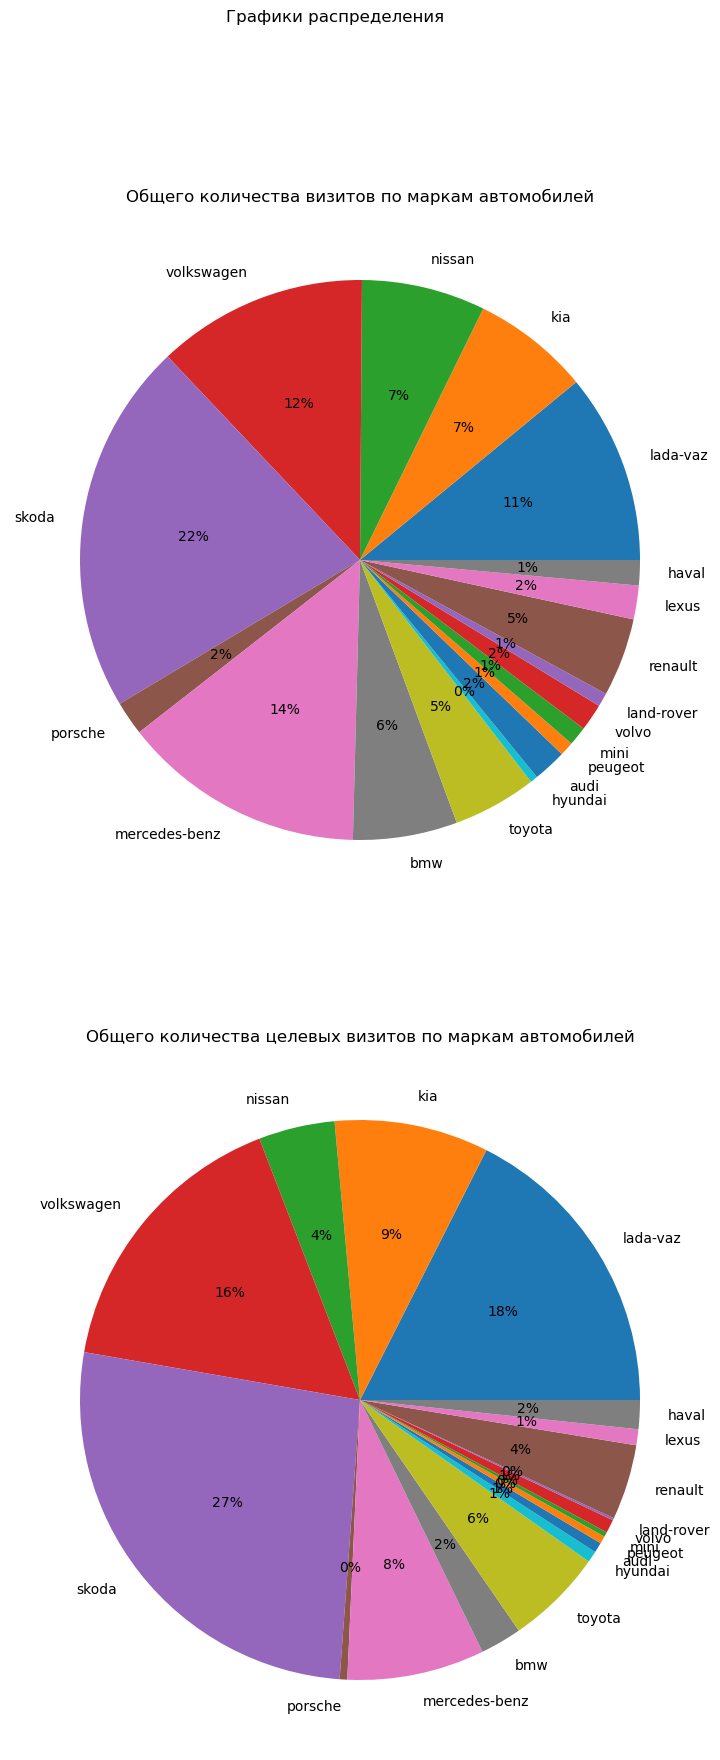

In [87]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 20), sharex = True)

manufacturer_total_counts = []
manufacturer_target_counts = []
manufacturer = stats_5_clean.manufacturer.unique().tolist()

for i in manufacturer:
    total_counts = len(stats_5_clean[stats_5_clean['manufacturer'] == i])
    target_counts = len(stats_5_clean[(stats_5_clean['manufacturer'] == i) & (stats_5_clean['CR'] == 1)])
    manufacturer_total_counts.append(total_counts)
    manufacturer_target_counts.append(target_counts)

ax1.pie(manufacturer_total_counts,
        labels = manufacturer,
        autopct = '%1.0f%%')
ax1.set_title('Общего количества визитов по маркам автомобилей')

ax2.pie(manufacturer_target_counts,
        labels = manufacturer,
        autopct = '%1.0f%%')
ax2.set_title('Общего количества целевых визитов по маркам автомобилей')

fig.suptitle('Графики распределения');

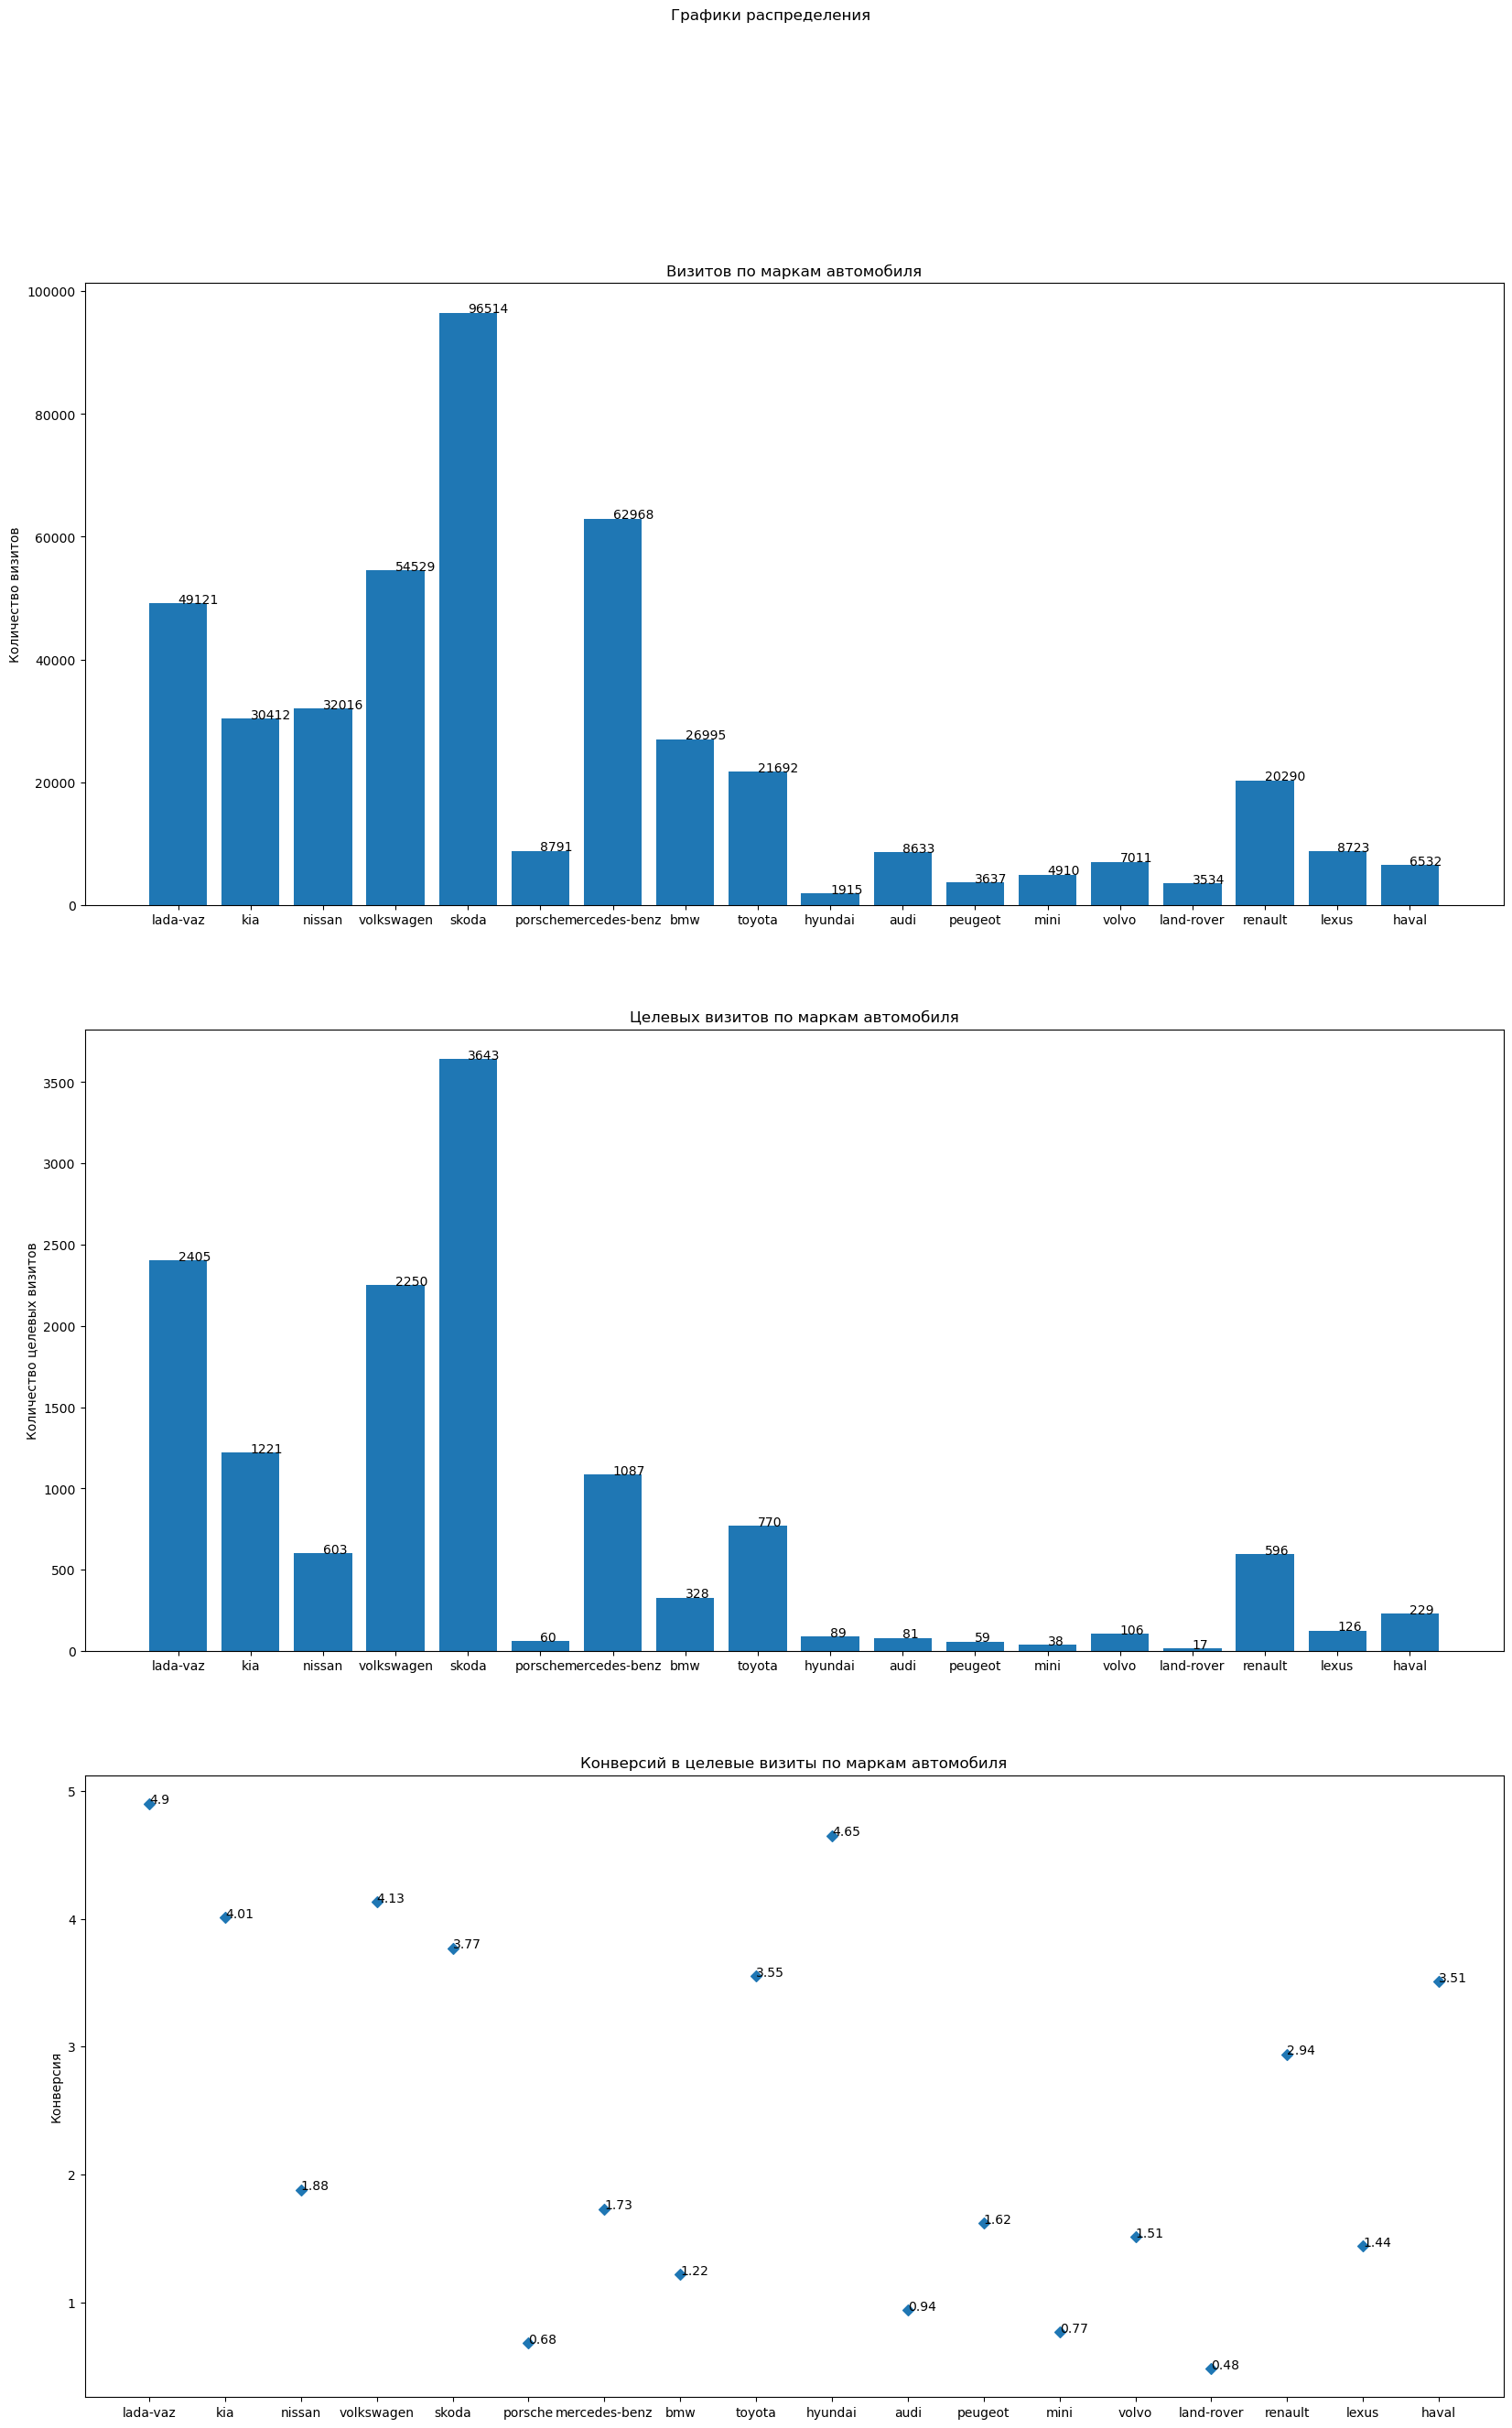

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 30), sharex = False)
                                  
ax1.bar(manufacturer, manufacturer_total_counts)

for i in range(len(manufacturer_total_counts)):
    ax1.annotate(manufacturer_total_counts[i], (manufacturer[i], manufacturer_total_counts[i]))
ax1.set_ylabel('Количество визитов')
ax1.set_title('Визитов по маркам автомобиля')

ax2.bar(manufacturer, manufacturer_target_counts)

for i in range(len(manufacturer_target_counts)):
    ax2.annotate(manufacturer_target_counts[i], (manufacturer[i], manufacturer_target_counts[i]))
ax2.set_ylabel('Количество целевых визитов')
ax2.set_title('Целевых визитов по маркам автомобиля')

manufacturer_CR = []
for i in manufacturer:
    CR = 100 * (len(stats_5_clean[(stats_5_clean['manufacturer'] == i) & (stats_5_clean['CR'] == 1)]) / len(stats_5_clean[stats_5_clean['manufacturer'] == i]))
    CR = round(CR, 2)
    manufacturer_CR.append(CR)

ax3.scatter(manufacturer, manufacturer_CR, marker = 'D')

for i in range(len(manufacturer_CR)):
    ax3.annotate(manufacturer_CR[i], (manufacturer[i], manufacturer_CR[i]))
ax3.set_ylabel('Конверсия')
ax3.set_title('Конверсий в целевые визиты по маркам автомобиля')

fig.suptitle('Графики распределения');

In [89]:
def manufacturer_and_model(manufacturer):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 30), sharex = False)
    
    
    model_total_counts = []
    model_target_counts = []
    model = stats_5_clean[stats_5_clean['manufacturer'] == manufacturer].model.unique().tolist()

    for i in model:
        total_counts = len(stats_5_clean[(stats_5_clean['manufacturer'] == manufacturer) & (stats_5_clean['model'] == i)])
        target_counts = len(stats_5_clean[(stats_5_clean['manufacturer'] == manufacturer) & (stats_5_clean['model'] == i) & (stats_5_clean['CR'] == 1)])
        model_total_counts.append(total_counts)
        model_target_counts.append(target_counts)
    
    ax1.bar(model, model_total_counts)

    for i in range(len(model_total_counts)):
        ax1.annotate(model_total_counts[i], (model[i], model_total_counts[i]))
    ax1.set_ylabel('Количество визитов')
    ax1.set_title('Визитов по модели автомобиля')

    ax2.bar(model, model_target_counts)

    for i in range(len(model_target_counts)):
        ax2.annotate(model_target_counts[i], (model[i], model_target_counts[i]))
    ax2.set_ylabel('Количество целевых визитов')
    ax2.set_title('Целевых визитов по модели автомобиля')
        
    model_CR = []
    for i in model:
        CR = 100 * (len(stats_5_clean[(stats_5_clean['manufacturer'] == manufacturer) & (stats_5_clean['model'] == i) & (stats_5_clean['CR'] == 1)]) /
                    len(stats_5_clean[(stats_5_clean['manufacturer'] == manufacturer) & (stats_5_clean['model'] == i)]))
        CR = round(CR, 2)
        model_CR.append(CR)
            
    ax3.scatter(model, model_CR, marker = 'D')
        
    for i in range(len(model_CR)):
        ax3.annotate(model_CR[i], (model[i], model_CR[i]))
    ax3.set_ylabel('Конверсия')
    ax3.set_title('Конверсий в целевые визиты по модели автомобиля')

    fig.suptitle('Графики распределения');

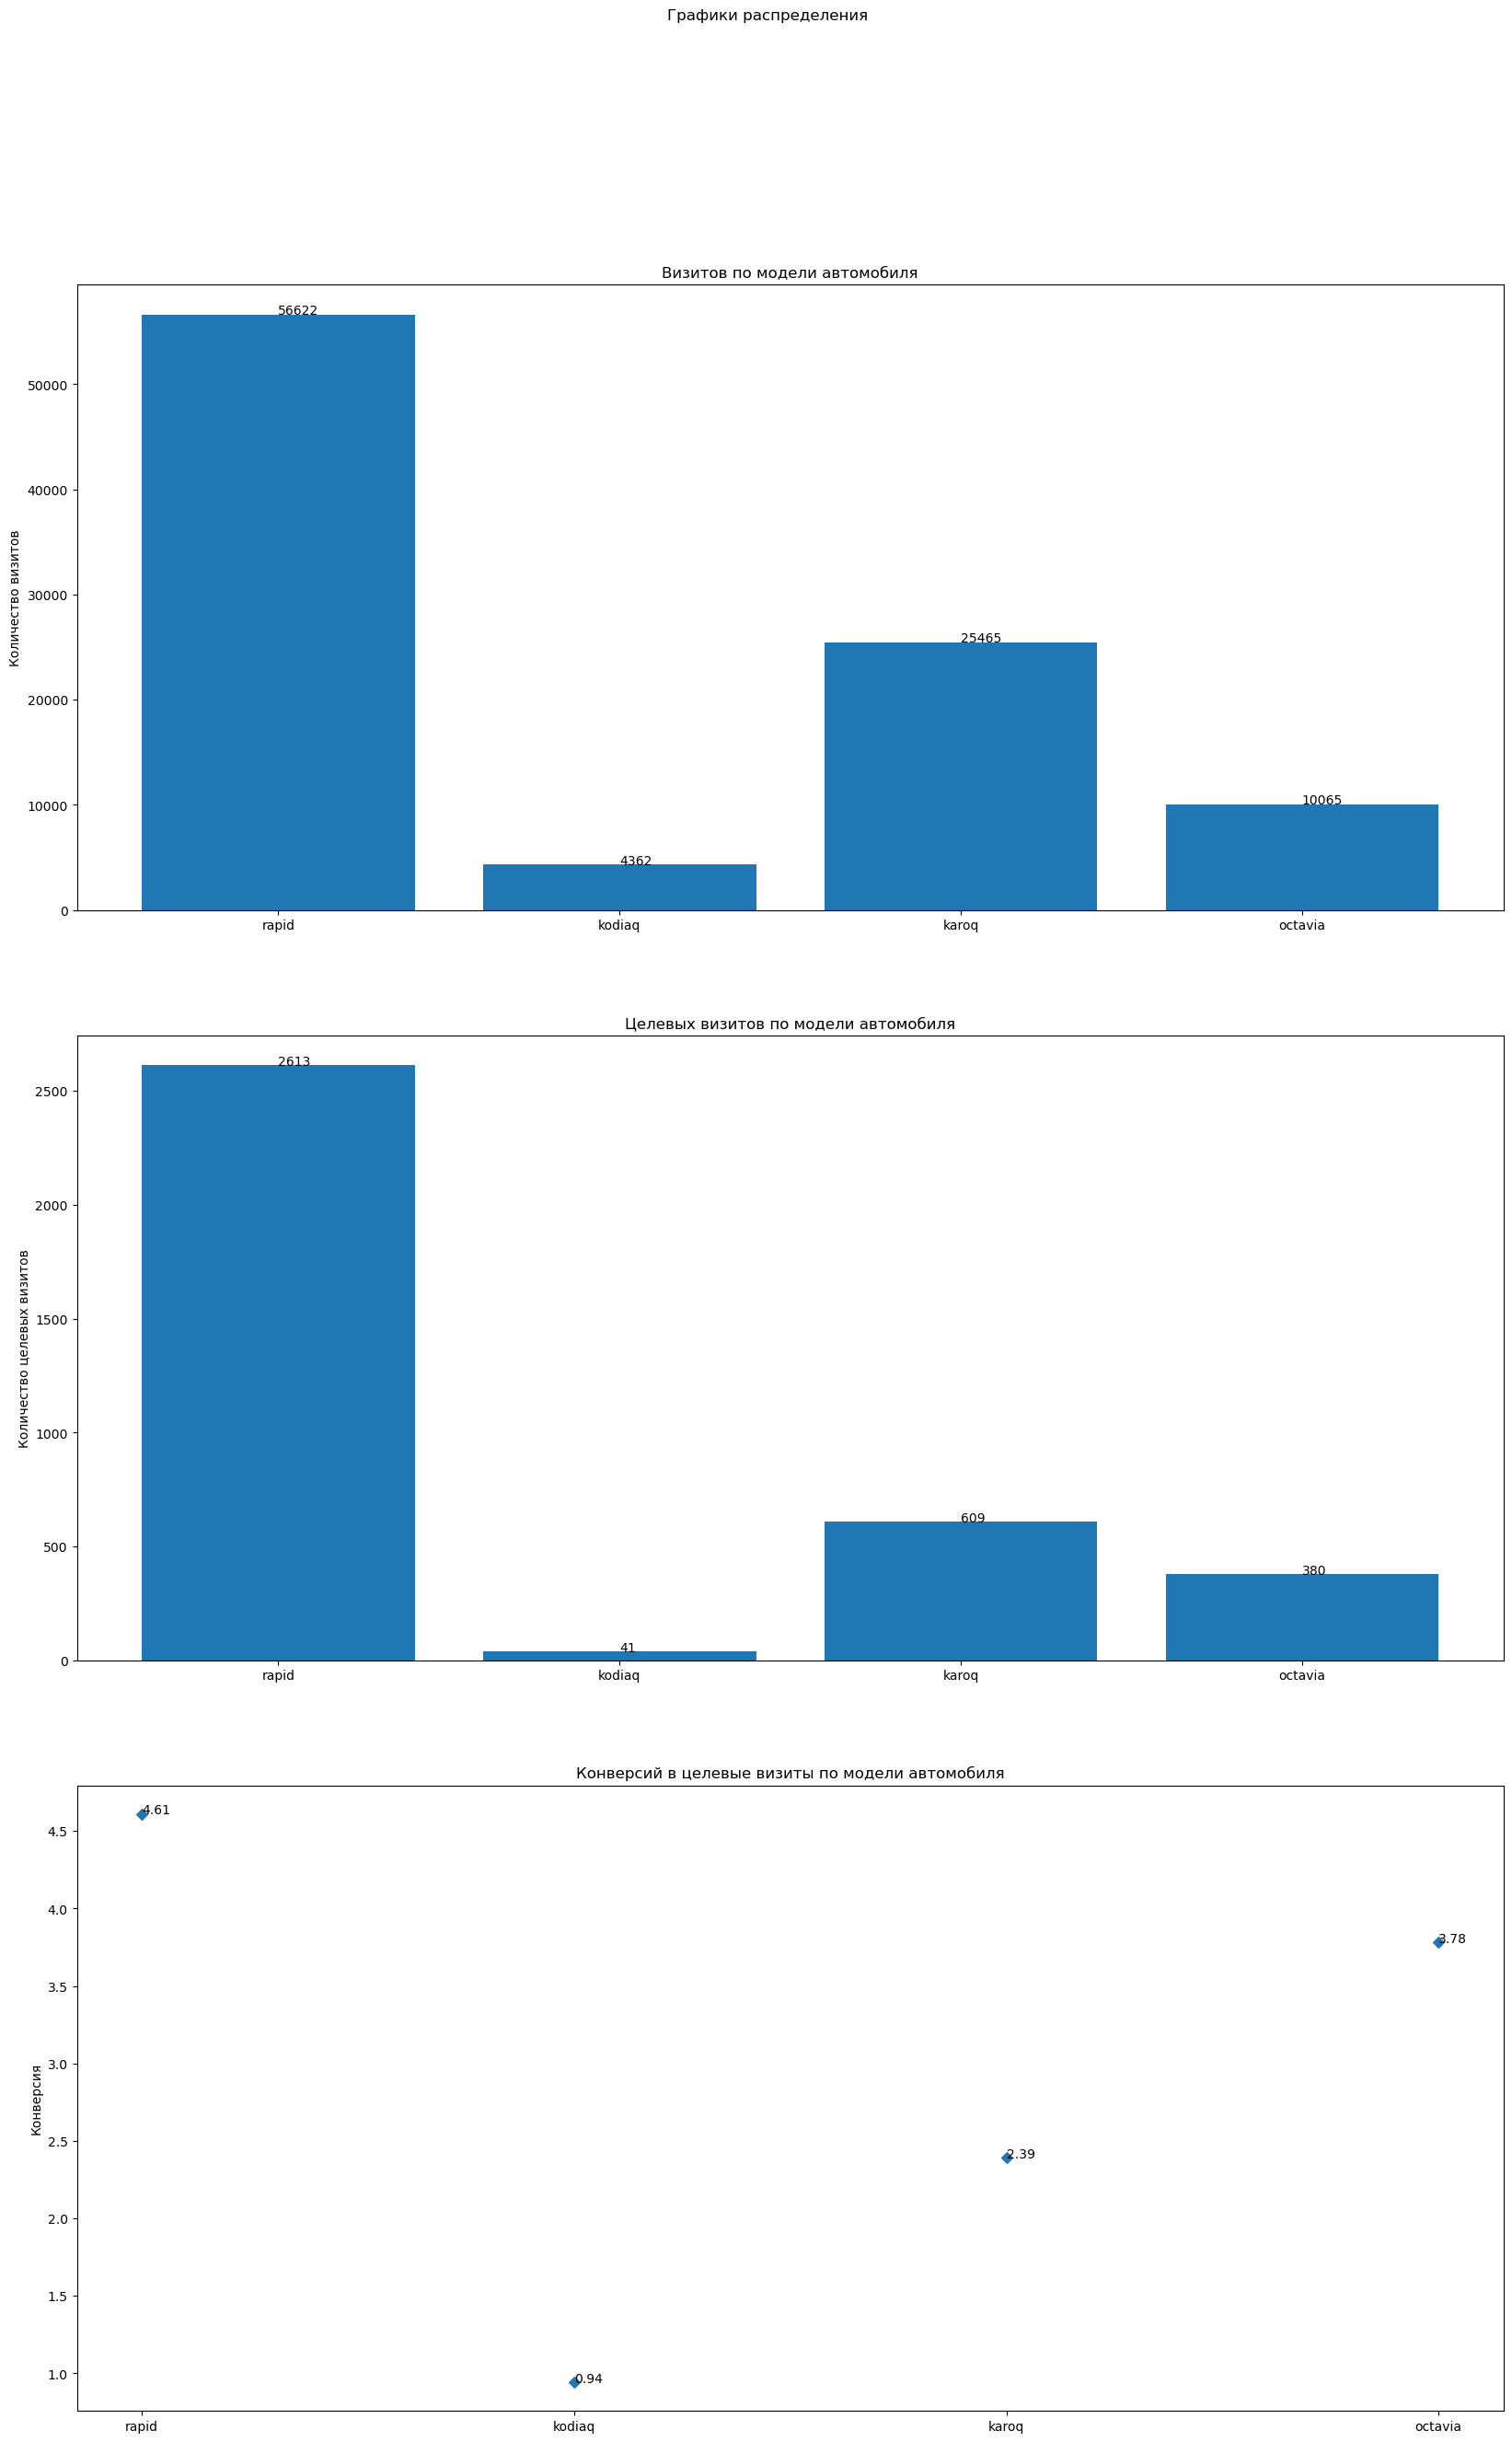

In [90]:
manufacturer_and_model('skoda')

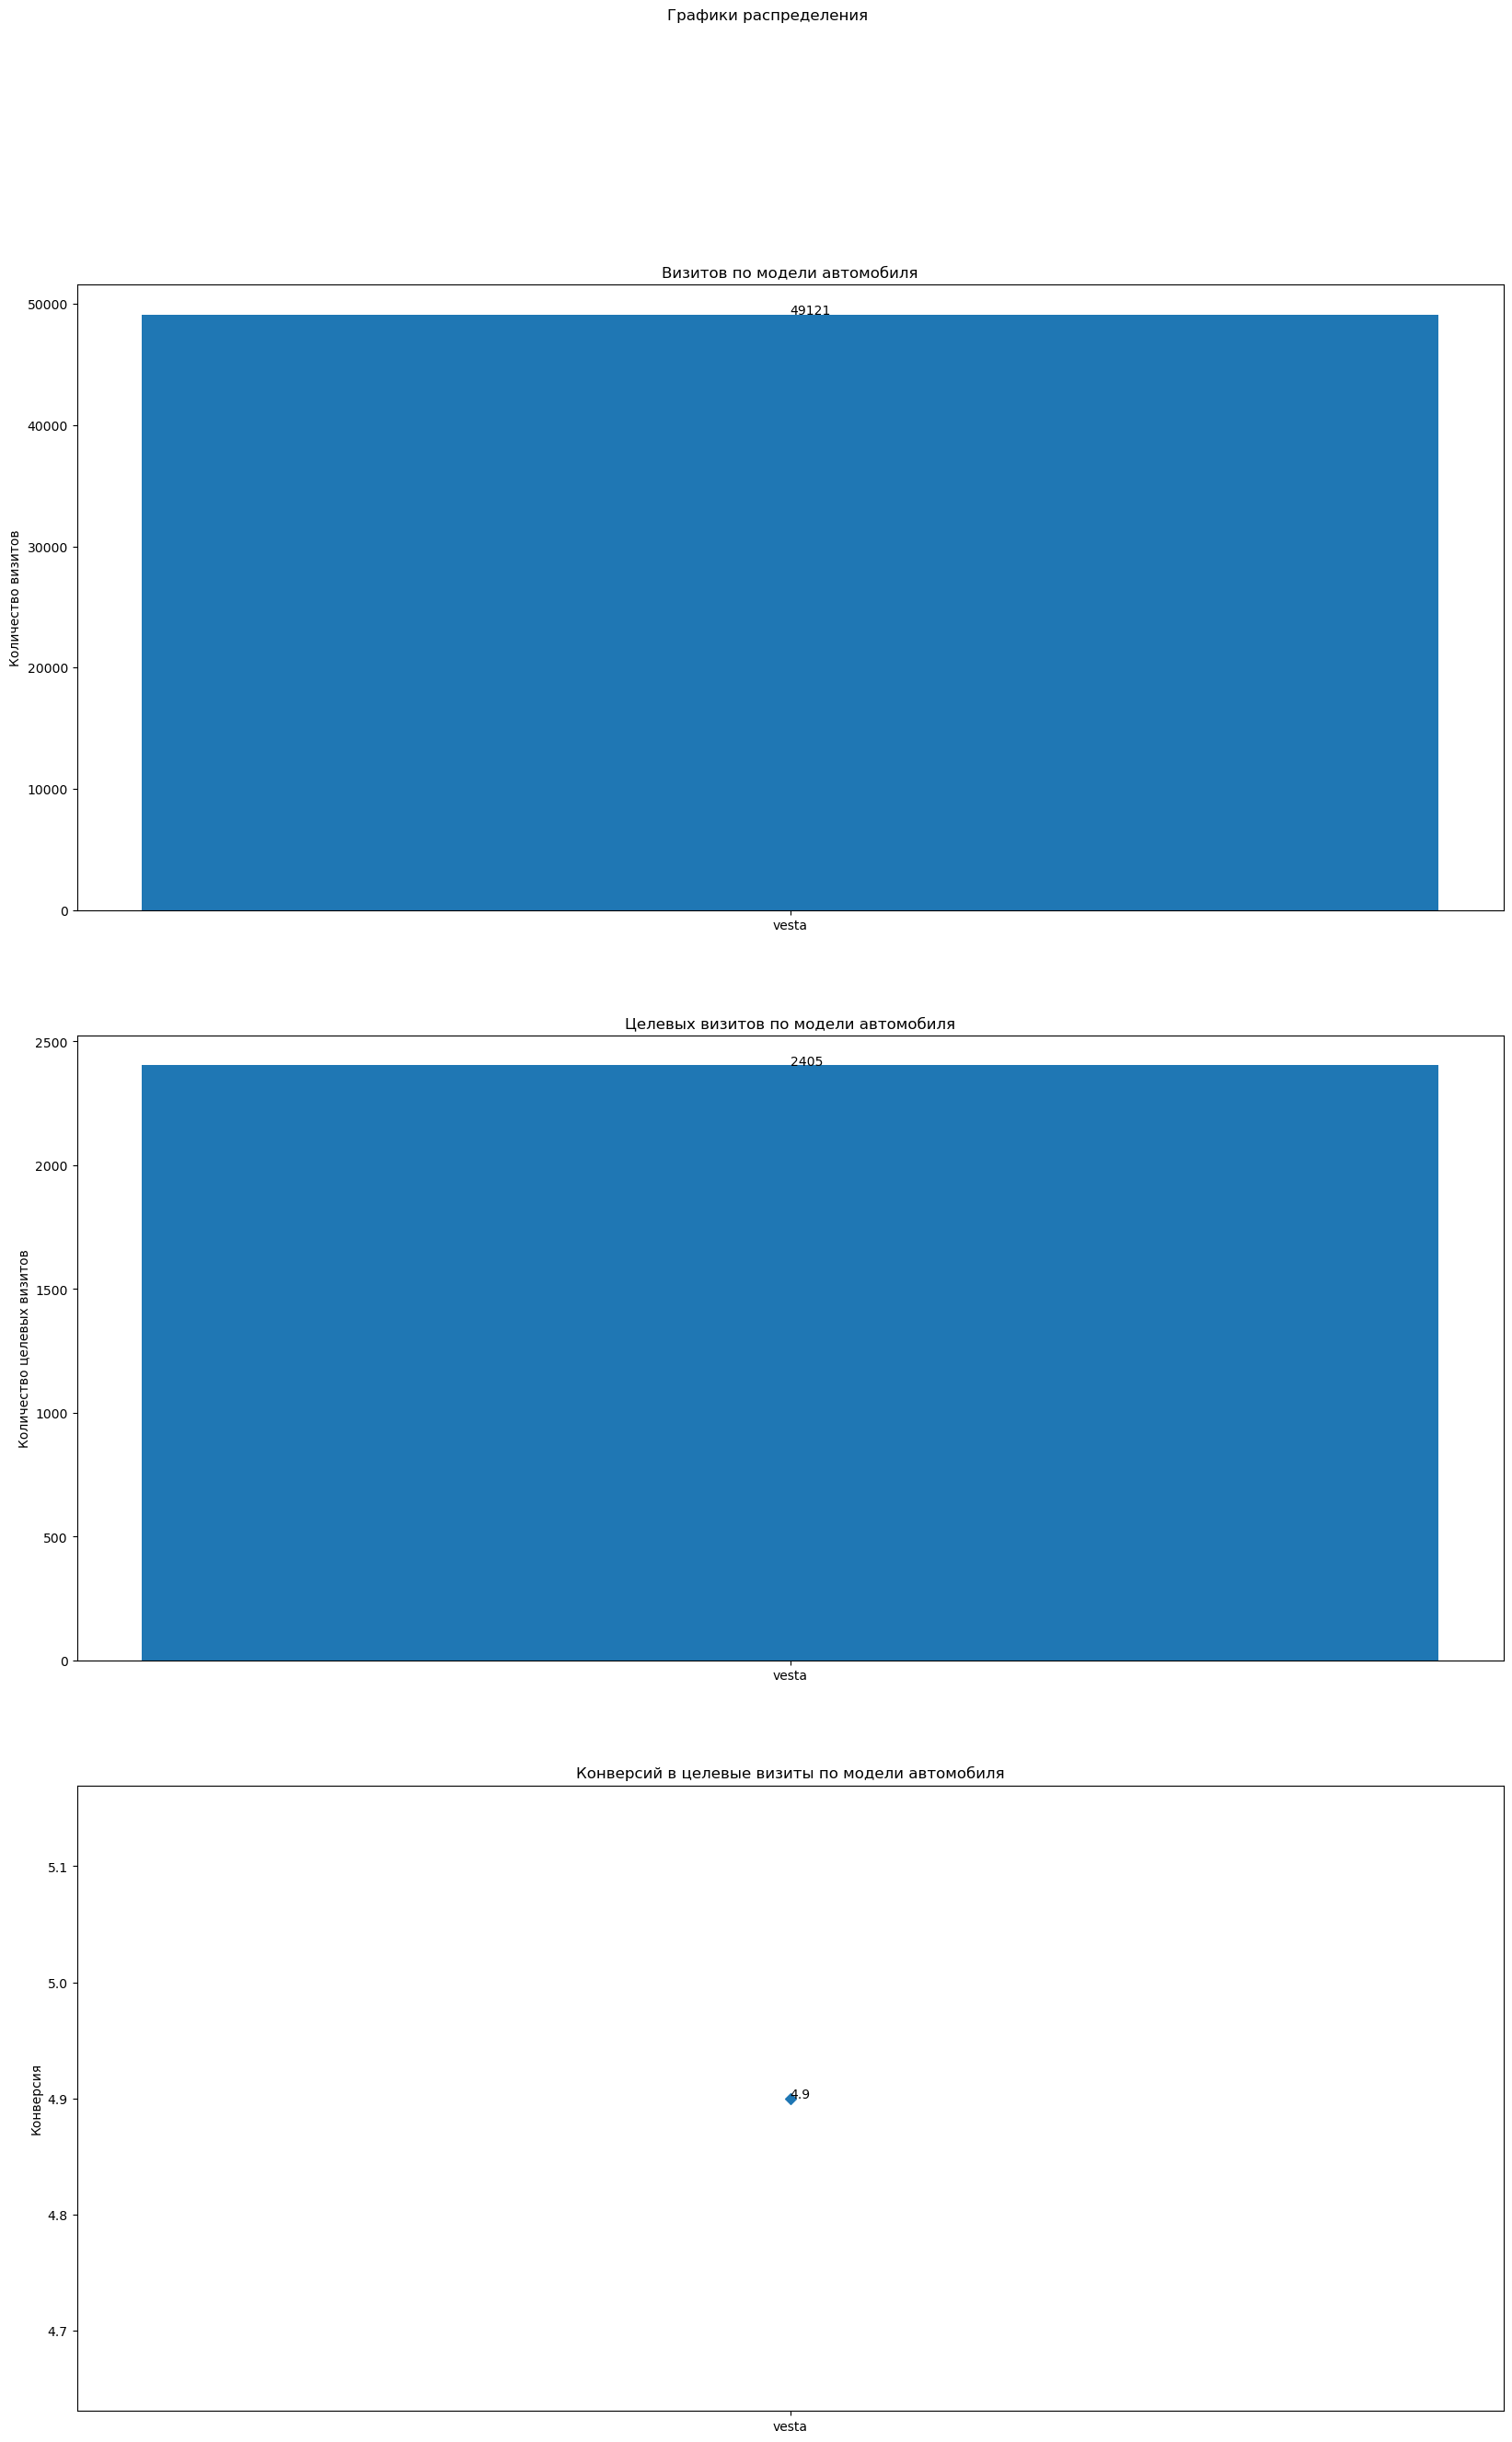

In [91]:
manufacturer_and_model('lada-vaz')

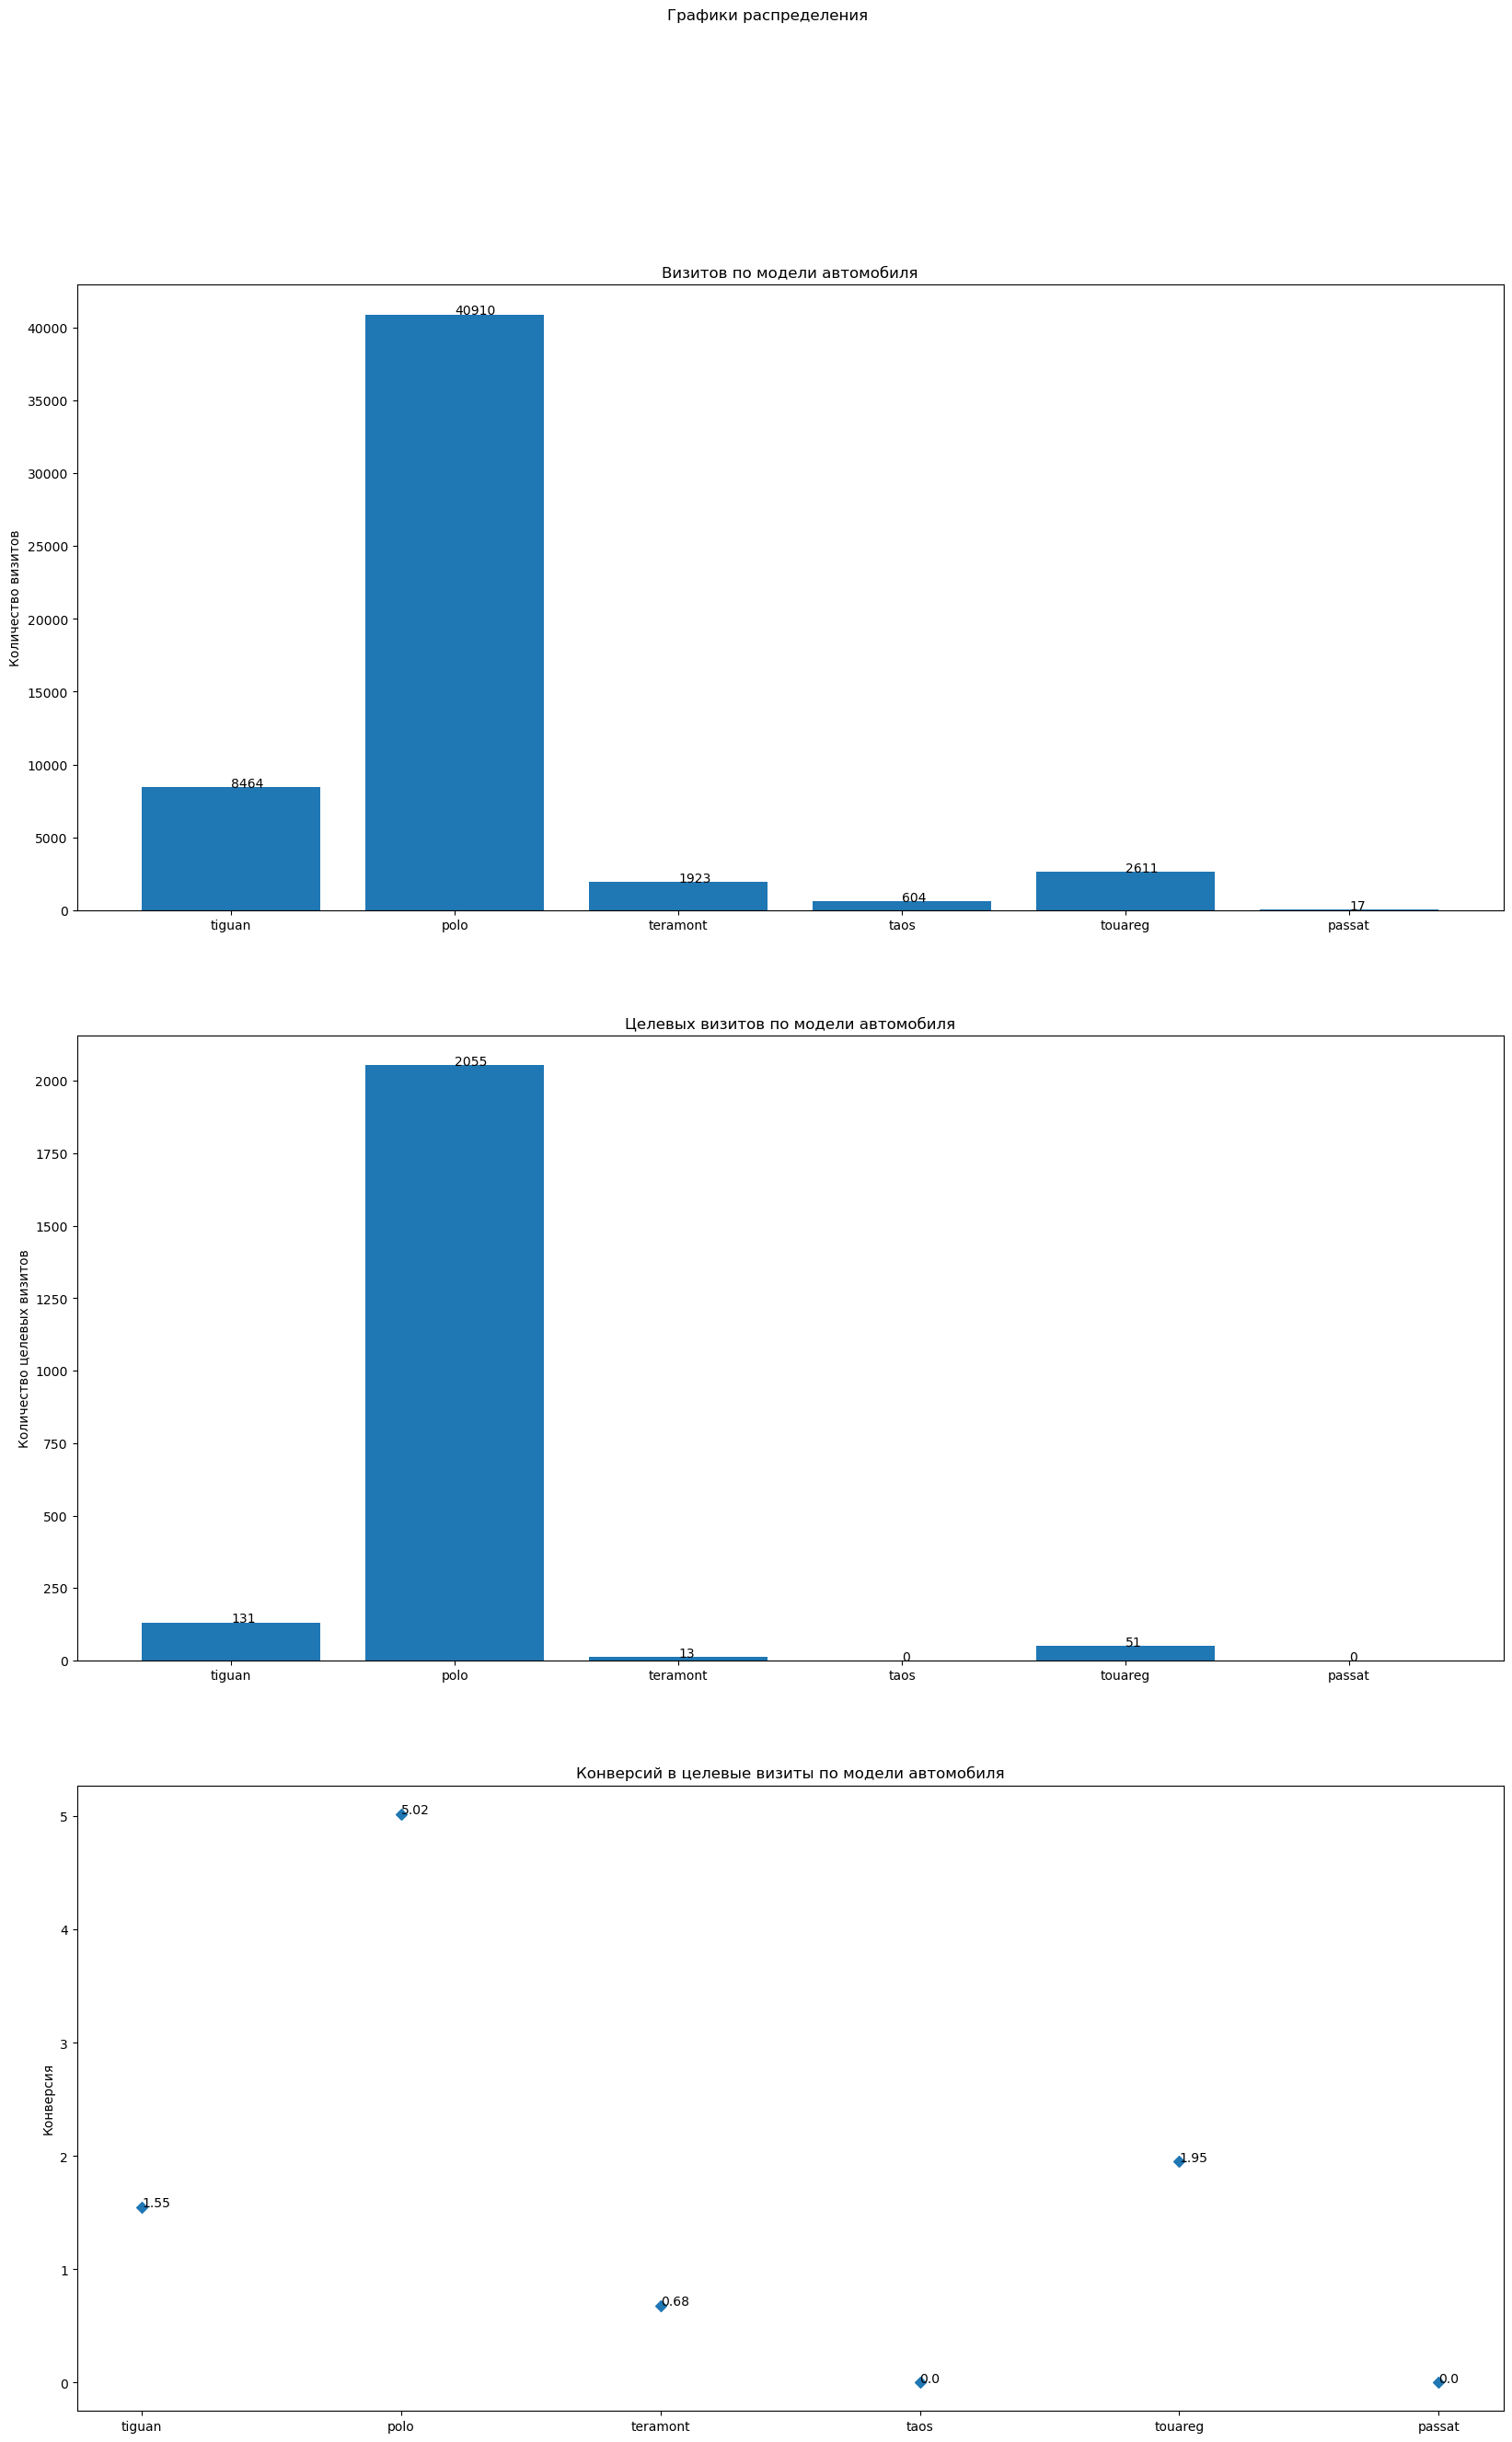

In [92]:
manufacturer_and_model('volkswagen')

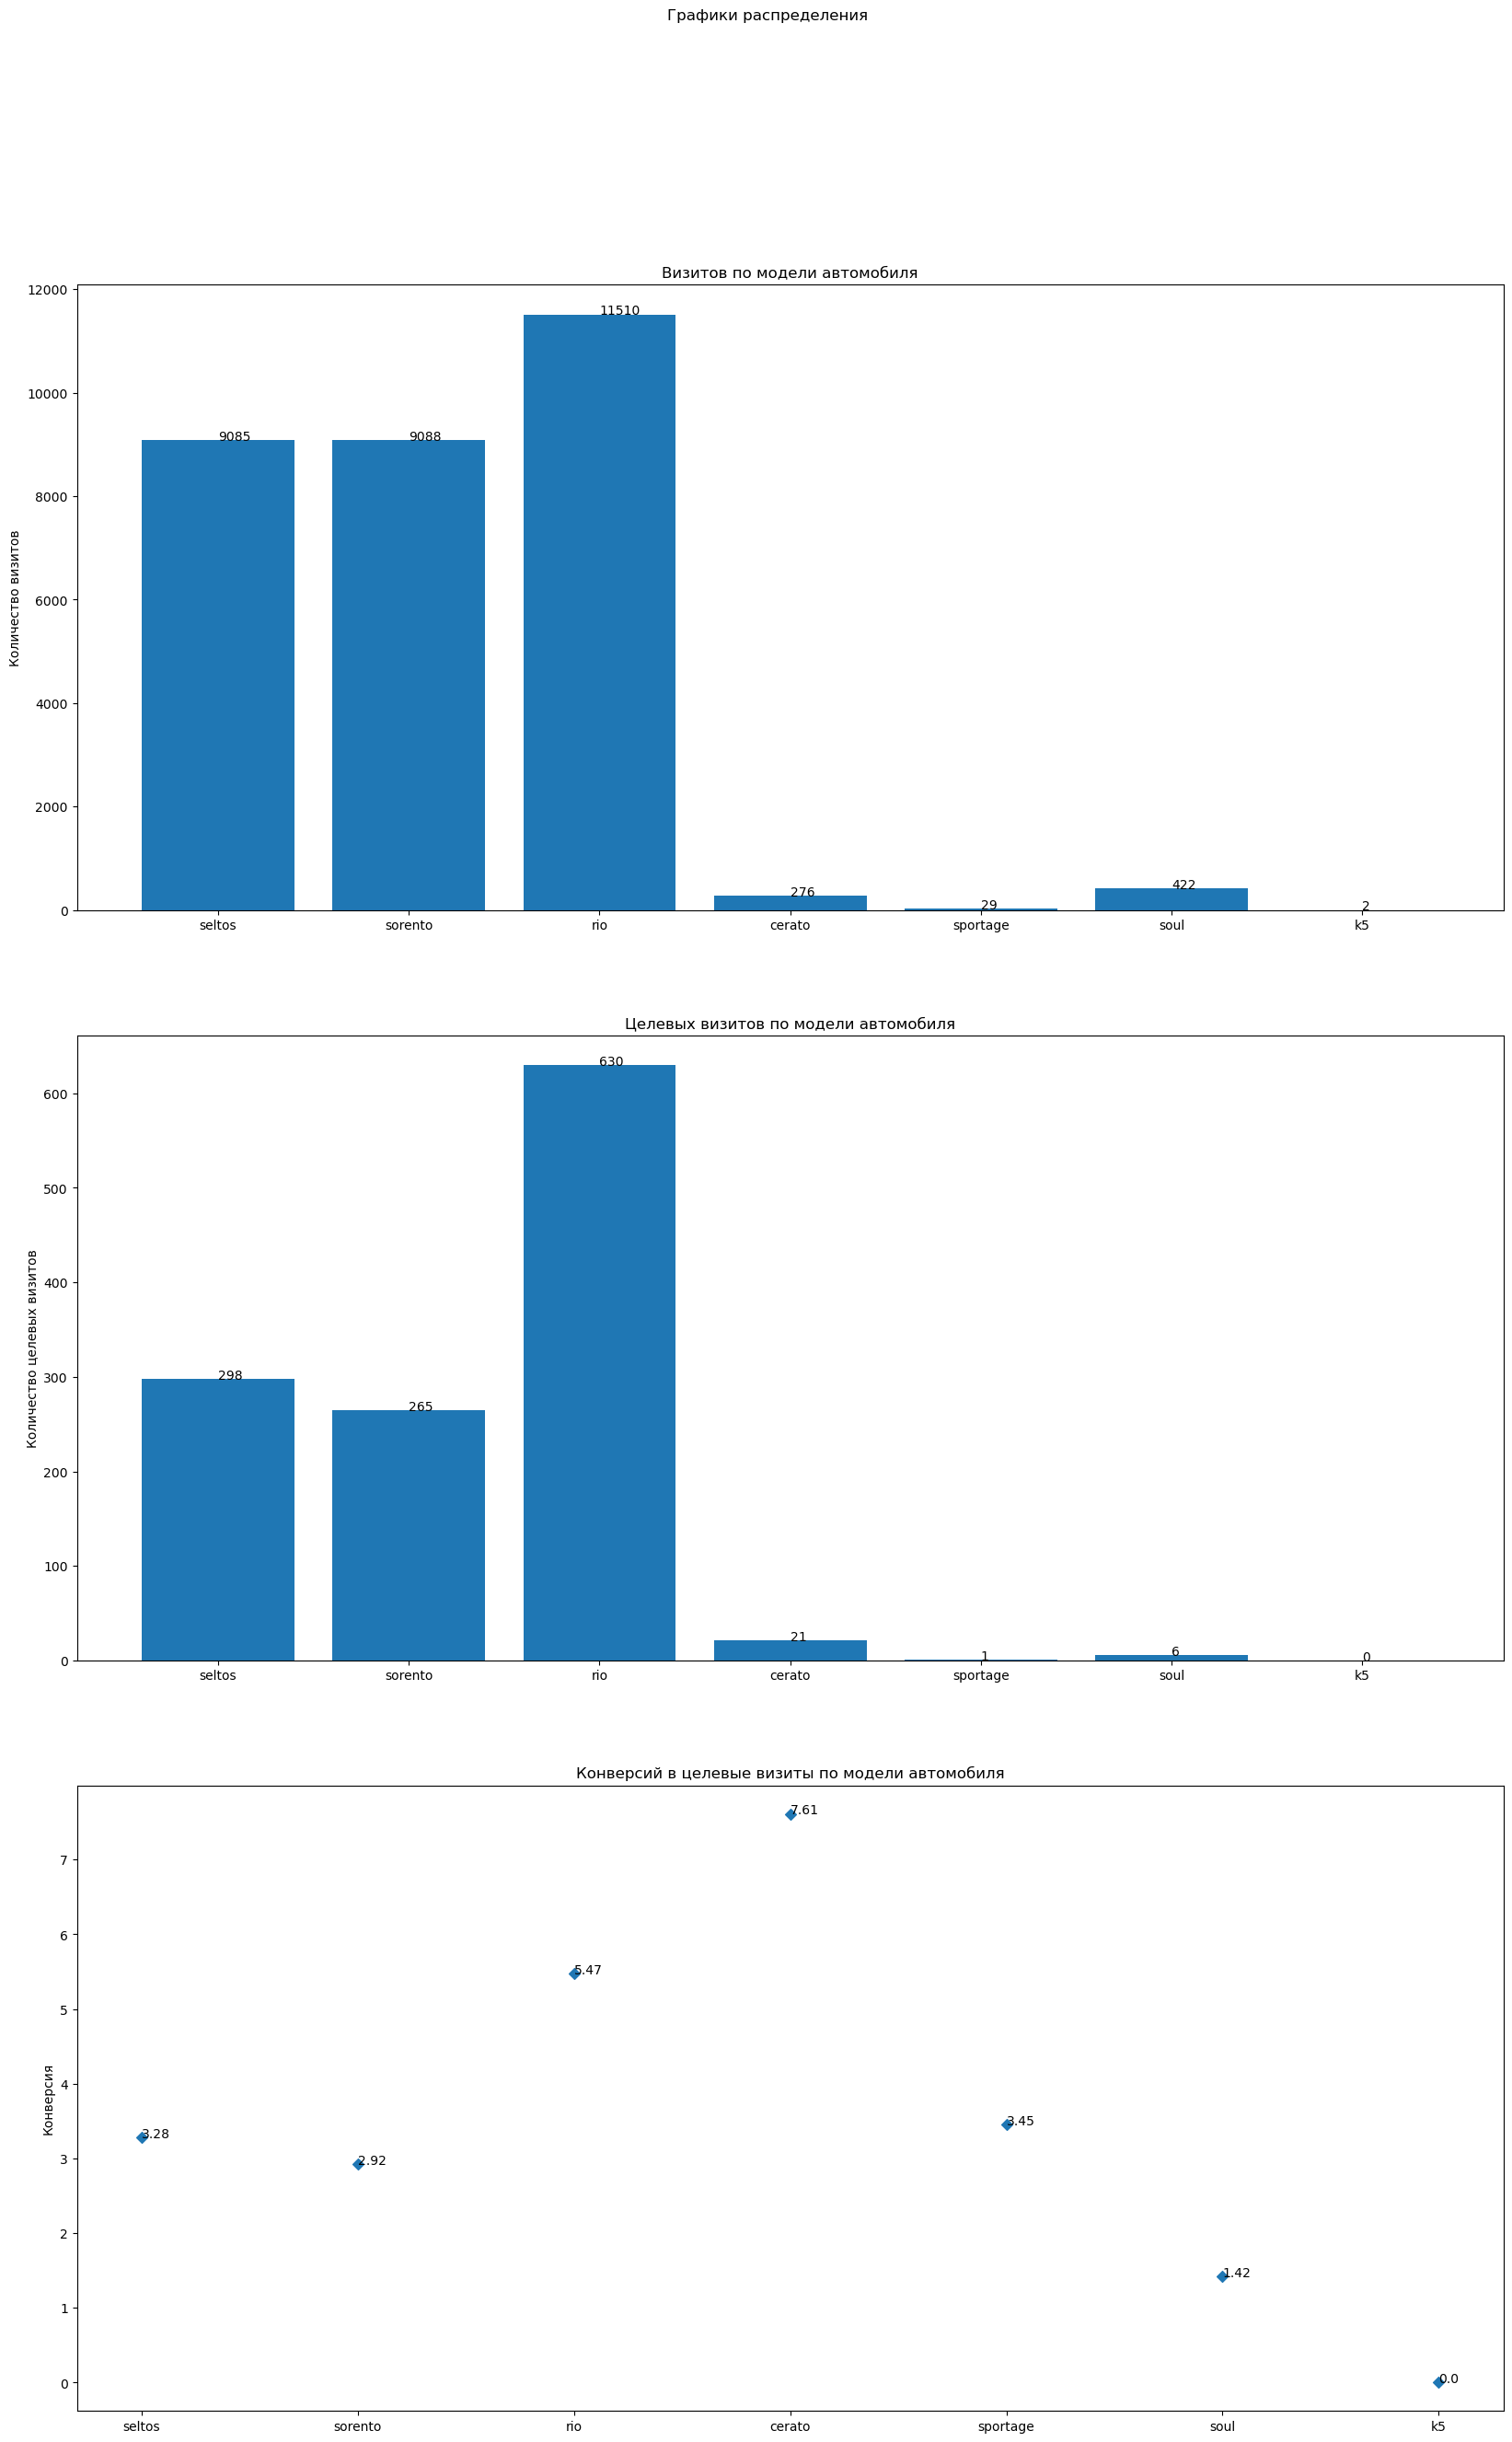

In [93]:
manufacturer_and_model('kia')

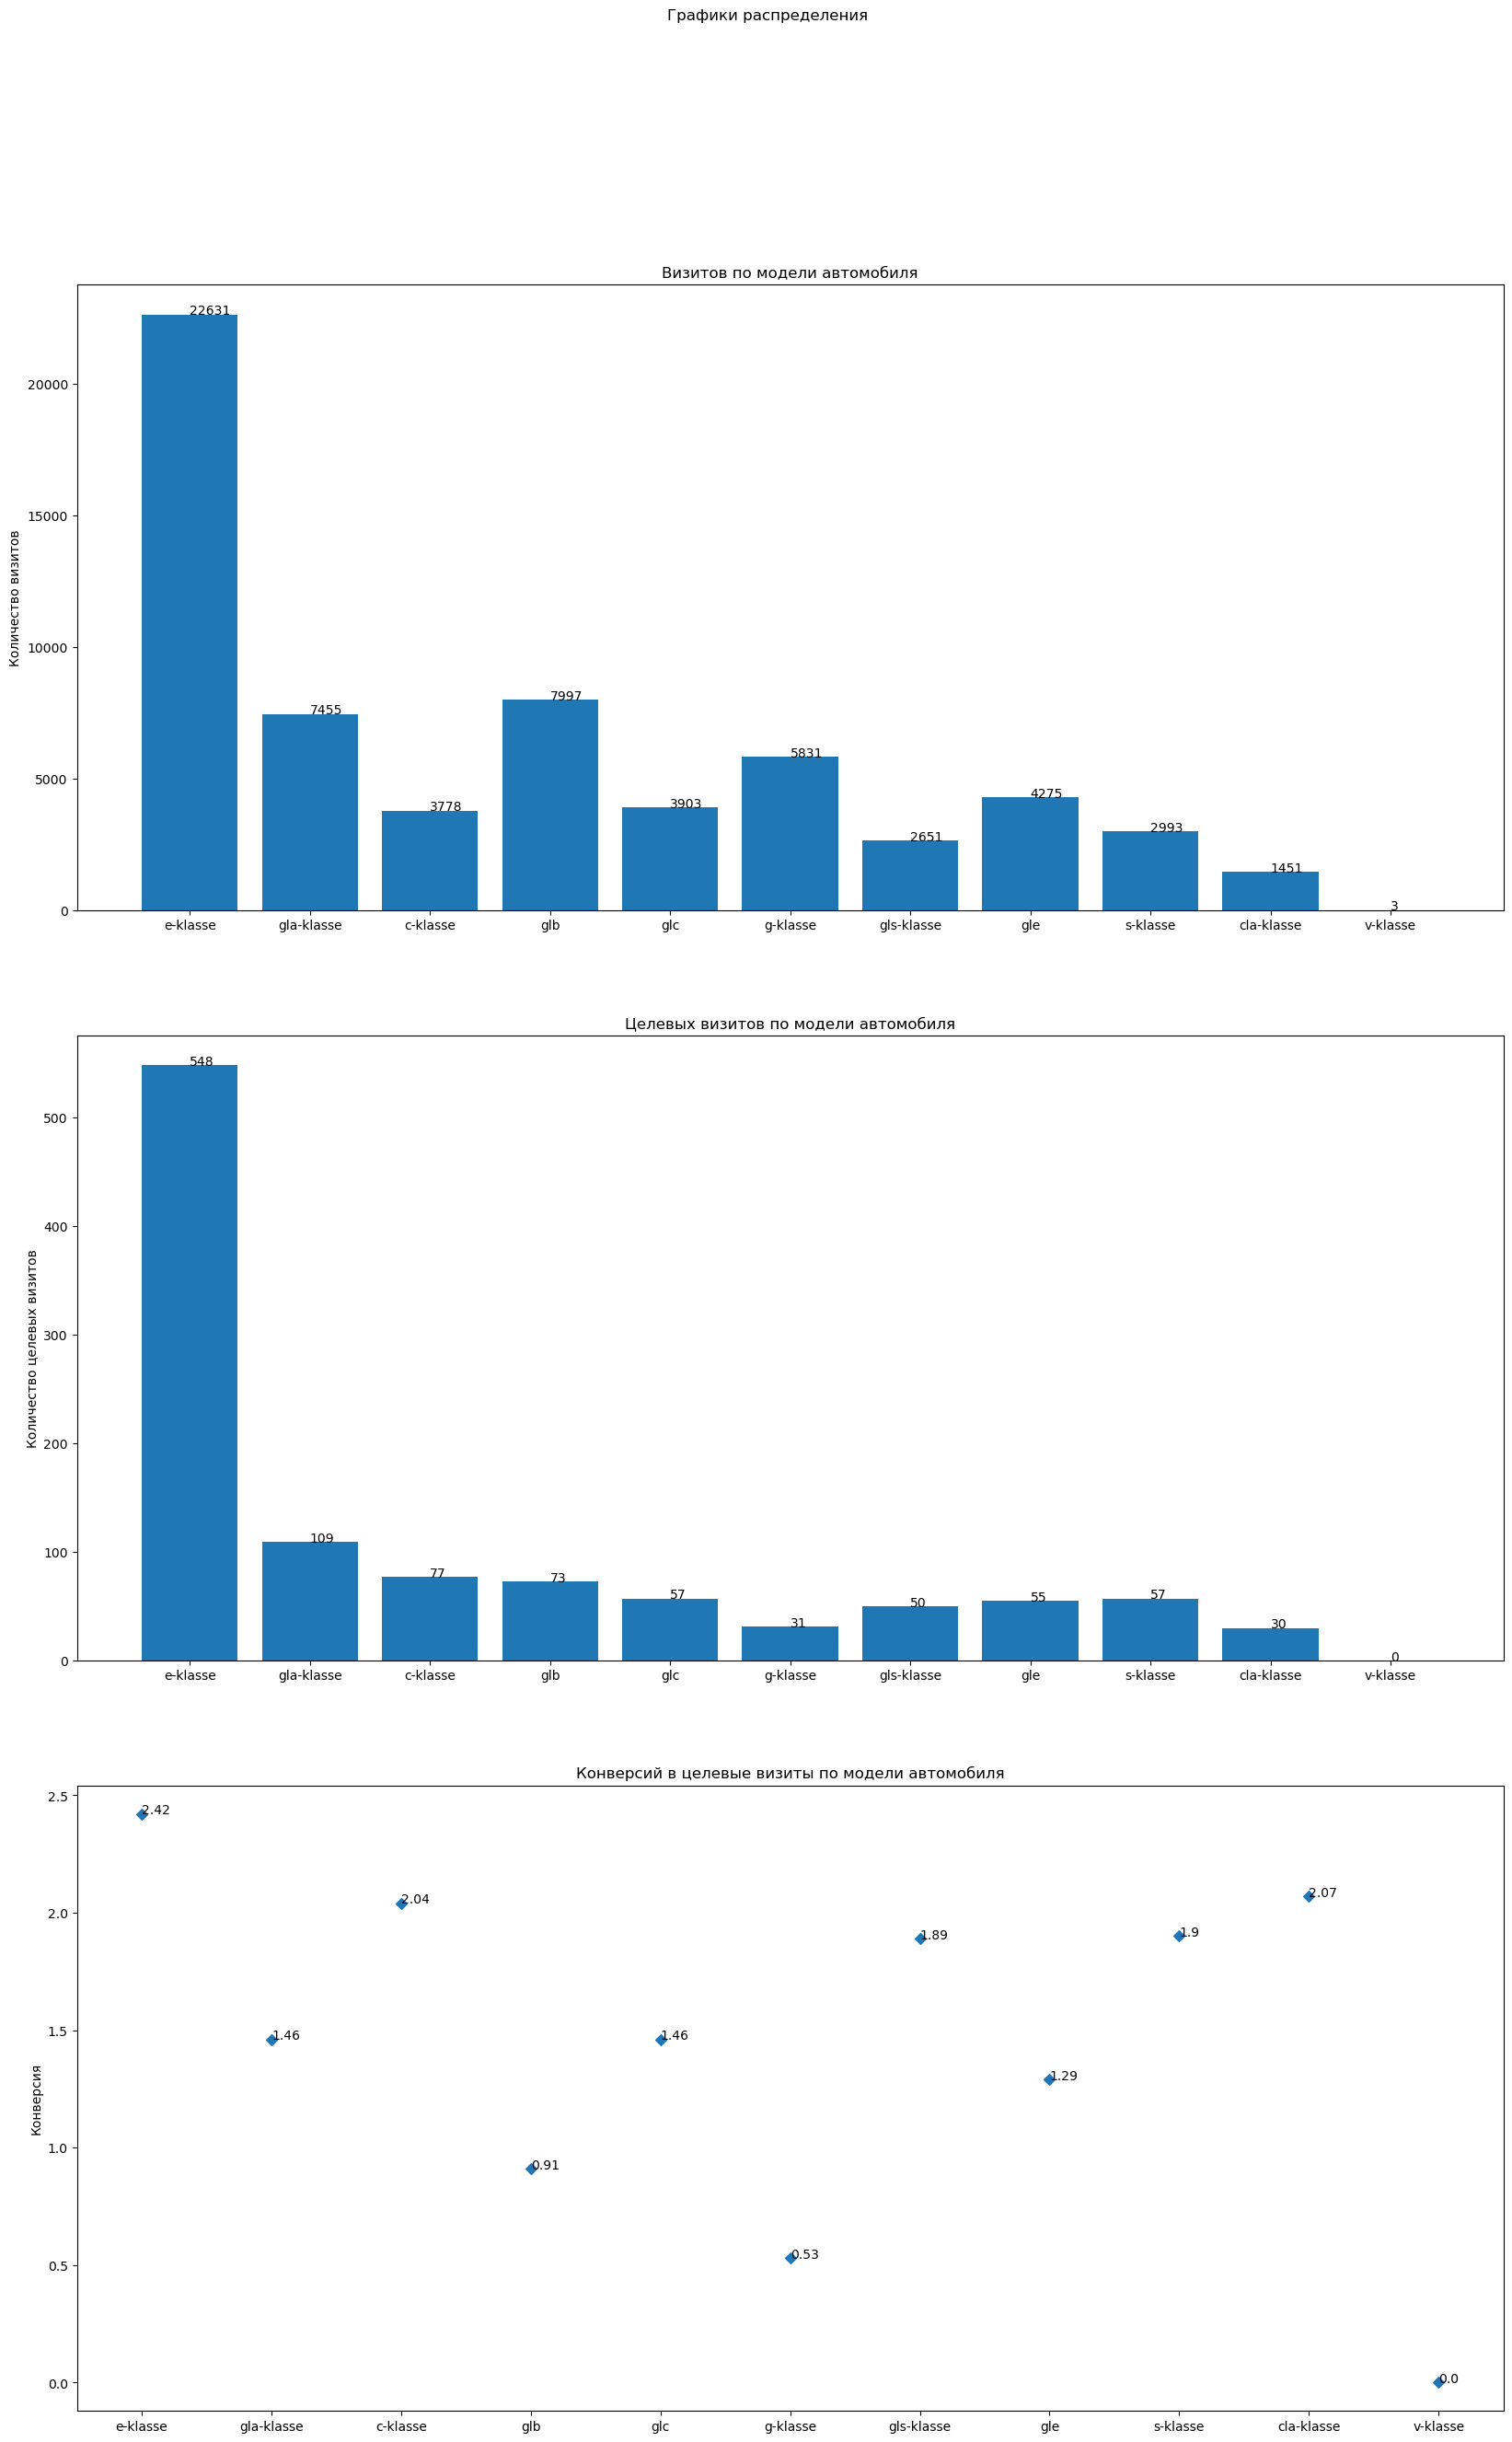

In [94]:
manufacturer_and_model('mercedes-benz')

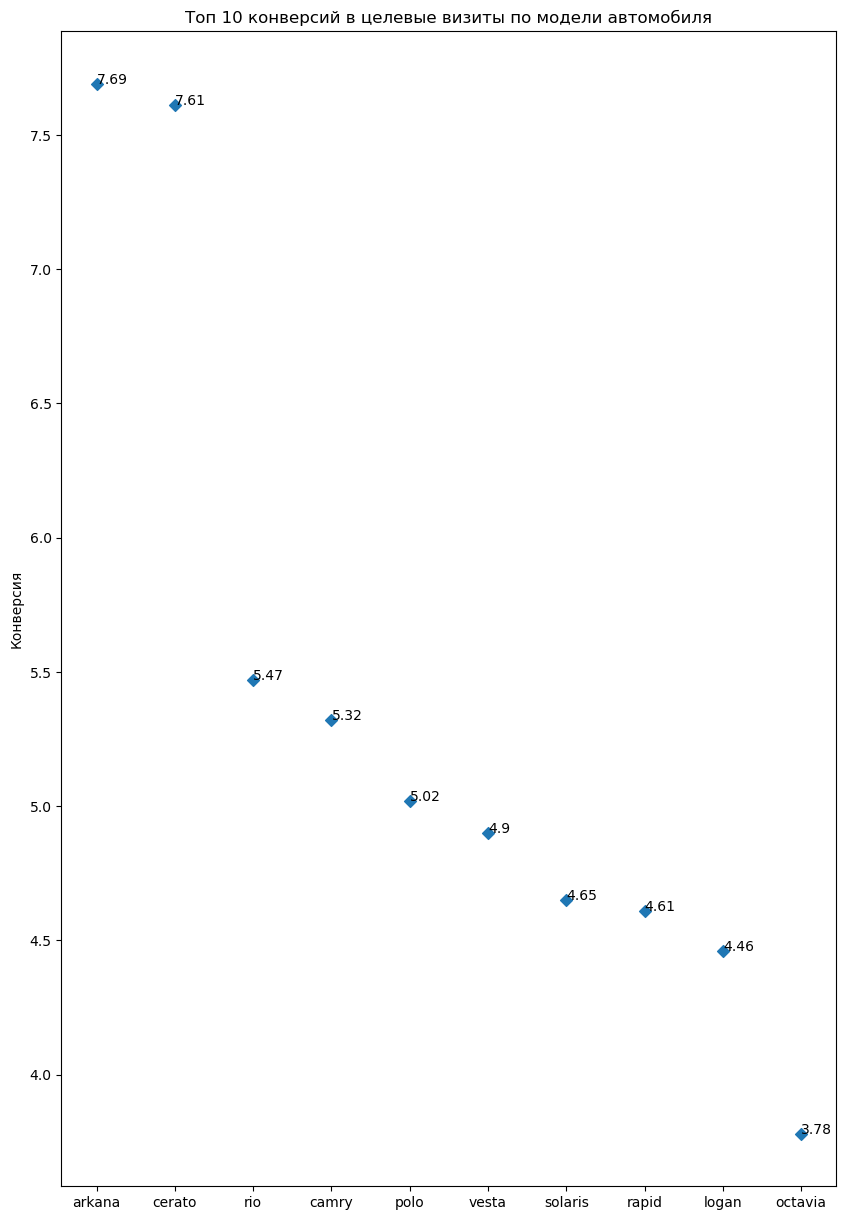

In [95]:
model = stats_5_clean.model.unique().tolist()

model_CR = []
for i in model:
    CR = 100 * (len(stats_5_clean[(stats_5_clean['model'] == i) & (stats_5_clean['CR'] == 1)]) /
                len(stats_5_clean[stats_5_clean['model'] == i]))
    CR = round(CR, 2)
    model_CR.append(CR)
    
series = {
        'model' : pd.Series(model),
        'CR' : pd.Series(model_CR),
         }
    
model_cr = pd.DataFrame(series)
model_cr = model_cr.sort_values(by = ['CR'], ascending = False).head(10)
    
plt.figure(figsize = (10, 15))       
plt.scatter(model_cr.model, model_cr.CR, marker = 'D')
        
for i in range(len(model_cr)):
    plt.annotate(model_cr.iloc[i, 1], (model_cr.iloc[i, 0], model_cr.iloc[i, 1]))
plt.ylabel('Конверсия')
plt.title('Топ 10 конверсий в целевые визиты по модели автомобиля')
plt.show()

4. **Вывод:** "Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?"

Согласно представленным графикам распределения можно сделать следующие выводы:

1) Наиболее популярными являются следующие 5 марок автомобилей:
 - `skoda` - 3643 целевых визита с конверсией 3,77%;
 - `lada-vaz` - 2405 целевых визита с конверсией 4,9% (самая высокая конверсия среди всех представленных марок);
 - `volkswagen` - 2250 целевых визита с конверсией 4,13% (3-я по величине конверсия среди всех представленных марок);
 - `kia` - 1221 целевых визита с конверсией 4,01%;
 - `mercedes-benz` - 1087 целевых визита с конверсией 1,73%. 
 
2) Среди марки `skoda` наиболее популярным является автомобиль модели `rapid` с 2613 целевыми визитами и конверсией 4,61%

3) Среди марки `lada-vaz` наиболее популярным является автомобиль модели `vesta` с 2405 целевыми визитами и конверсией 4,9%;

4) Среди марки `volkswagen` наиболее популярным является автомобиль модели `polo` с 2055 целевыми визитами и конверсией 5,02%;

5) Среди марки `kia` наиболее популярным является автомобиль модели `rio` с 630 целевыми визитами и конверсией 5.47%;

6) Среди марки `mercedes-benz` наиболее популярным является автомобиль модели `e-klasse` с 548 целевыми визитами и конверсией 2.42%;

7) Наибольшая конверсия в целевые визиты отмечается у следующих автомобилей:
- марка `renault` модель `arkana` c конверсией 7,69%;
- марка `kia` модель `cerato` c конверсией 7,61%.

 ### 4.6 Вопрос продуктовой команды "Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?"

1. Сформируем группу данных.

In [96]:
stats_6 = df_clean.groupby([
    'month',
    'day_of_year',
    'session_id',
    'utm_source_short',
    'utm_source',
    'utm_medium_short',
    'device_category_short',
    'geo_city_short'
], as_index = False).agg({'CR' : 'max'})

stats_6

,month,day_of_year,session_id,utm_source_short,utm_source,utm_medium_short,device_category_short,geo_city_short,CR
0,5,139,1004760235621272443.1621412730.1621412730,other,kjsLglQLzykiRbcDiGcD,organic_traffic,desktop,other,0
1,5,139,1004760235621272443.1621415798.1621415798,other,kjsLglQLzykiRbcDiGcD,organic_traffic,desktop,other,0
2,5,139,1034410142917290246.1621453035.1621453035,other,fDLlAcSmythWSCVMvqvL,organic_traffic,mobile,other,0
3,5,139,107779366941171287.1621433942.1621433942,other,fDLlAcSmythWSCVMvqvL,organic_traffic,desktop,other,0
4,5,139,1086882617365939108.1621410775.1621410775,other,fDLlAcSmythWSCVMvqvL,organic_traffic,mobile,other,0
...,...,...,...,...,...,...,...,...,...
1732261,12,365,995521876951260235.1640979566.1640979566,other,fgymSoTvjKPEgaIJqsiH,paid_traffic,desktop,presence_city,0
1732262,12,365,995673832894191865.1640978684.1640978684,other,fgymSoTvjKPEgaIJqsiH,paid_traffic,desktop,presence_city,0
1732263,12,365,997086314493818413.1640951473.1640951473,other,ZpYIoDJMcFzVoPFsHGJL,paid_traffic,mobile,other,0
1732264,12,365,99873156802459656.1640937482.1640937482,other,ZpYIoDJMcFzVoPFsHGJL,paid_traffic,mobile,other,0


2. Визуализируем полученную группу.

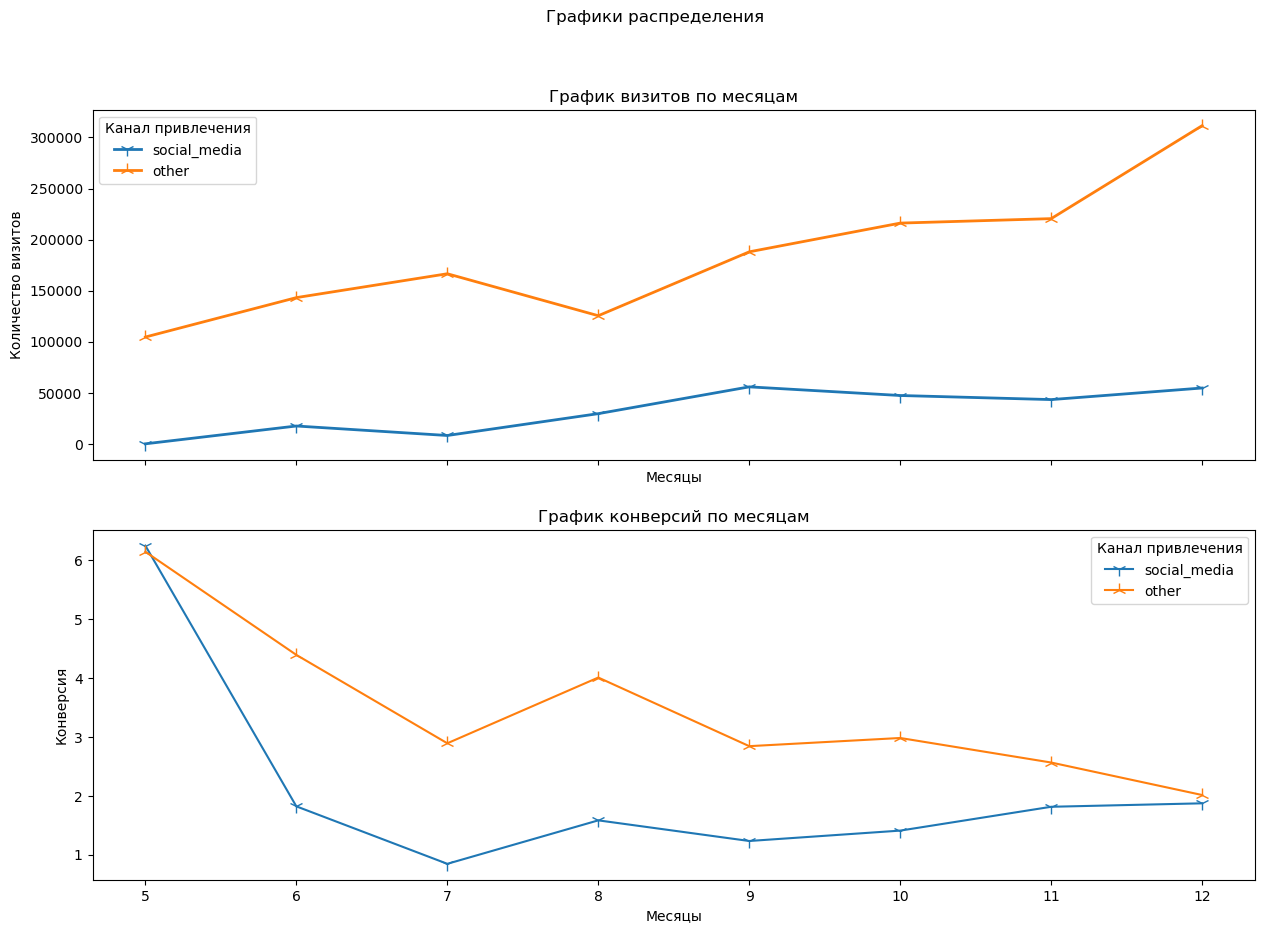

In [97]:
plot_for_2_cat_and_CR(
    stat = stats_6,
    cat1 = 'social_media',
    cat2 = 'other',
    title1 = 'График визитов по месяцам',
    title2 = 'График конверсий по месяцам',
    xlabel = 'Месяцы',
    ylabel1 = 'Количество визитов',
    ylabel2 = 'Конверсия',
    legend = 'Канал привлечения'
)

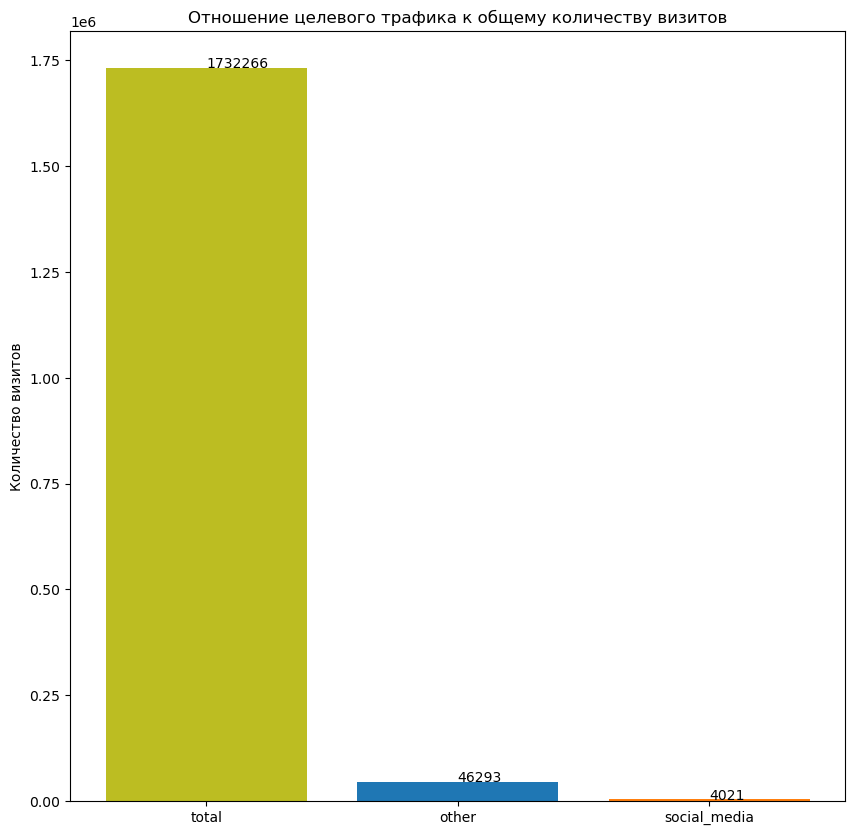

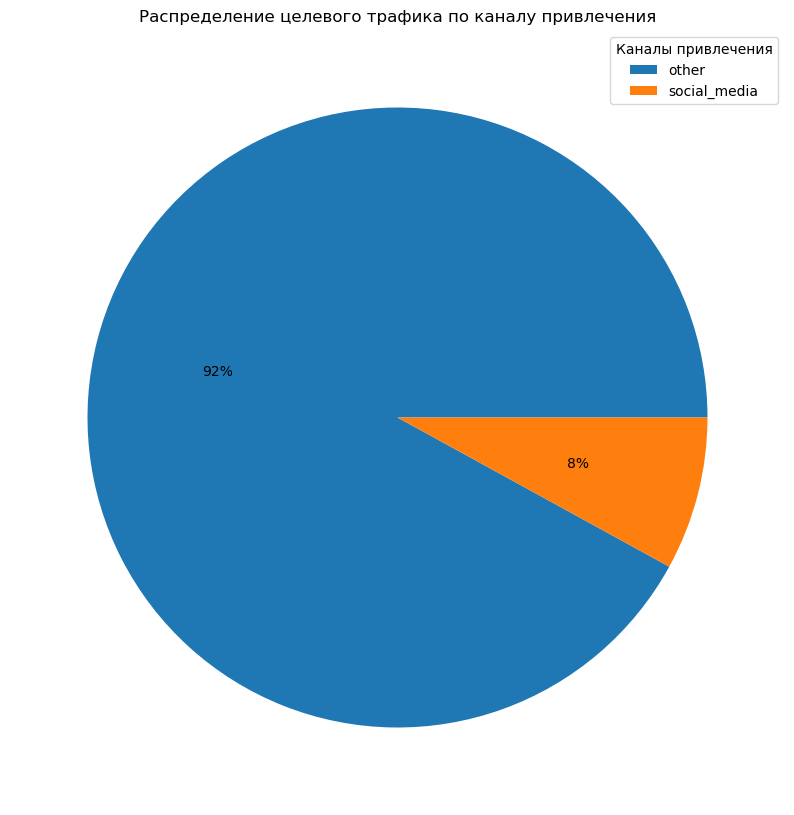

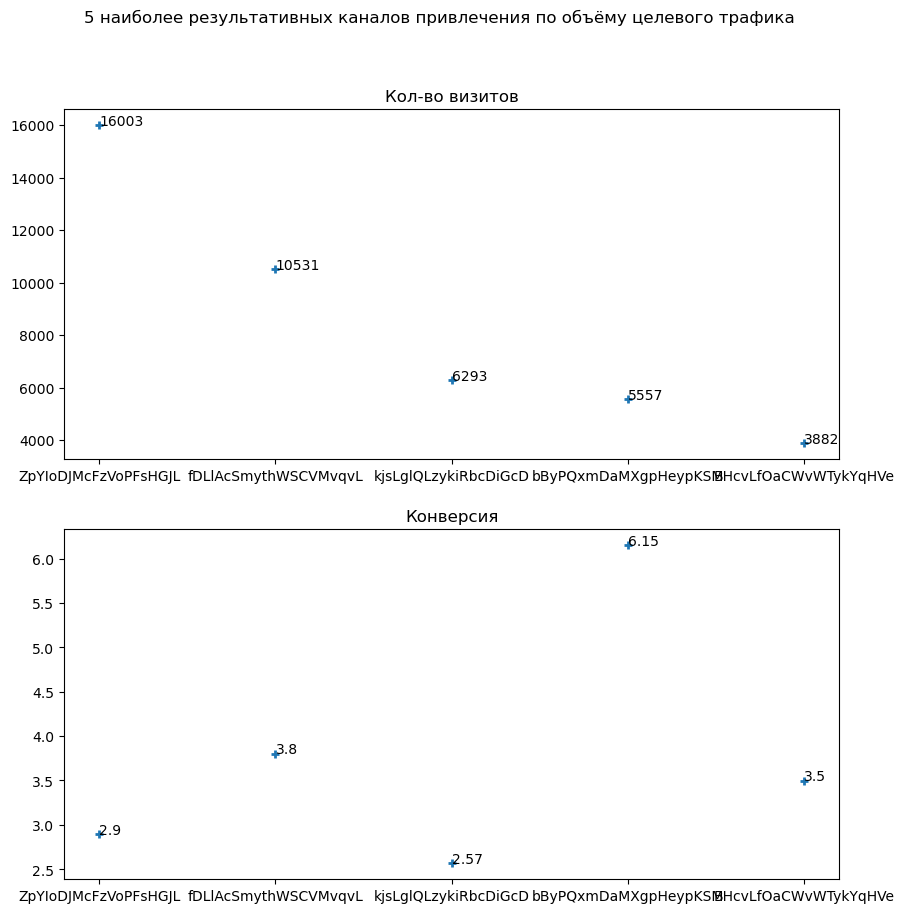

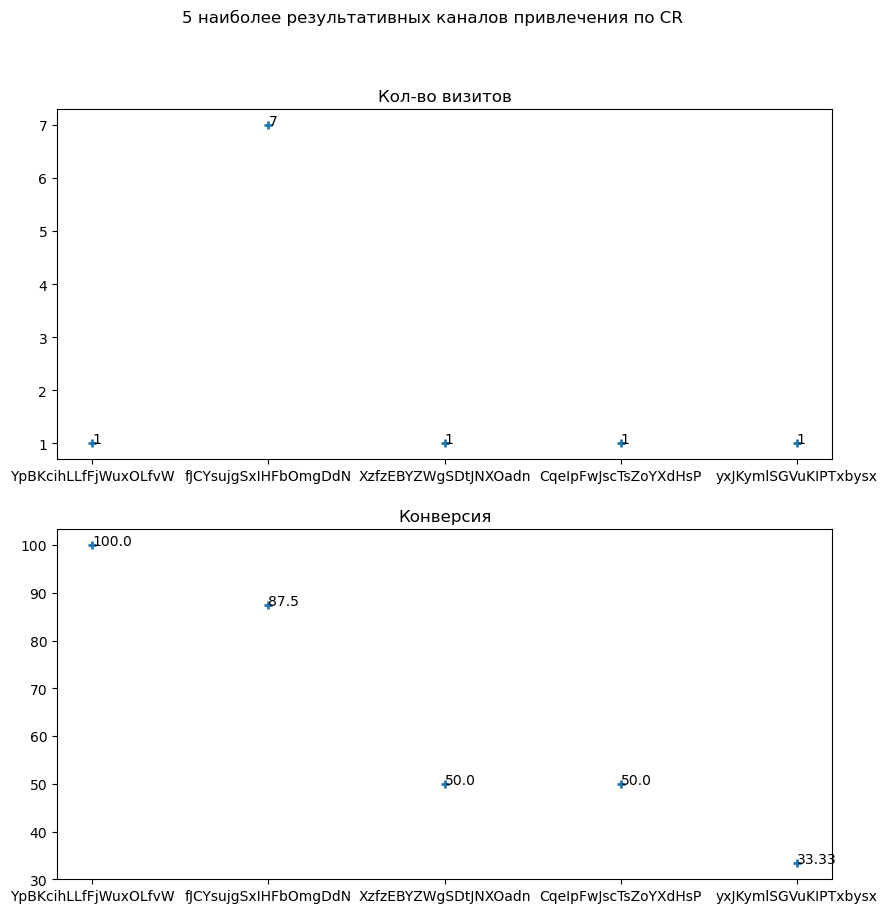

In [98]:
pie_and_scatter(
    stat = stats_6,
    main_cat = 'utm_source',
    main_cat_short = 'utm_source_short',
    cat1 = 'other',
    cat2 = 'social_media',
    color1 = 'C0',
    color2 = 'C1',
    pie_legend = 'Каналы привлечения',
    title1 = 'Распределение целевого трафика по каналу привлечения',
    title2 = '5 наиболее результативных каналов привлечения по объёму целевого трафика',
    title3 = '5 наиболее результативных каналов привлечения по CR'
)

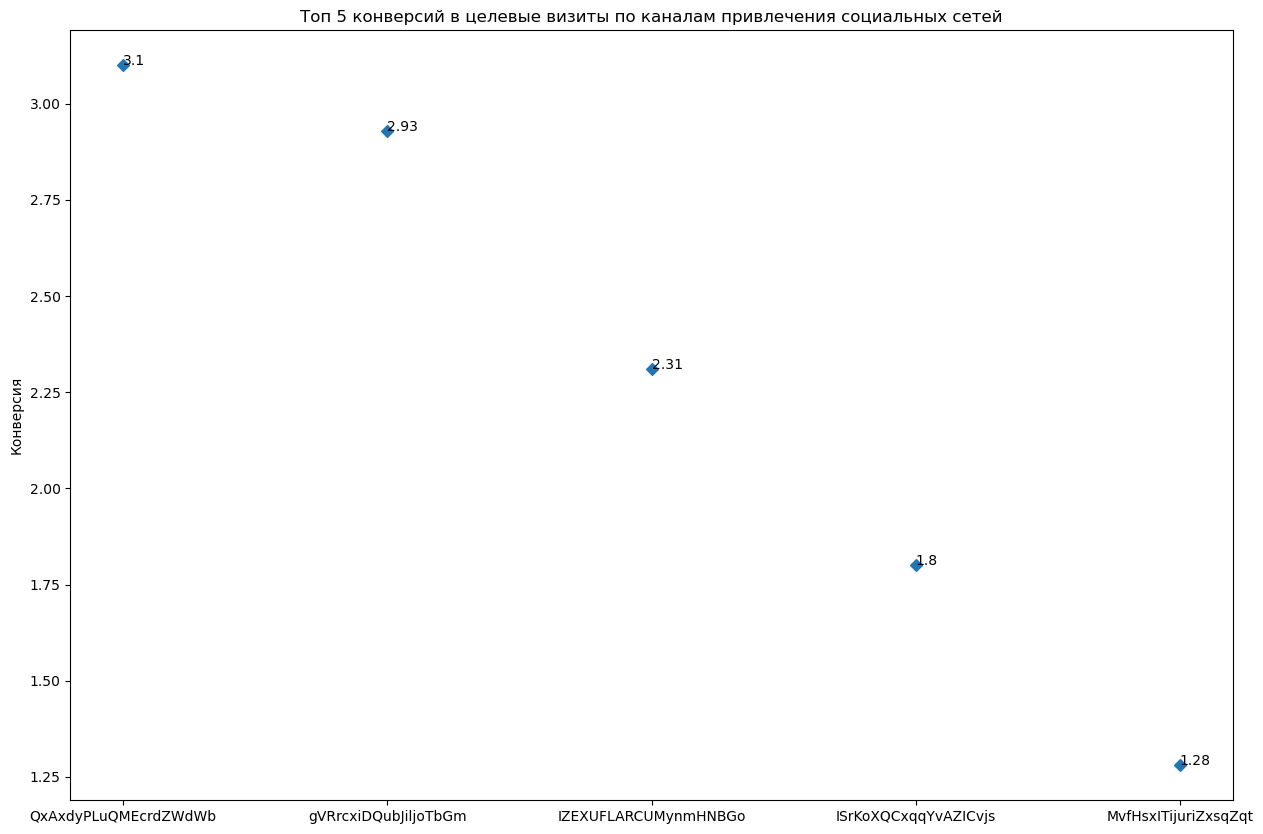

In [99]:
source = stats_6[stats_6['utm_source_short'] == 'social_media'].utm_source.unique().tolist()

source_CR = []
for i in source:
        CR = 100 * (len(stats_6[(stats_6['utm_source'] == i) & (stats_6['CR'] == 1)]) /
                    len(stats_6[stats_6['utm_source'] == i]))
        CR = round(CR, 2)
        source_CR.append(CR)
        
series = {
        'source' : pd.Series(source),
        'CR' : pd.Series(source_CR),
         }
    
source_cr = pd.DataFrame(series)
source_cr = source_cr.sort_values(by = ['CR'], ascending = False).head()
    
plt.figure(figsize = (15, 10))       
plt.scatter(source_cr.source, source_cr.CR, marker = 'D')
        
for i in range(len(source_cr)):
    plt.annotate(source_cr.iloc[i, 1], (source_cr.iloc[i, 0], source_cr.iloc[i, 1]))
plt.ylabel('Конверсия')
plt.title('Топ 5 конверсий в целевые визиты по каналам привлечения социальных сетей')
plt.show()

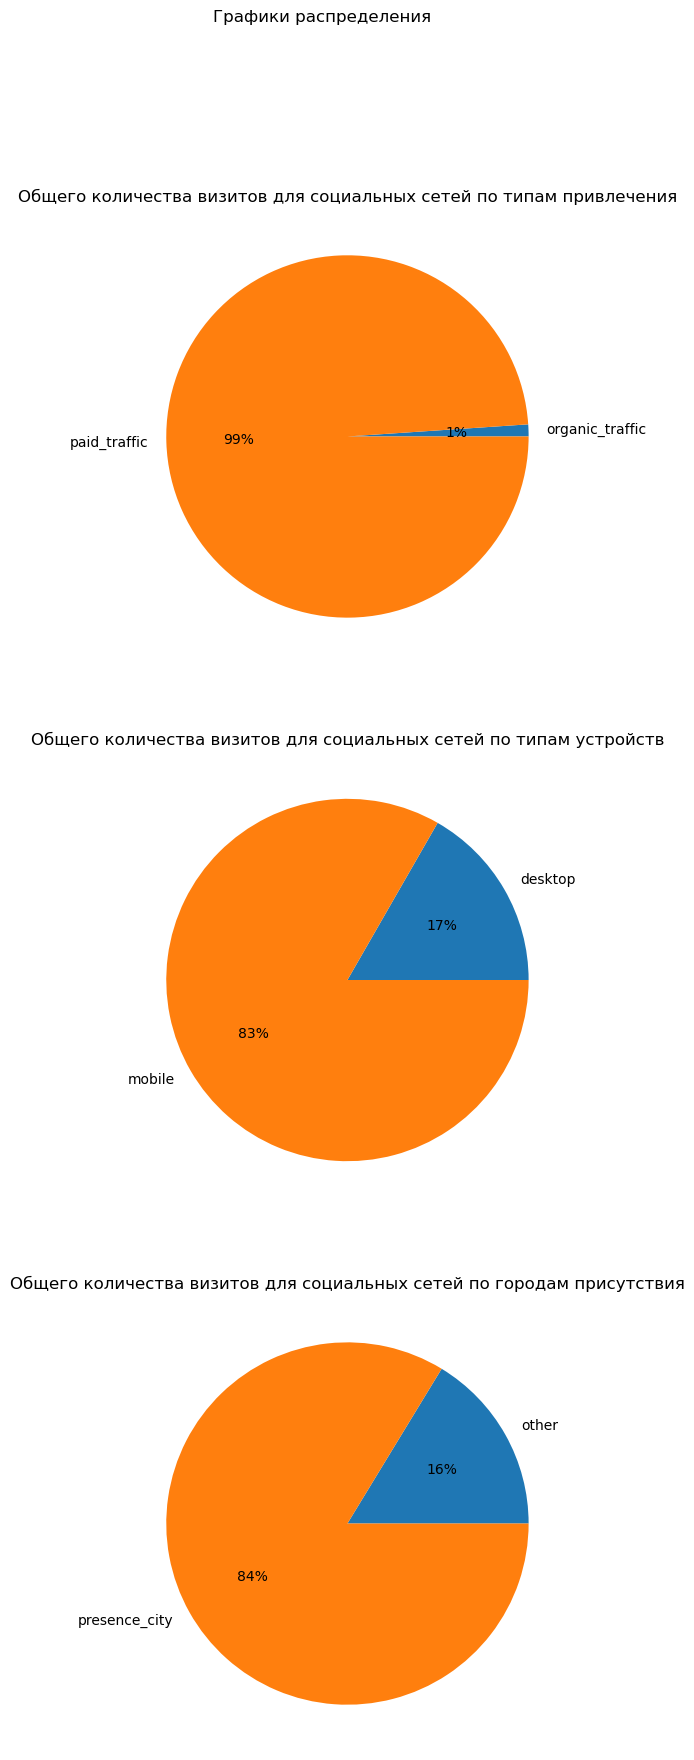

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 20), sharex = True)

utm_medium_counts = []
device_category_counts = []
geo_city_counts = []

utm_medium = stats_6.utm_medium_short.unique().tolist()
device_category = stats_6.device_category_short.unique().tolist()
geo_city = stats_6.geo_city_short.unique().tolist()

for i in utm_medium:
    total_counts = len(stats_6[(stats_6['utm_medium_short'] == i) & (stats_6['utm_source_short'] == 'social_media')])
    utm_medium_counts.append(total_counts)
    
for i in device_category:
    total_counts = len(stats_6[(stats_6['device_category_short'] == i) & (stats_6['utm_source_short'] == 'social_media')])
    device_category_counts.append(total_counts)

for i in geo_city:
    total_counts = len(stats_6[(stats_6['geo_city_short'] == i) & (stats_6['utm_source_short'] == 'social_media')])
    geo_city_counts.append(total_counts)    
    
ax1.pie(utm_medium_counts,
        labels = utm_medium,
        autopct = '%1.0f%%')
ax1.set_title('Общего количества визитов для социальных сетей по типам привлечения')

ax2.pie(device_category_counts,
        labels = device_category,
        autopct = '%1.0f%%')
ax2.set_title('Общего количества визитов для социальных сетей по типам устройств')

ax3.pie(geo_city_counts,
        labels = geo_city,
        autopct = '%1.0f%%')
ax3.set_title('Общего количества визитов для социальных сетей по городам присутствия')

fig.suptitle('Графики распределения');

''

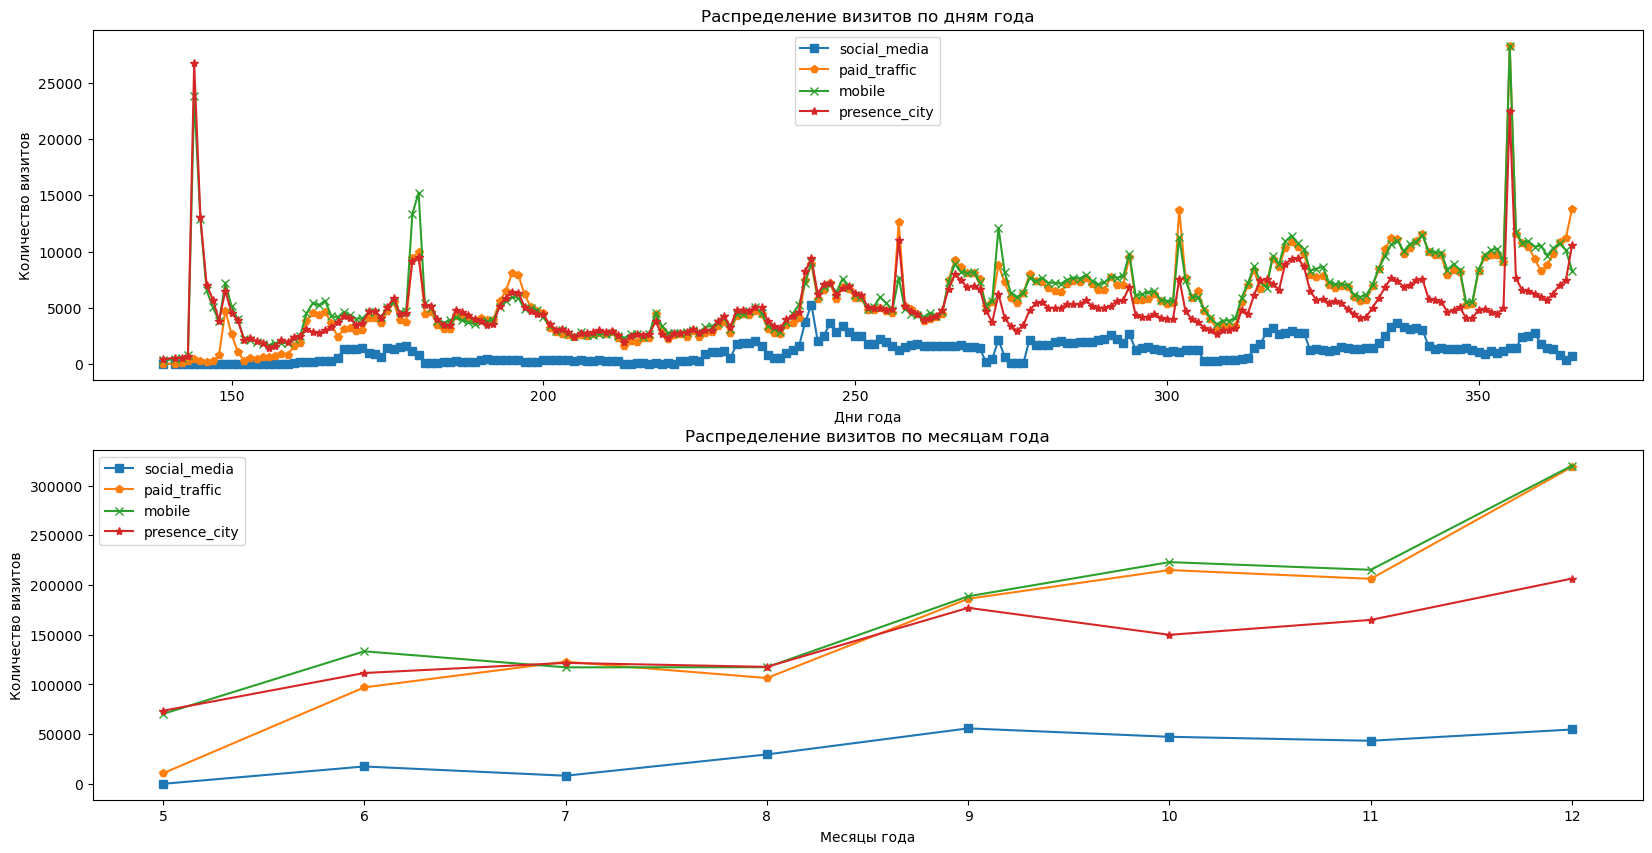

In [109]:
day_of_year = stats_6.day_of_year.unique().tolist()
months = stats_6.month.unique().tolist()

source_day_counts = []
medium_day_counts = []
device_day_counts = []
city_day_counts = []

source_month_counts = []
medium_month_counts = []
device_month_counts = []
city_month_counts = []

for day in day_of_year:
        counts1 = len(stats_6[(stats_6['day_of_year'] == day) & (stats_6['utm_medium_short'] == 'paid_traffic')])
        medium_day_counts.append(counts1)
           
        counts2 = len(stats_6[(stats_6['day_of_year'] == day) & (stats_6['device_category_short'] == 'mobile')])
        device_day_counts.append(counts2)
        
        counts3 = len(stats_6[(stats_6['day_of_year'] == day) & (stats_6['geo_city_short'] == 'presence_city')])
        city_day_counts.append(counts3)  
    
        counts4 = len(stats_6[(stats_6['day_of_year'] == day) & (stats_6['utm_source_short'] == 'social_media')])
        source_day_counts.append(counts4) 
        
for month in months:
        counts1 = len(stats_6[(stats_6['month'] == month) & (stats_6['utm_medium_short'] == 'paid_traffic')])
        medium_month_counts.append(counts1)
           
        counts2 = len(stats_6[(stats_6['month'] == month) & (stats_6['device_category_short'] == 'mobile')])
        device_month_counts.append(counts2)
        
        counts3 = len(stats_6[(stats_6['month'] == month) & (stats_6['geo_city_short'] == 'presence_city')])
        city_month_counts.append(counts3)  
    
        counts4 = len(stats_6[(stats_6['month'] == month) & (stats_6['utm_source_short'] == 'social_media')])
        source_month_counts.append(counts4)  

        
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 10), sharex = False)

color = ['C0', 'C1', 'C2', 'C3']
mark = ['s', 'p', 'x', '*']
list1 = [source_day_counts, medium_day_counts, device_day_counts, city_day_counts]
list2 = [source_month_counts, medium_month_counts, device_month_counts, city_month_counts]
legend = ['social_media', 'paid_traffic', 'mobile', 'presence_city']

for i in range(len(color)):
    ax1.plot(day_of_year, list1[i], color = color[i], marker = mark[i])
ax1.legend(legend)
ax1.set_xlabel('Дни года')
ax1.set_ylabel('Количество визитов')
ax1.set_title('Распределение визитов по дням года')

for i in range(len(color)):
    ax2.plot(months, list2[i], color = color[i], marker = mark[i])
ax2.legend(legend)
ax2.set_xlabel('Месяцы года')
ax2.set_ylabel('Количество визитов')
ax2.set_title('Распределение визитов по месяцам года')
;


3. **Вывод:** "Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?"

Согласно представленным графикам распределения можно сделать следующие выводы:

Исходя из графиков распределения по месяцам в разрезе каналов привлечения отмечается прирост количества визитов по каналу `social_media` на 12-ый месяц года в сравнении с 5-ым. Рост количества визитов по остальным каналам имеет большую интенсивность, однако показатель конверсии в целевые визиты для данных каналов за последние 4 месяца падает, в то время как конверсия для `social_media` за тот же период непрерывно растёт и на последний месяц практически сравнялась с показателем конверсии для остальных каналов.

На канал привлечения `social_media` приходится 8% всего целевого трафика. Наиболее конвертируемыми каналами привлечения являются:
- `QxAxdyPLuQMEcrdZWdWb` с конверсией 3,1%;
- `gVRrcxiDQubJiljoTbGm` с конверсией 2,93%;
- `IZEXUFLARCUMynmHNBGo` с конверсией 2,31%.

Анализируя распределение визитов по каналу привлечения `social_media`  отмечается, что:
- 99% визитов относится к типу `paid_traffic`;
- 83% визитов имеют тип устройства `mobile`;
- 84% визитов находятся в городах присутствия. 

Принимая во внимание тот факт, что за последние 3 месяца произошло значительное увеличение количества визитов с мобильных устройств и платного трафика в городах присутствия, следует увеличить своё присутствие в социальных сетях путём, помимо прочего: 
- увеличения количества рекламы на мобильных устройствах;
- увеличения количества рекламы через наиболее результативные каналы, указанные выше;
- перераспределения вложений из менее результативных каналов относящихся к типу `other` в более результативные по каналу `social_media`;
- таргетированием рекламы в городах присутствия, особенно в таких городах, как Москва и Санкт-Петербург.
